In [1]:
import pandas as pd
import numpy as np

import pymc3 as pm
%matplotlib inline

import matplotlib.pyplot as plt


In [2]:
%run gen_files_array.ipynb

In [3]:
%run functions.ipynb

In [4]:
#find_object('SN013742', files)
#find_object('SN001729', files)
find_object('SN498211', files)



[9]

In [5]:
filters = ['desg' , 'desi' , 'desr' , 'desz']

In [51]:
#Without error treatment
dfs, t = get_df(files[4044])
t = t.reshape(len(t),1)

x, y, yerr = get_xys(dfs['desg'])
x = x.reshape(len(x),1)
#---------------------------------
#---------------------------------

#with error treatment std_dev
dfs, t = get_df(files[4044])
t = t.reshape(len(t),1)

x, y, yerr = get_xys(cleaning_df(dfs['desg'], method = 'std_dev', clean_neg = True))
x = x.reshape(len(x),1)
#---------------------------------
#---------------------------------

#with error treatment std_dev
dfs, t = get_df(files[4044])
t = t.reshape(len(t),1)

x, y, yerr = get_xys(cleaning_df(dfs['desg'], method = 'std_dev', clean_neg = True))
x = x.reshape(len(x),1)
#---------------------------------
#---------------------------------

#Without error treatment, array mode
dfs, t = get_df(files[8199])
t = t.reshape(len(t),1)

x,y,yerr = [[],[],[],[]],[[],[],[],[]],[[],[],[],[]]

for i, band in enumerate(filters):
    x[i], y[i], yerr[i] = get_xys(cleaning_df(dfs[band]))
    x[i] = x[i].reshape(len(x[i]),1)
#---------------------------------    
#---------------------------------

#with error treatment percentage, array mode
dfs, t = get_df(files[8199])
t = t.reshape(len(t),1)

x,y,yerr = [[],[],[],[]],[[],[],[],[]],[[],[],[],[]]

for i, band in enumerate(filters):
    x[i], y[i], yerr[i] = get_xys(cleaning_df(dfs[band], method = 'percentage', clean_neg = True, percentage = 0.4))
    x[i] = x[i].reshape(len(x[i]),1)
#---------------------------------    
#---------------------------------

#with error treatment percentage, array mode
dfs, t = get_df(files[8199])
t = t.reshape(len(t),1)

x,y,yerr = [[],[],[],[]],[[],[],[],[]],[[],[],[],[]]

for i, band in enumerate(filters):
    x[i], y[i], yerr[i] = get_xys(cleaning_df(dfs[band], method = 'std_dev', clean_neg = True, percentage = 0.4))
    x[i] = x[i].reshape(len(x[i]),1)
#---------------------------------
#---------------------------------
    
 

# ------------------
### Before I have tried the parameters 'eta' and 'lenghtscale' as fixed values instead of functions, the result was horrible

# Creating the GPs
#### For more info https://docs.pymc.io/notebooks/GP-MeansAndCovs.html

#### Exponentiated Quadratic
$$k(x, x') = \mathrm{exp}\left[ -\frac{(x - x')^2}{2 \ell^2} \right]$$
### Bad
##### Best seeds for this case: 6 and 9

For random seed: 0


/home/felipematheus/anaconda3/lib/python3.7/site-packages/theano/tensor/basic.py:6611: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  result[diagonal_slice] = x


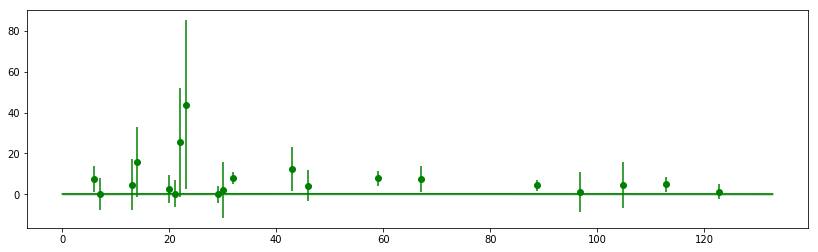

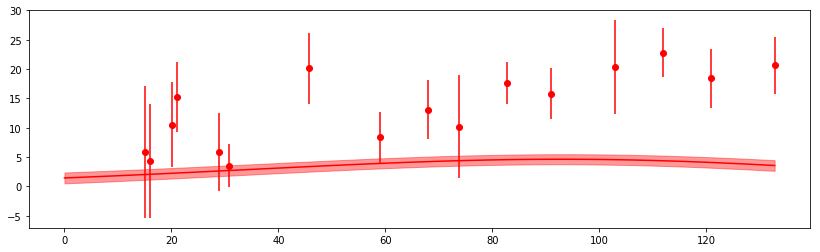

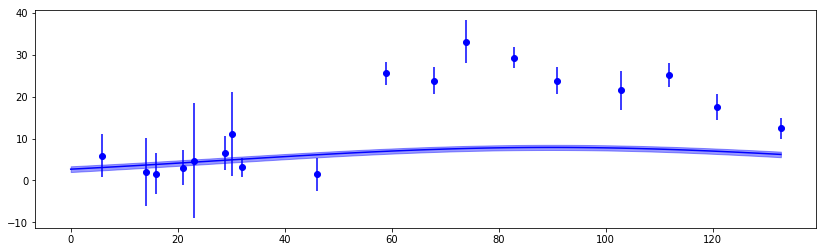

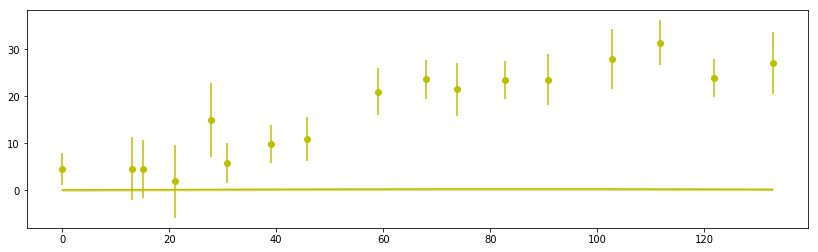

For random seed: 1


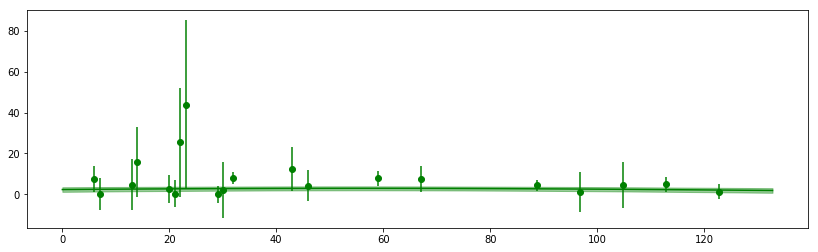

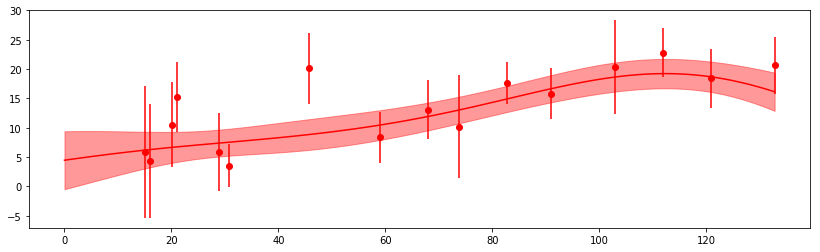

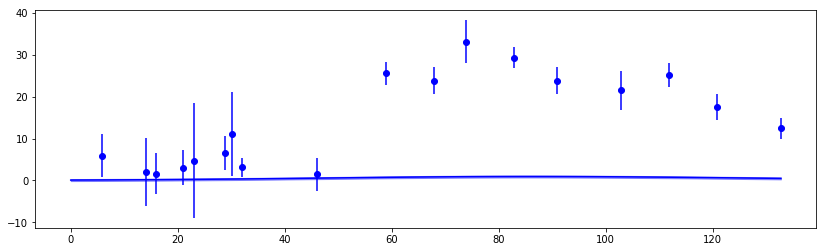

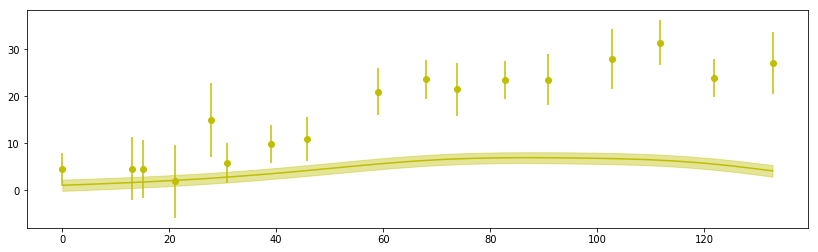

For random seed: 2


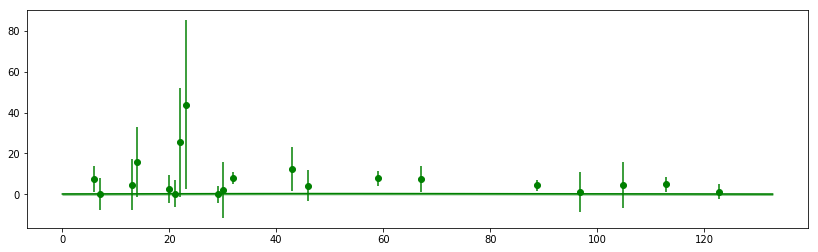

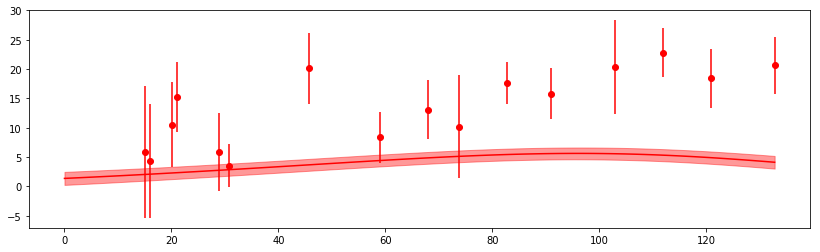

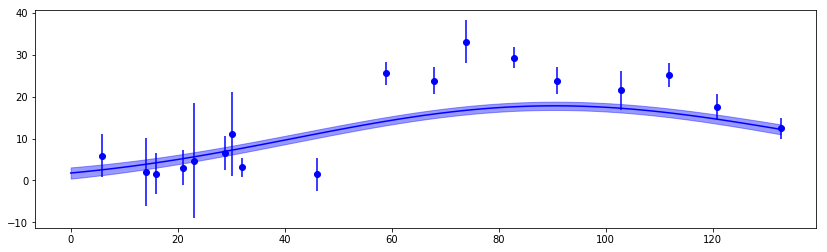

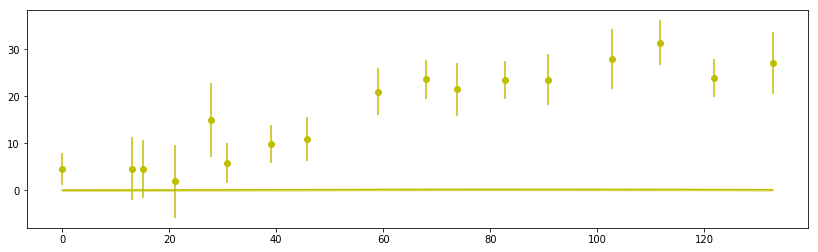

For random seed: 3


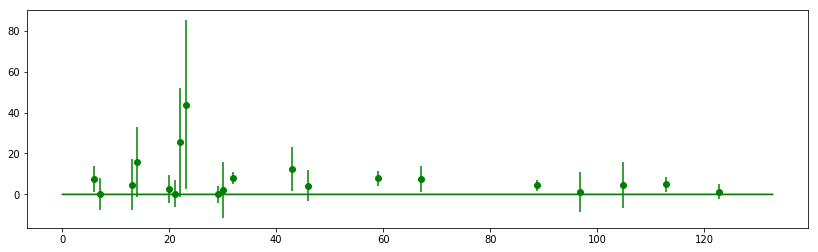

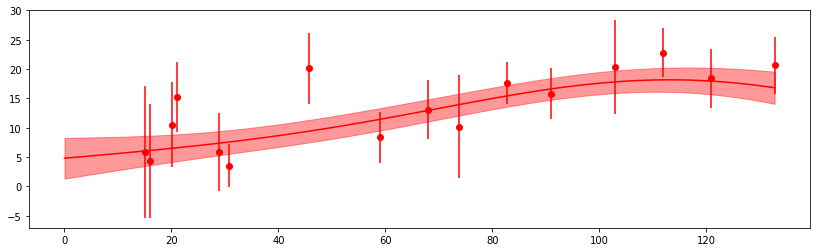

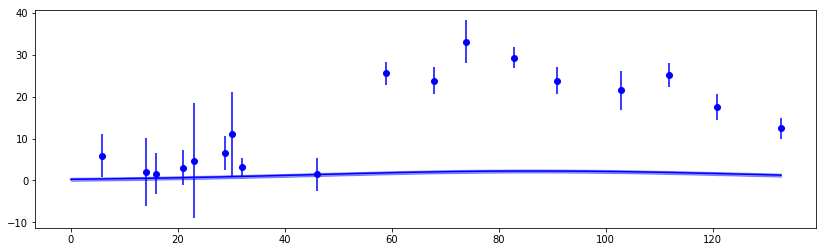

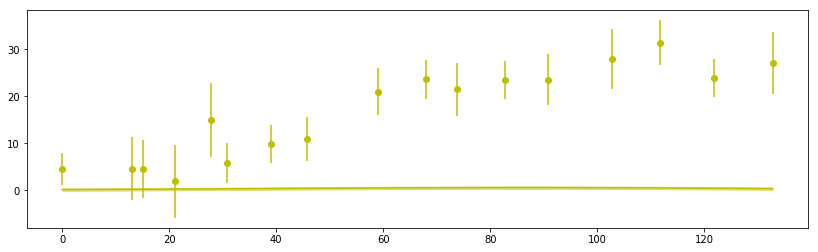

For random seed: 4


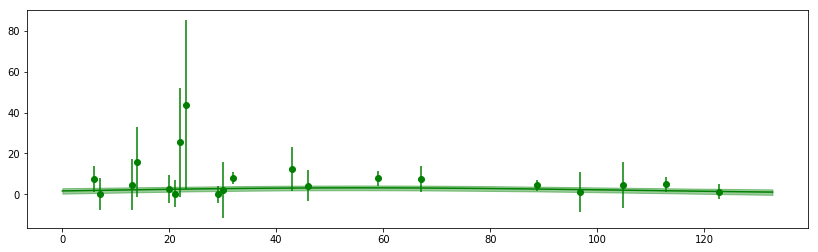

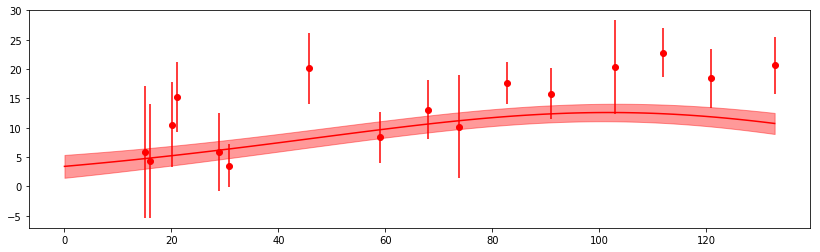

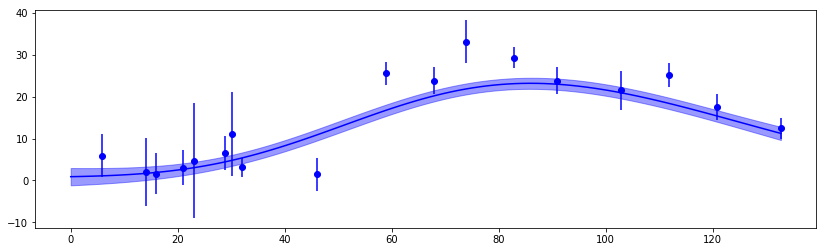

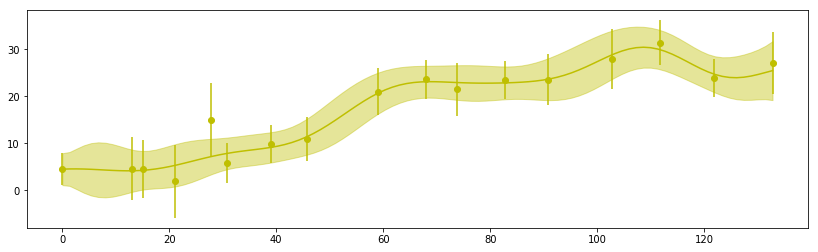

For random seed: 5


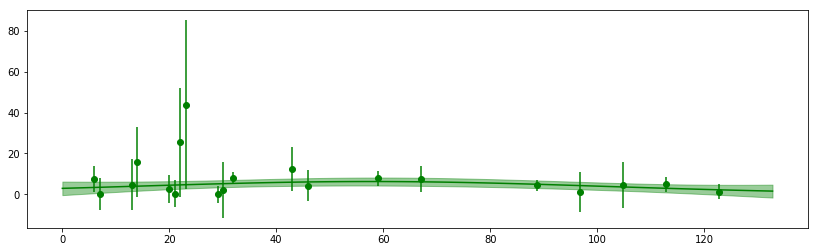

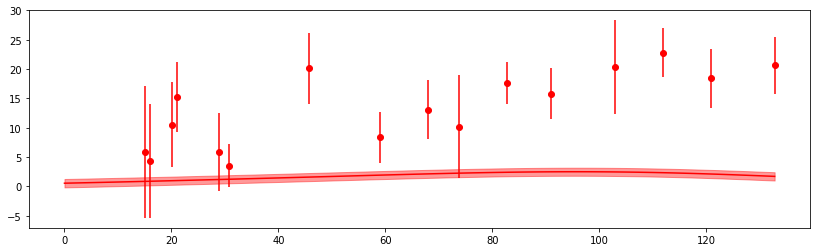

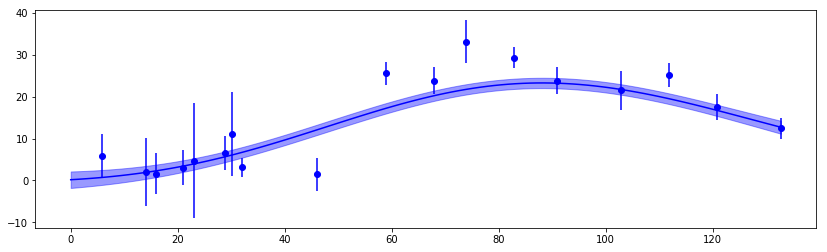

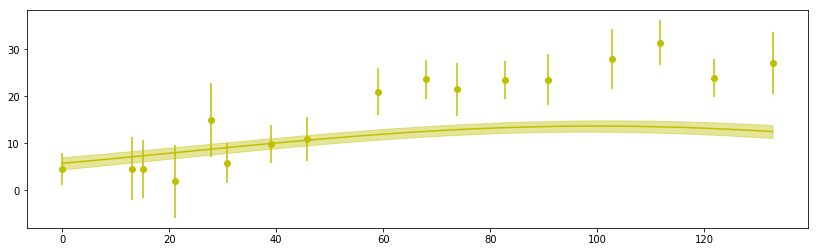

For random seed: 6


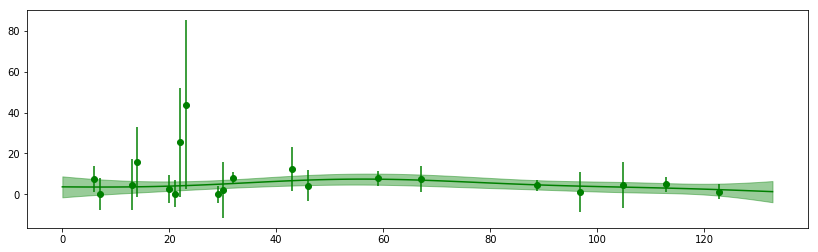

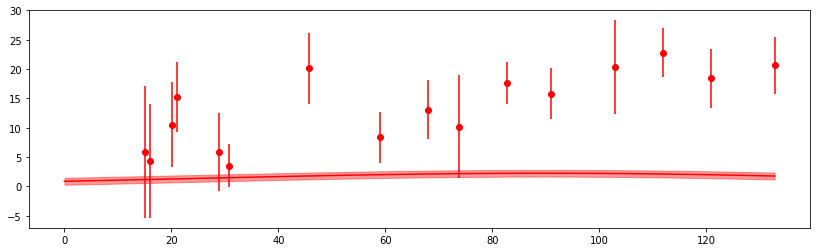

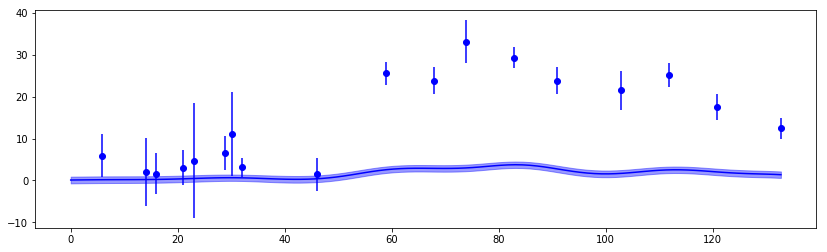

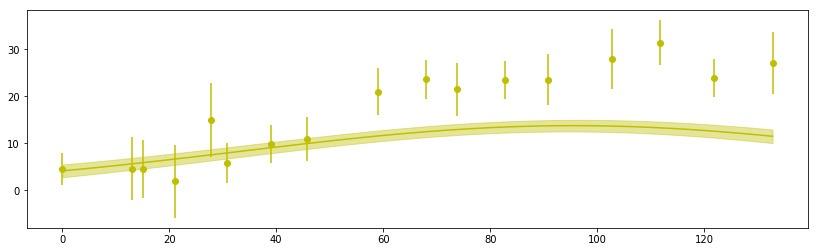

For random seed: 7


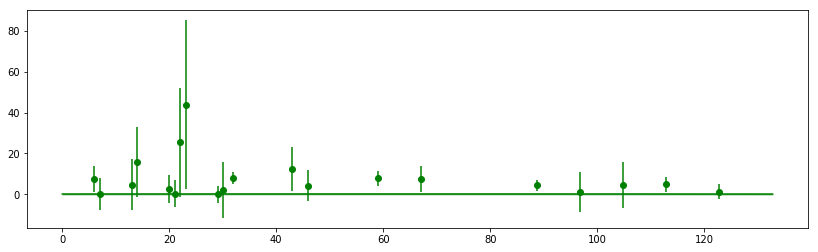

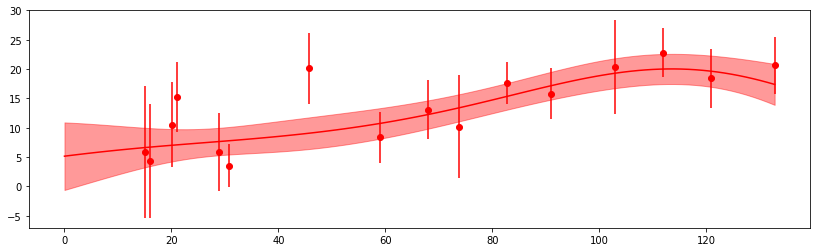

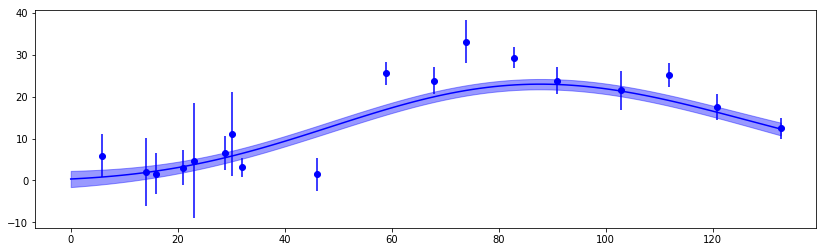

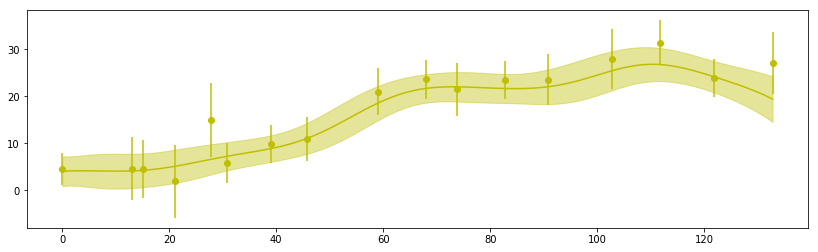

For random seed: 8


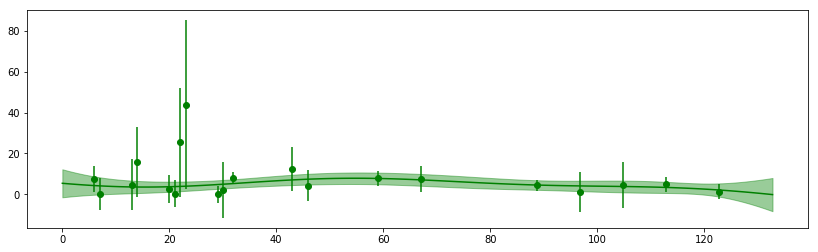

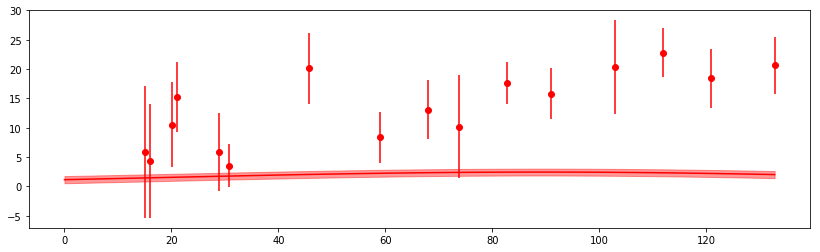

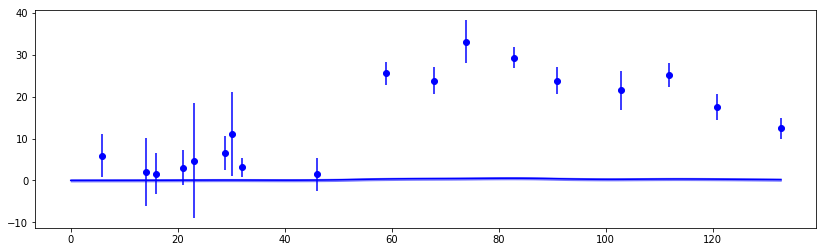

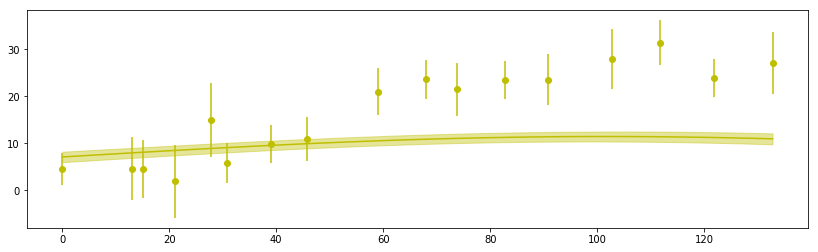

For random seed: 9


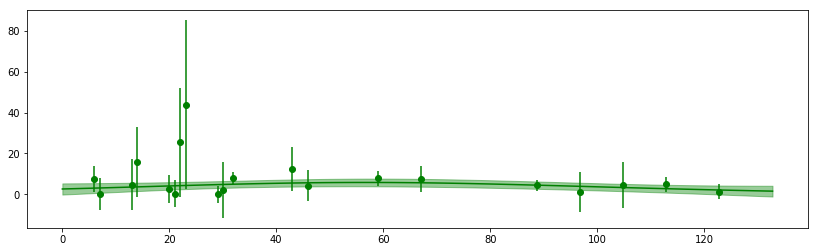

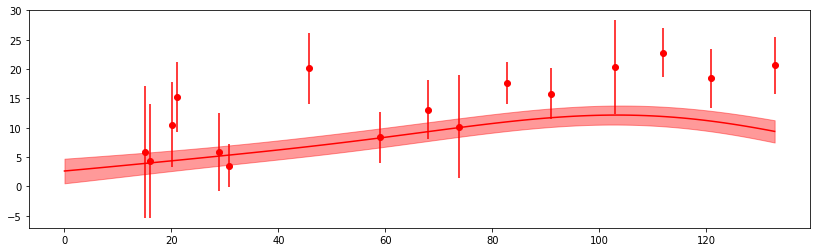

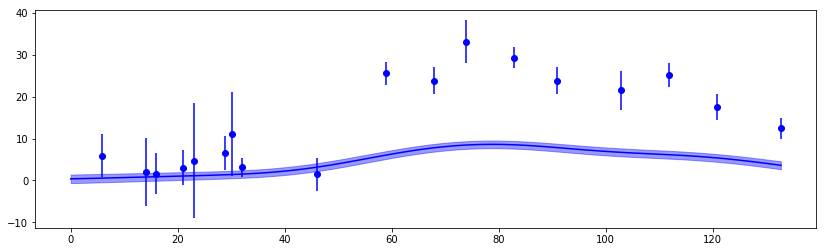

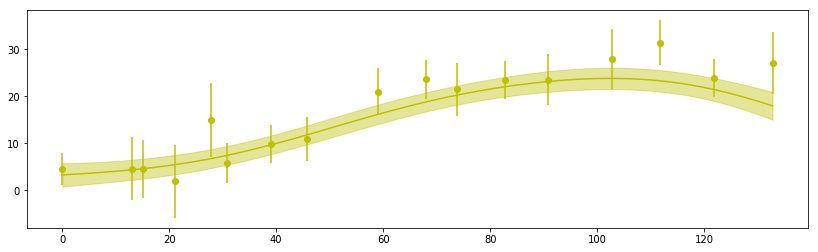

For random seed: 10


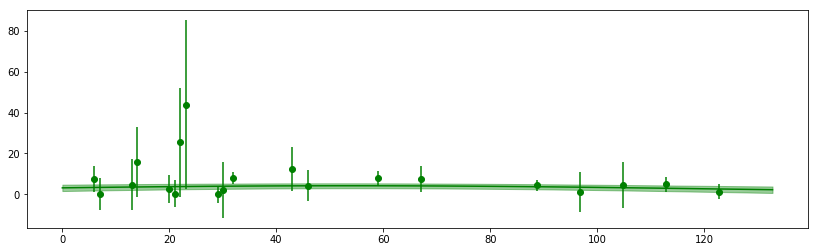

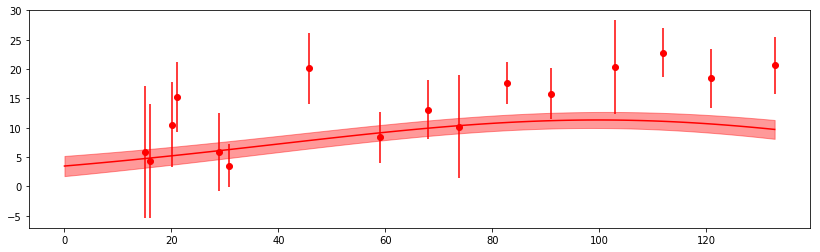

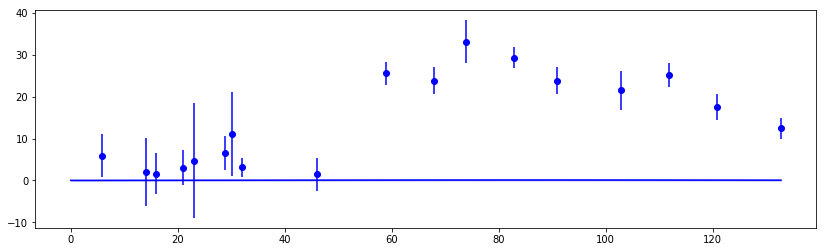

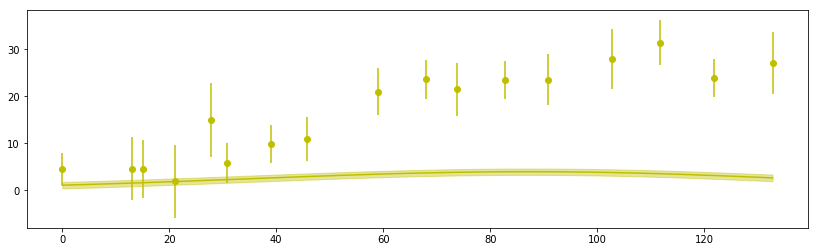

In [53]:
#Without error treatment, array mode
# SN013742
dfs, t = get_df(files[4044])
t = t.reshape(len(t),1)

x,y,yerr = [[],[],[],[]],[[],[],[],[]],[[],[],[],[]]

for i, band in enumerate(filters):
    x[i], y[i], yerr[i] = get_xys(cleaning_df(dfs[band]))
    x[i] = x[i].reshape(len(x[i]),1)

for i in range(11):
    np.random.seed(i)
    print ("For random seed:", i)
    with pm.Model() as model:
        eta = pm.HalfCauchy("N", beta=2, testval=2.0)
        lengthscale = pm.Gamma("L", alpha=4, beta=0.1)
        cov = eta**2 * pm.gp.cov.ExpQuad(1, lengthscale)
    
        gp = pm.gp.Marginal(cov_func=cov)
        
        for j in range(len(x)):
            nome = 'y_' + str(i) + str(j)
            y_ = gp.marginal_likelihood(nome, X=x[j], y=y[j], noise=yerr[j])
        
            #mp = pm.find_MAP(include_transformed=True)
        
            mu, var = gp.predict(t, diag=True)
            fit = pd.DataFrame({"t": t.flatten(),
                            "mu_total": mu,
                            "sd_total": np.sqrt(var)})
            plot(x[j],y[j],yerr[j],fit, c = j)

For random seed: 0


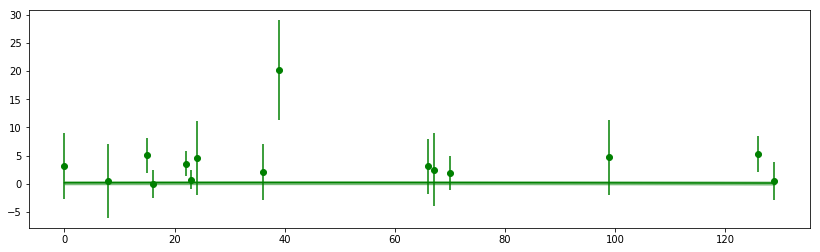

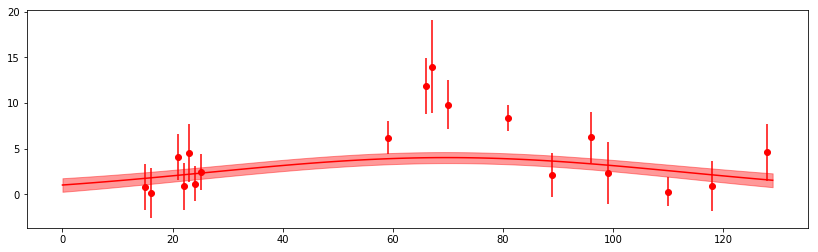

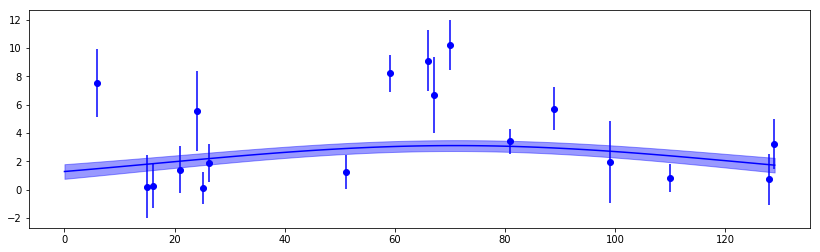

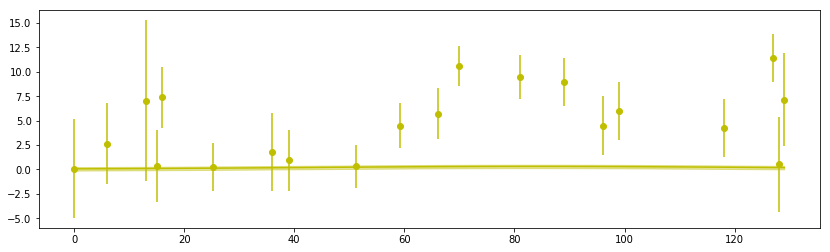

For random seed: 1


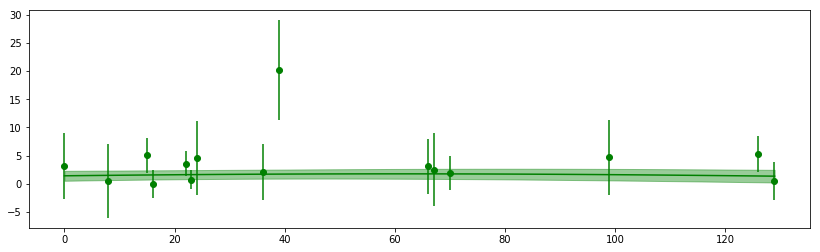

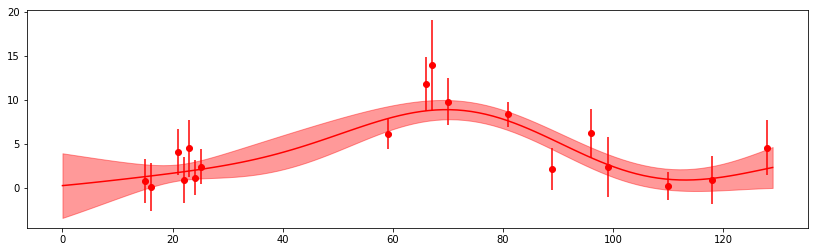

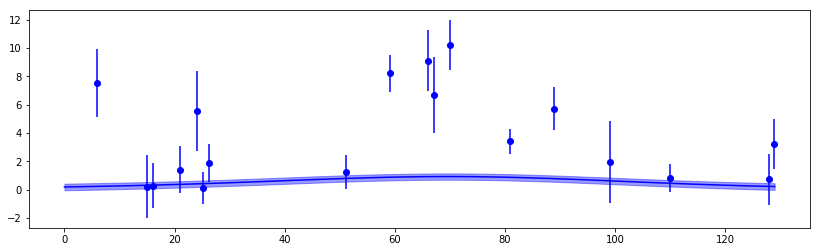

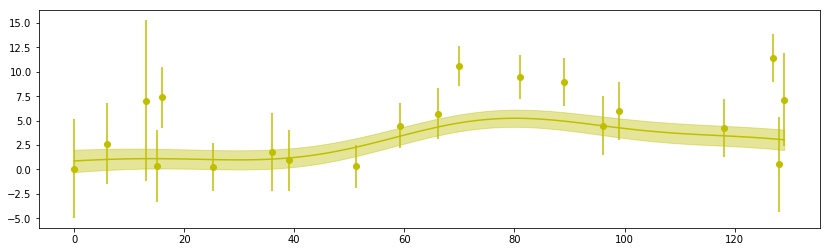

For random seed: 2


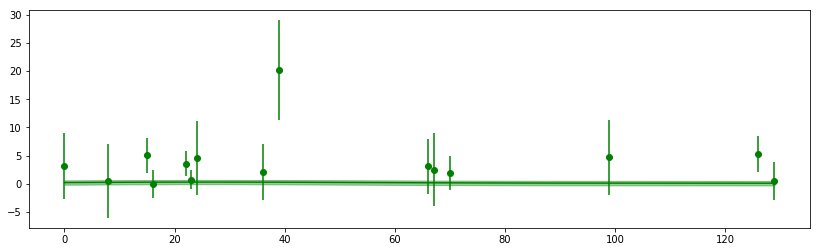

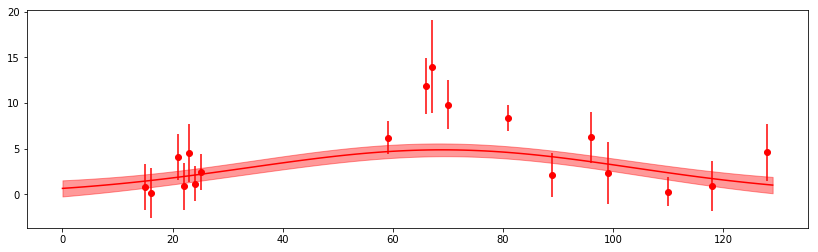

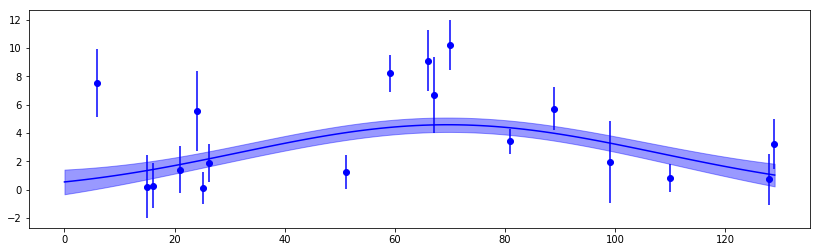

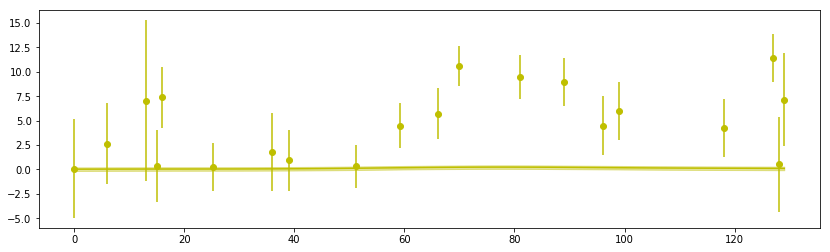

For random seed: 3


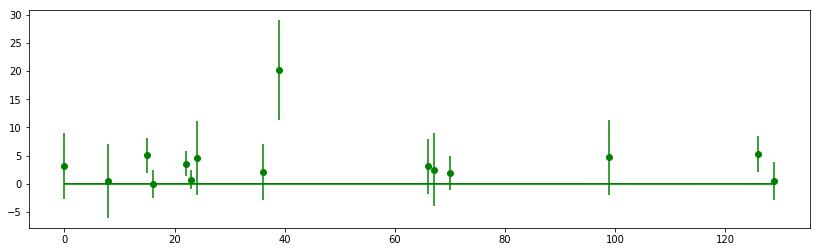

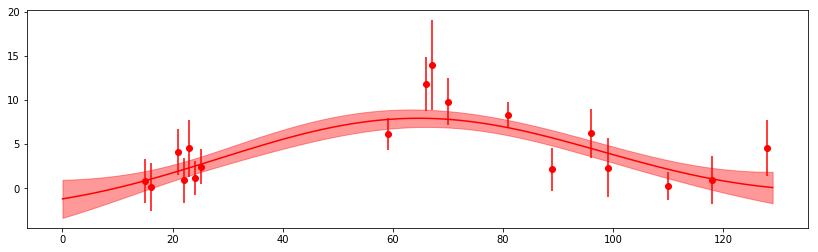

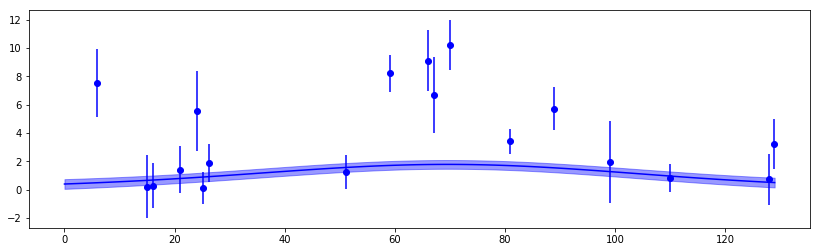

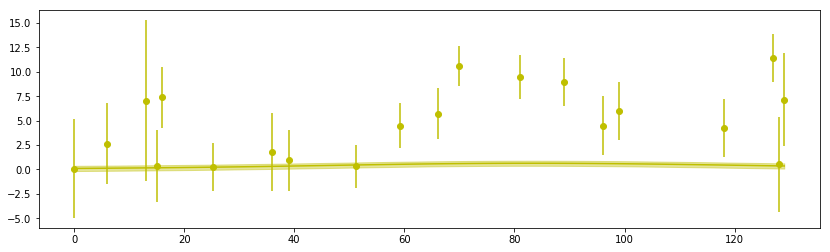

For random seed: 4


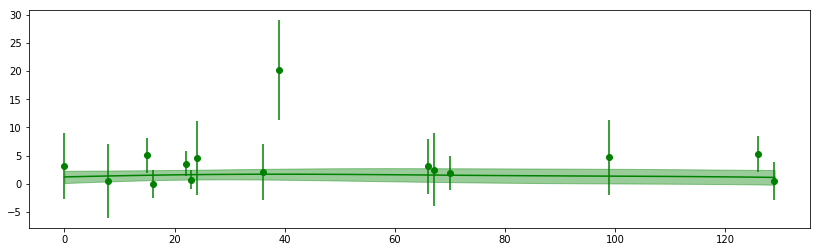

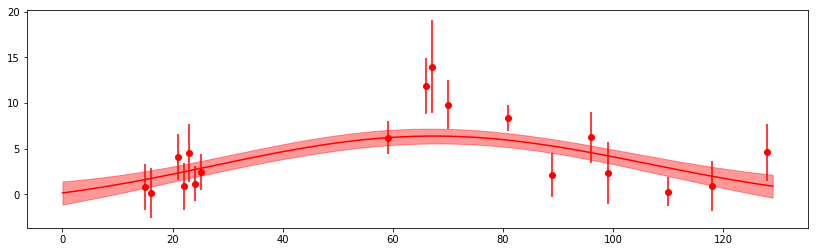

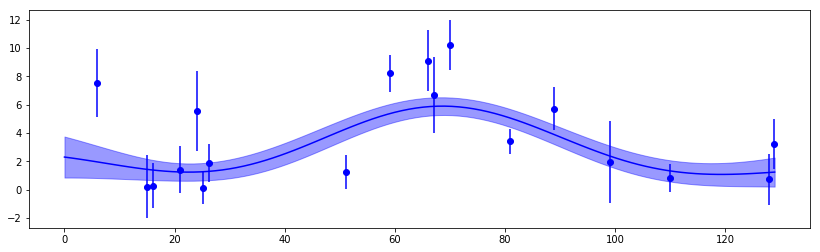

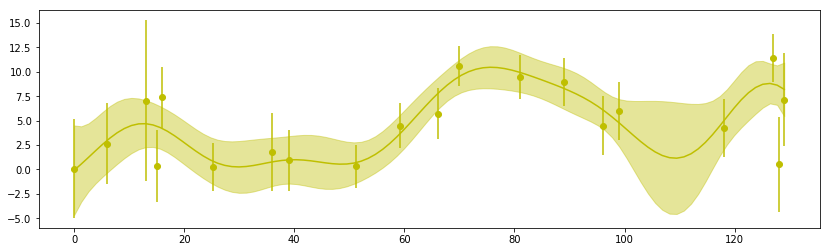

For random seed: 5


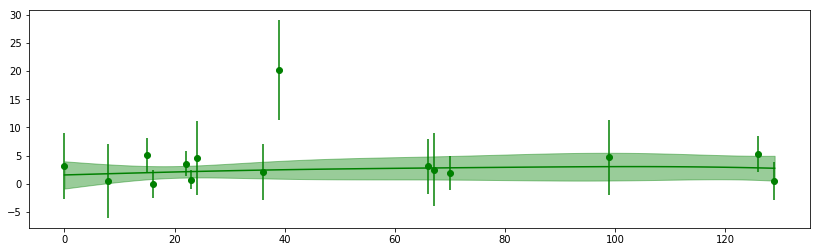

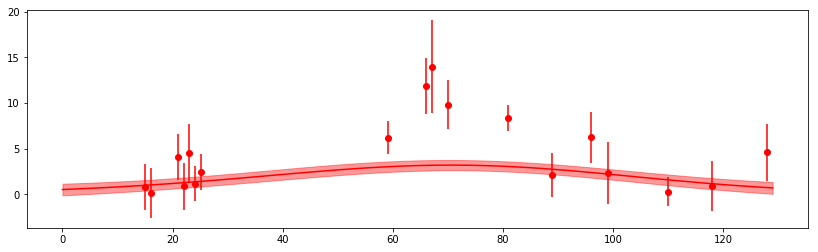

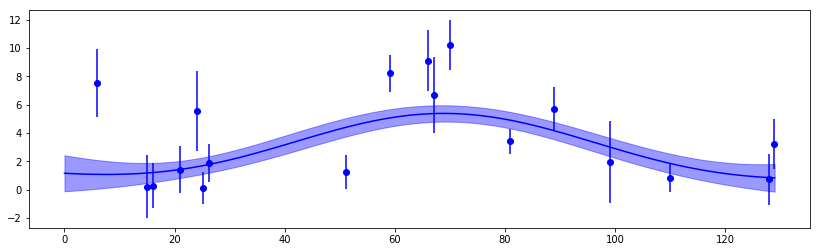

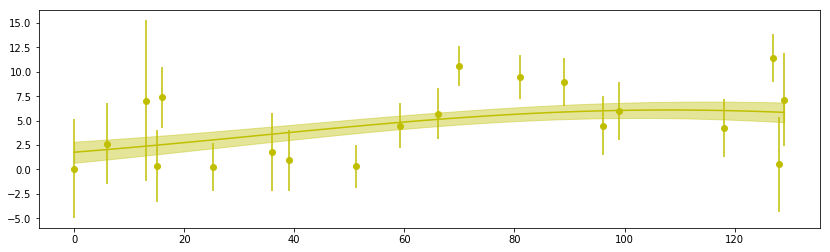

For random seed: 6


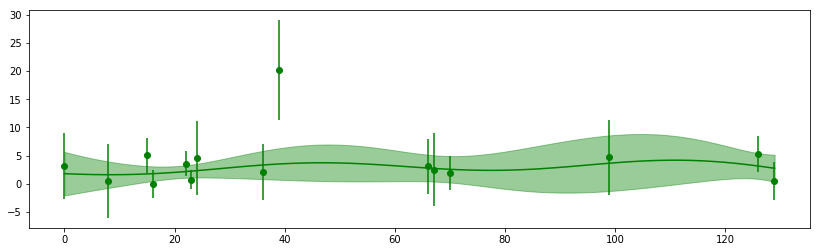

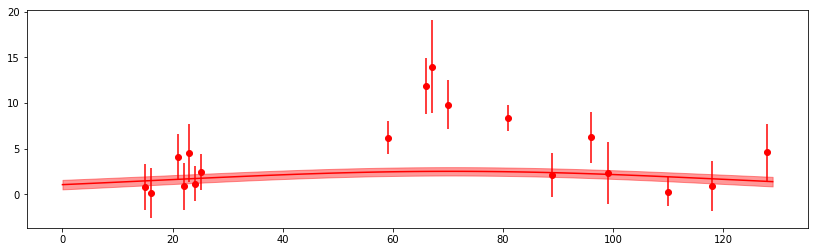

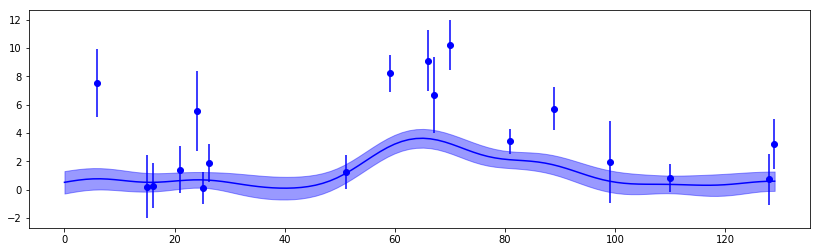

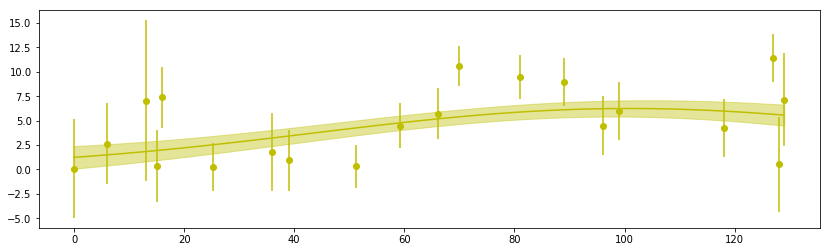

For random seed: 7


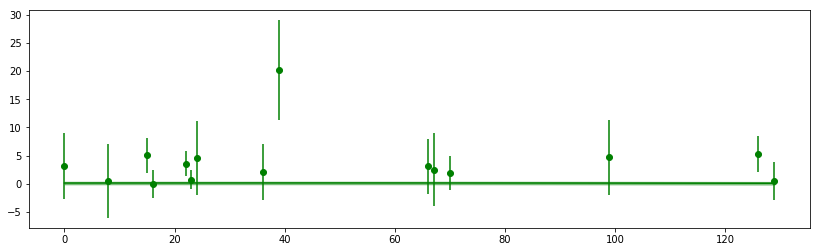

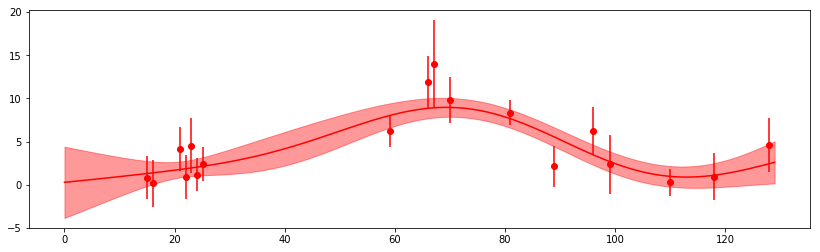

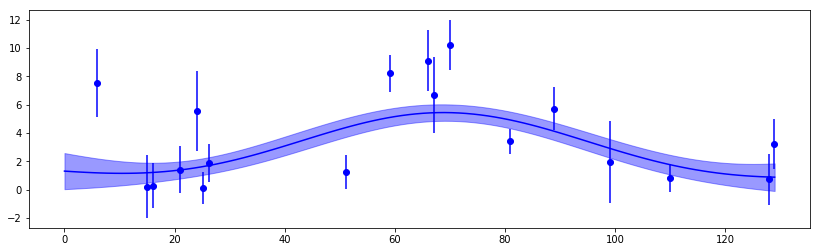

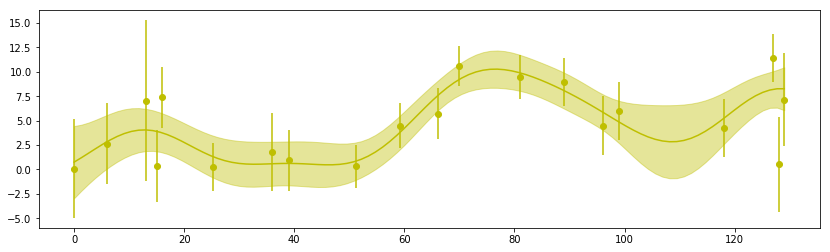

For random seed: 8


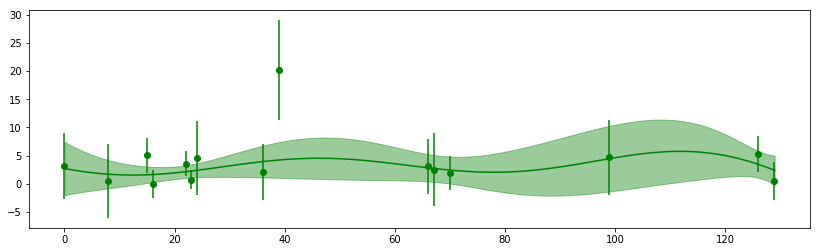

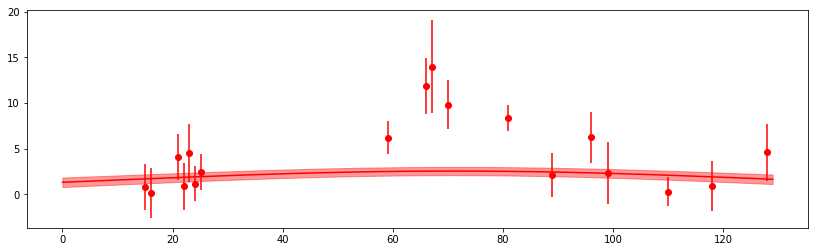

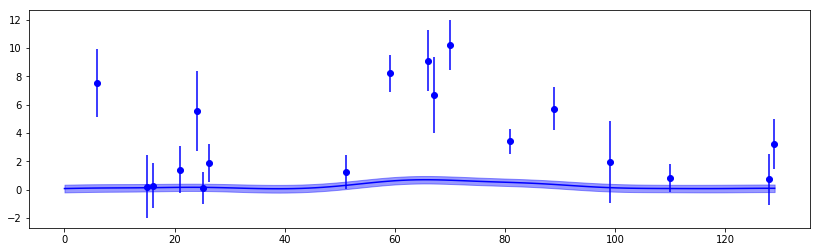

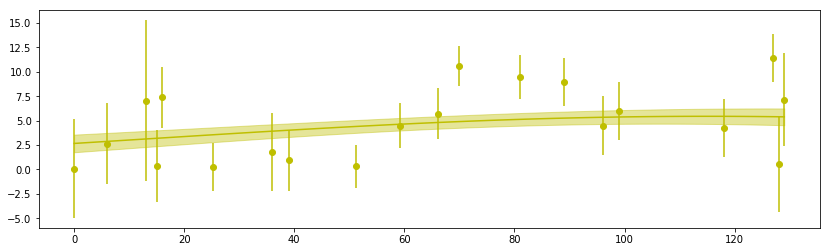

For random seed: 9


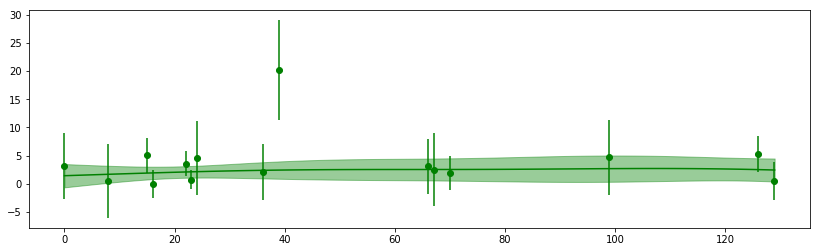

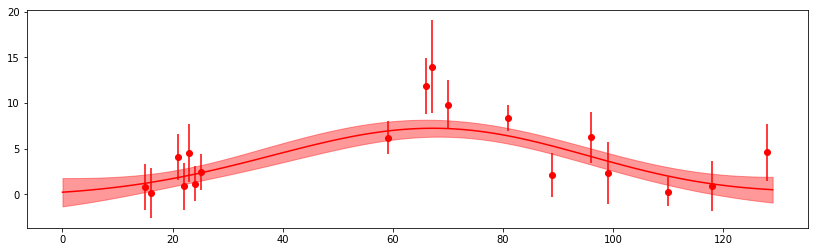

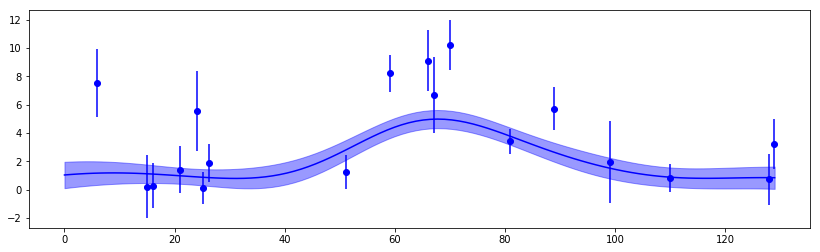

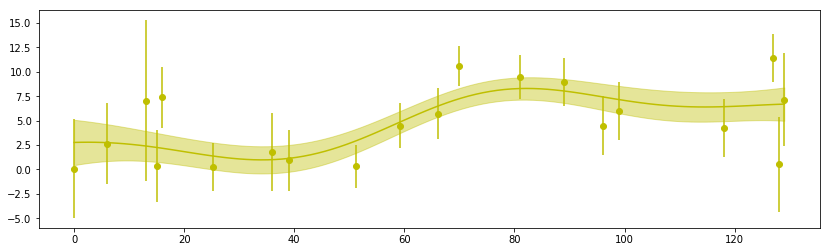

For random seed: 10


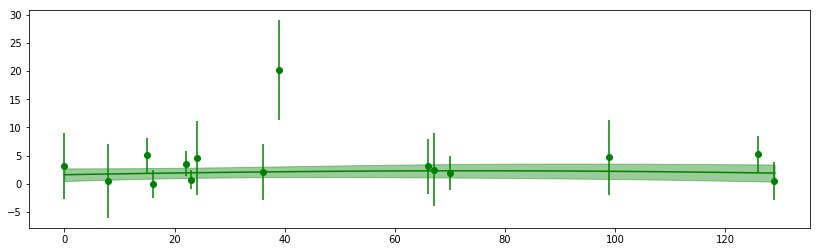

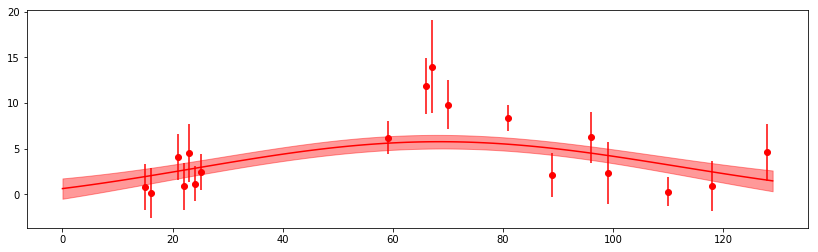

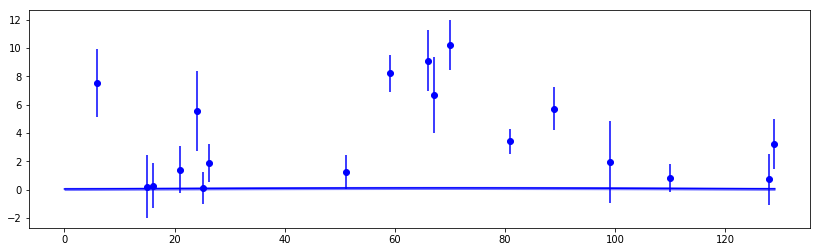

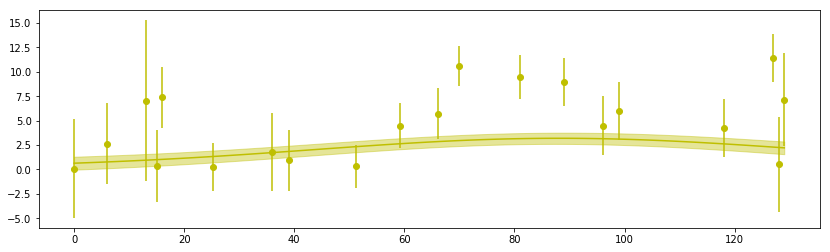

In [55]:
#Without error treatment, array mode
# SN000858
dfs, t = get_df(files[8199])
t = t.reshape(len(t),1)

x,y,yerr = [[],[],[],[]],[[],[],[],[]],[[],[],[],[]]

for i, band in enumerate(filters):
    x[i], y[i], yerr[i] = get_xys(cleaning_df(dfs[band]))
    x[i] = x[i].reshape(len(x[i]),1)
    
for i in range(11):
    np.random.seed(i)
    print ("For random seed:", i)
    with pm.Model() as model:
        eta = pm.HalfCauchy("N", beta=2, testval=2.0)
        lengthscale = pm.Gamma("L", alpha=4, beta=0.1)
        cov = eta**2 * pm.gp.cov.ExpQuad(1, lengthscale)
    
        gp = pm.gp.Marginal(cov_func=cov)
        
        for j in range(len(x)):
            nome = 'y_' + str(i) + str(j)
            y_ = gp.marginal_likelihood(nome, X=x[j], y=y[j], noise=yerr[j])
        
            #mp = pm.find_MAP(include_transformed=True)
        
            mu, var = gp.predict(t, diag=True)
            fit = pd.DataFrame({"t": t.flatten(),
                            "mu_total": mu,
                            "sd_total": np.sqrt(var)})
            plot(x[j],y[j],yerr[j],fit, c = j)

#### Rational Quadratic
$$k(x, x') = \left(1 + \frac{(x - x')^2}{2\alpha\ell^2} \right)^{-\alpha}$$
### More or Less
##### Alpha needs to be a high value, and best seed was 6 (4 and 5 more or less)

For random seed: 0


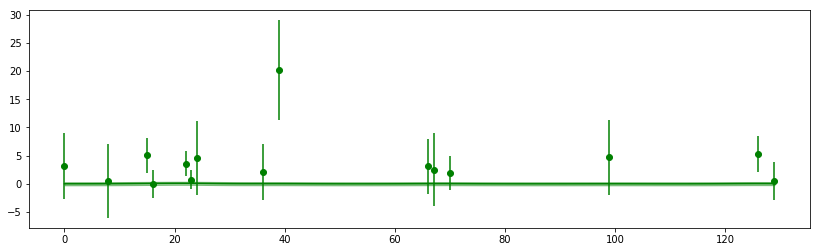

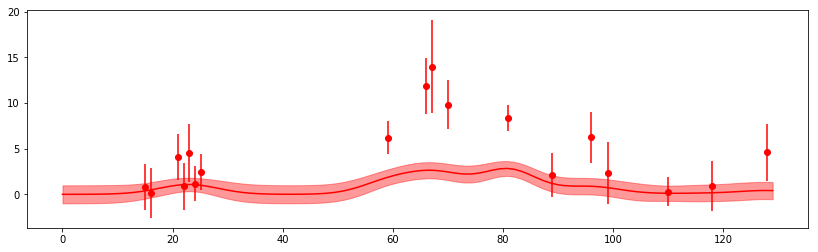

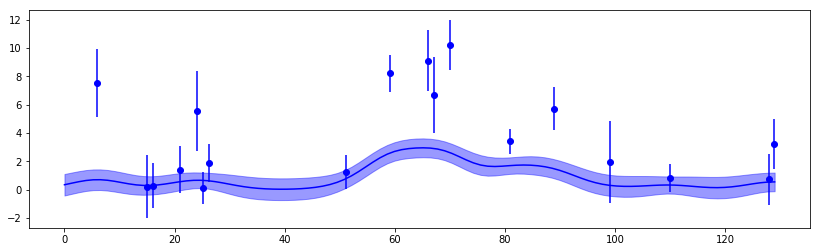

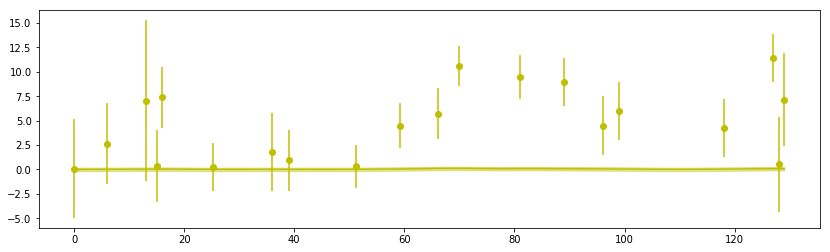

For random seed: 1


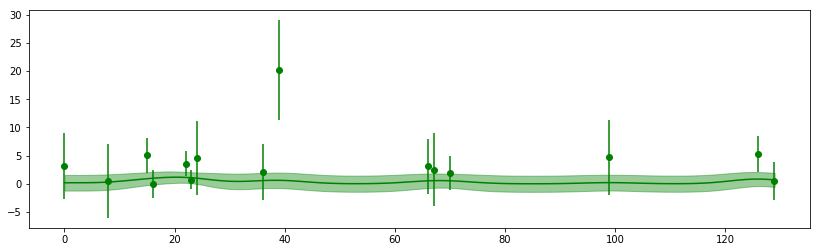

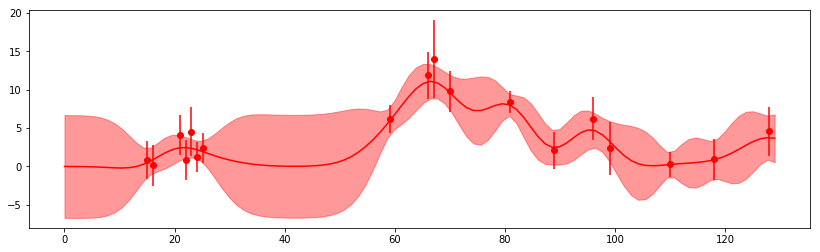

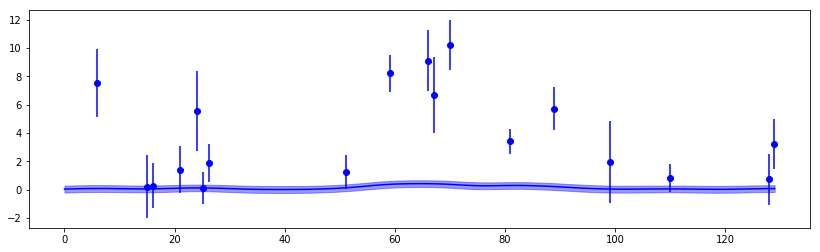

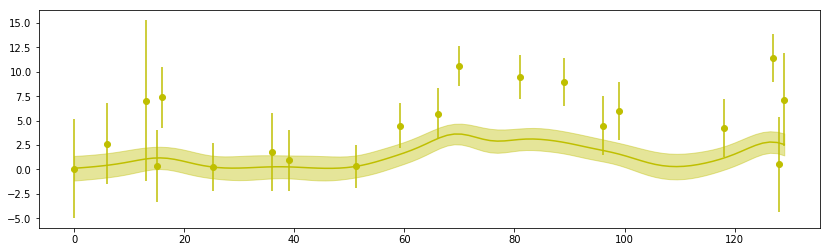

For random seed: 2


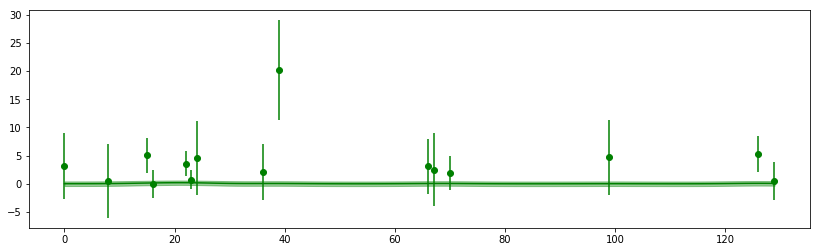

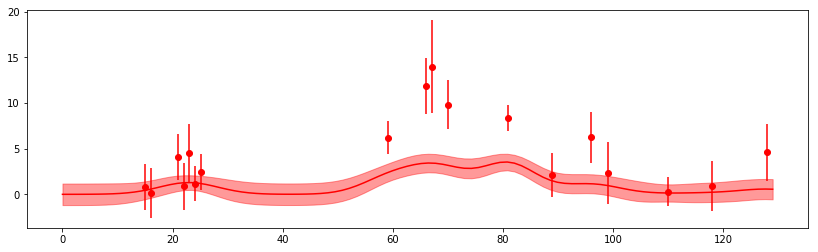

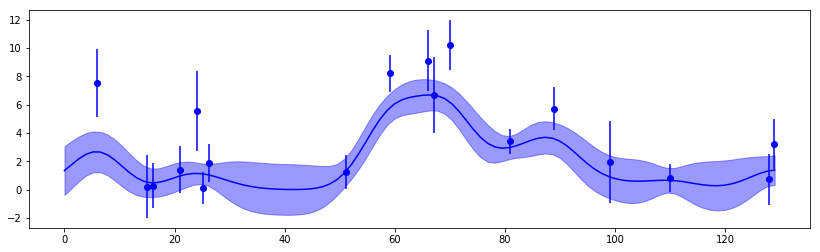

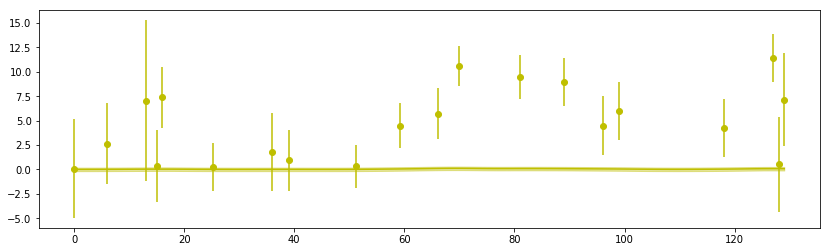

For random seed: 3


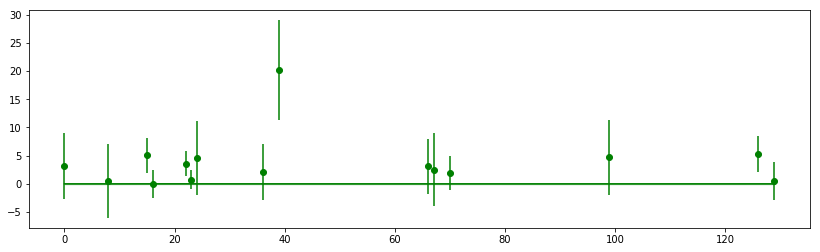

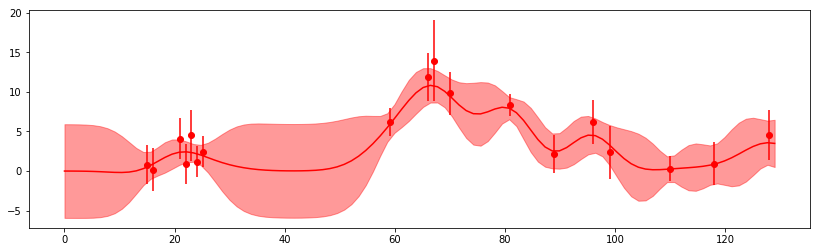

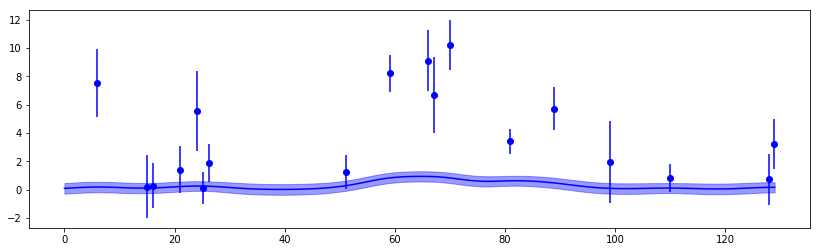

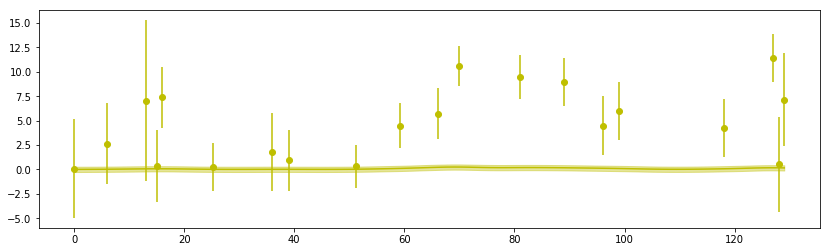

For random seed: 4


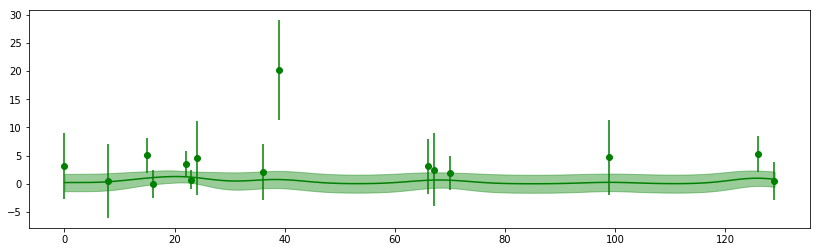

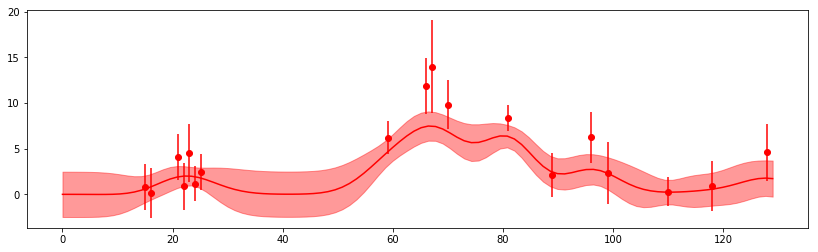

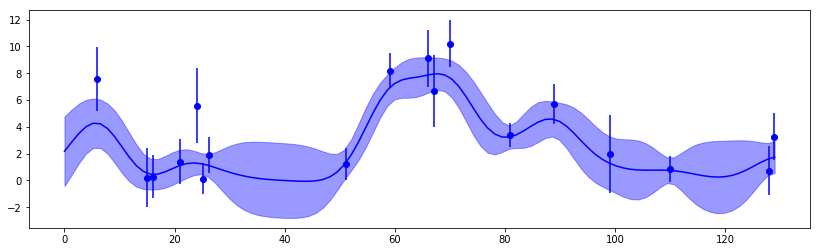

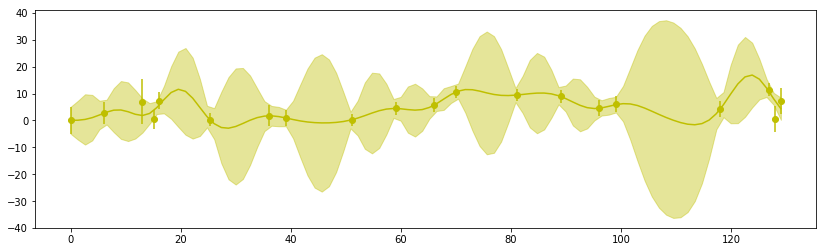

For random seed: 5


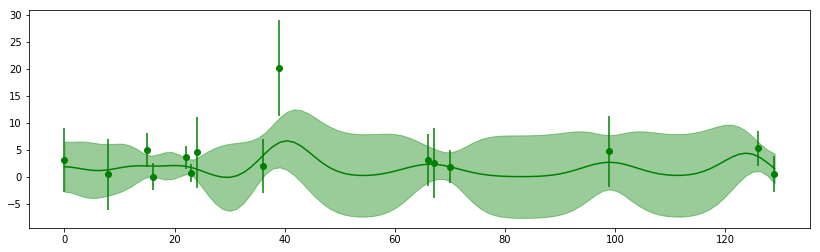

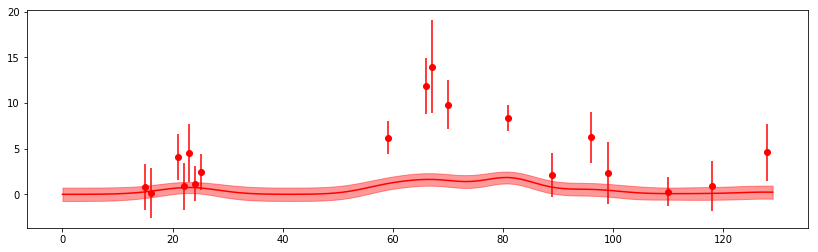

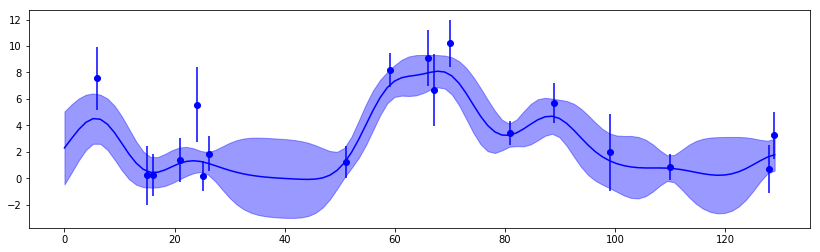

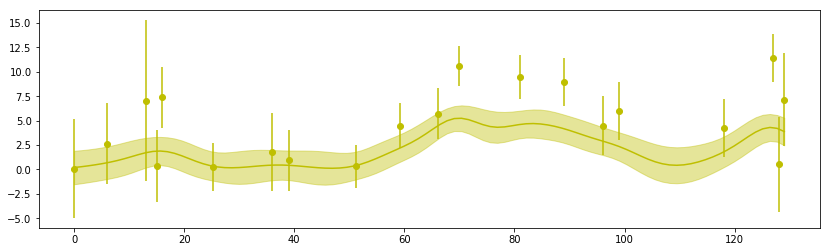

For random seed: 6


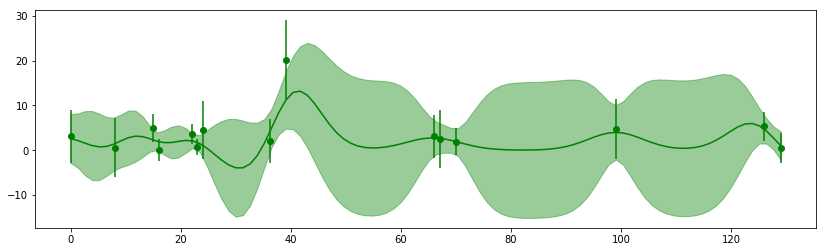

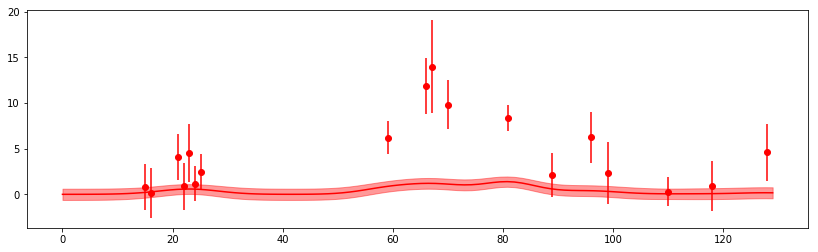

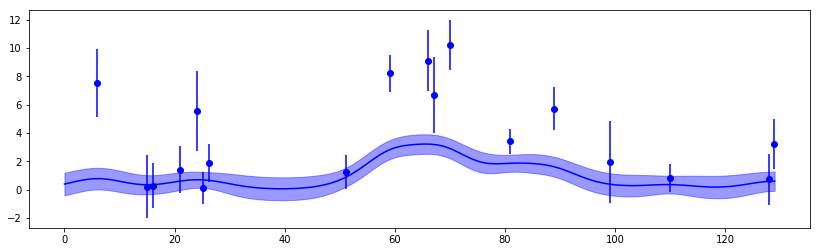

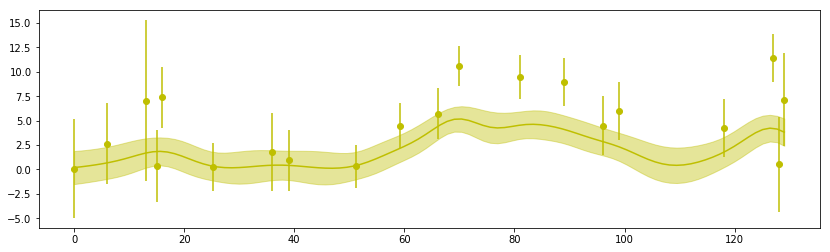

For random seed: 7


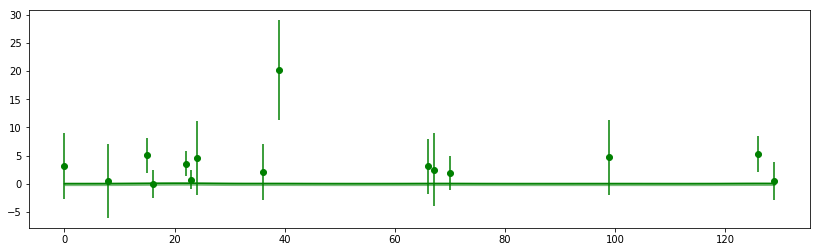

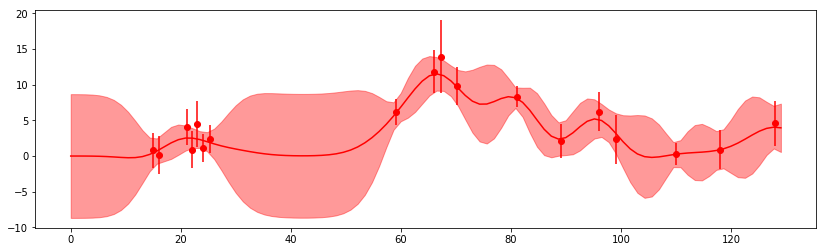

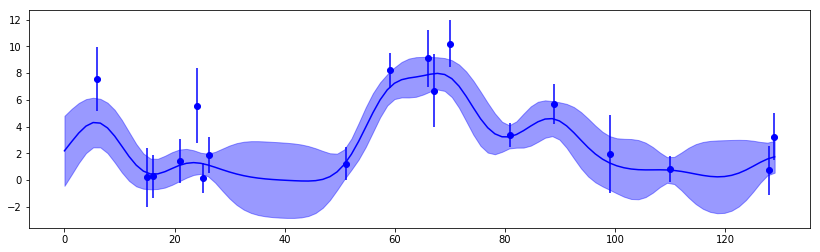

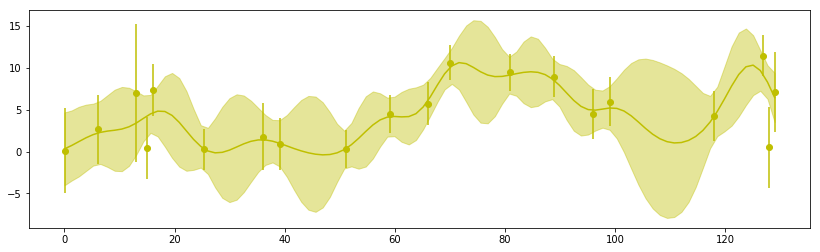

For random seed: 8


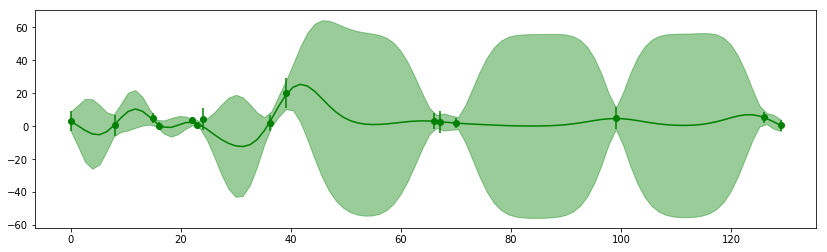

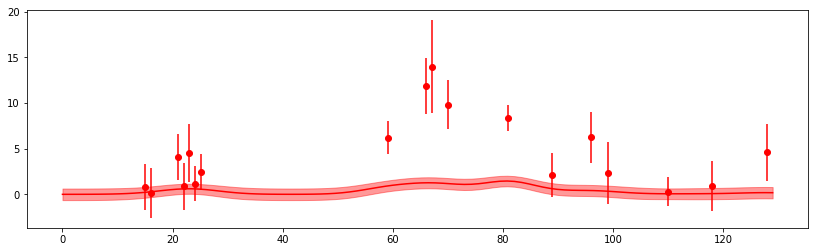

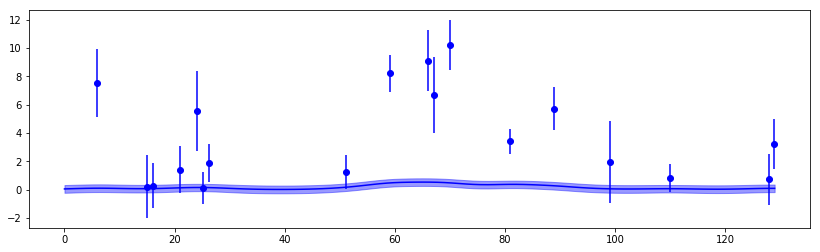

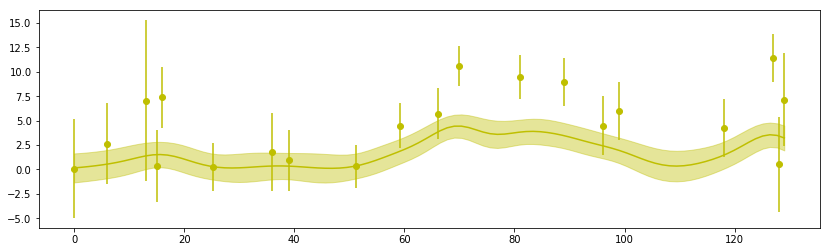

For random seed: 9


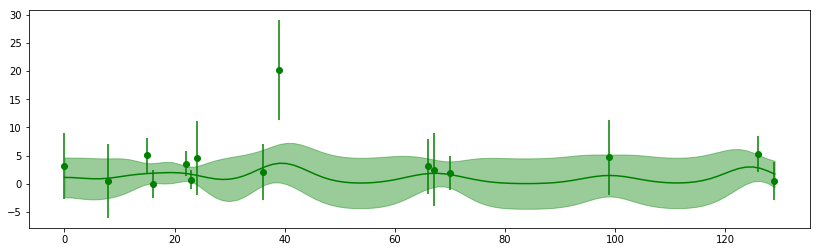

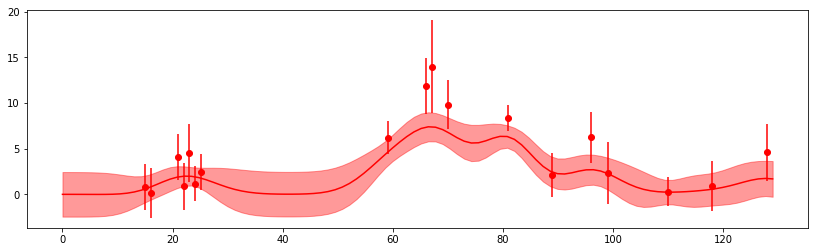

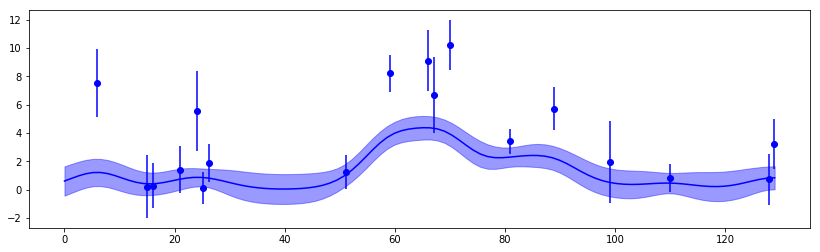

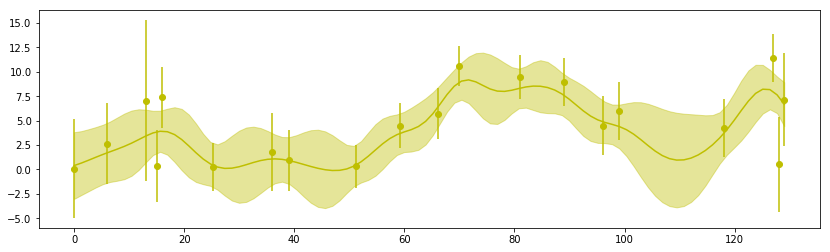

For random seed: 10


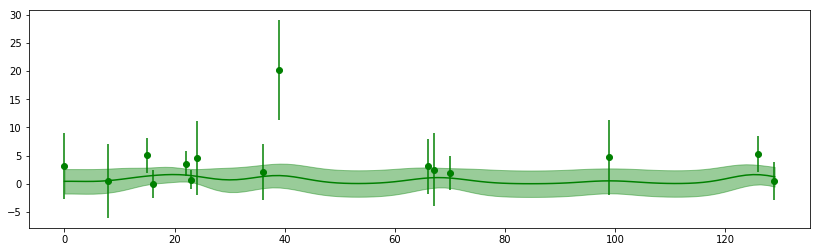

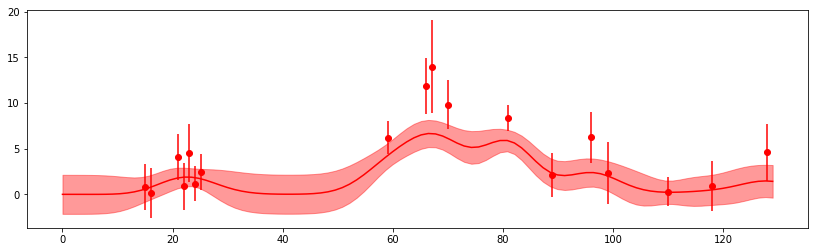

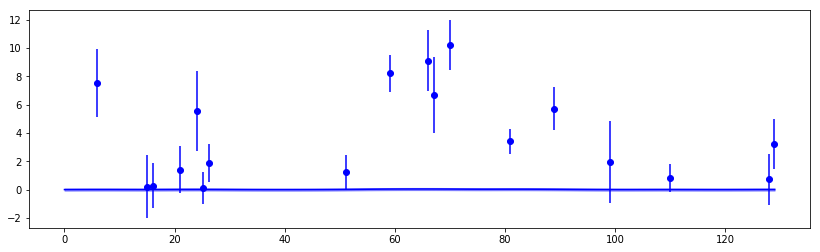

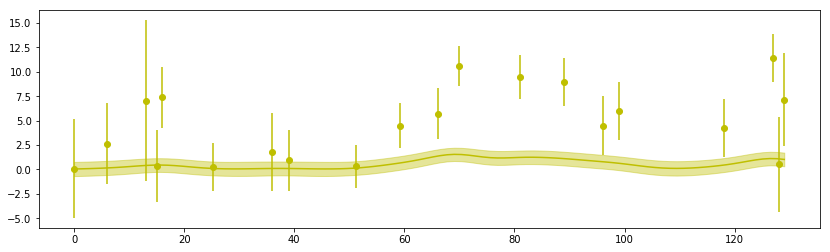

In [68]:
#Without error treatment, array mode
# SN000858
dfs, t = get_df(files[8199])
t = t.reshape(len(t),1)

x,y,yerr = [[],[],[],[]],[[],[],[],[]],[[],[],[],[]]

for i, band in enumerate(filters):
    x[i], y[i], yerr[i] = get_xys(cleaning_df(dfs[band]))
    x[i] = x[i].reshape(len(x[i]),1)
    
for i in range(11):
    np.random.seed(i)
    print ("For random seed:", i)
    with pm.Model() as model:
        alfa = 5
        eta = pm.HalfCauchy("N", beta=2, testval=2.0)
        lengthscale = pm.Gamma("L", alpha=4, beta=0.1)
        cov = eta**2 * pm.gp.cov.RatQuad(1, lengthscale, alfa)
    
        gp = pm.gp.Marginal(cov_func=cov)
        
        for j in range(len(x)):
            nome = 'y_' + str(i) + str(j)
            y_ = gp.marginal_likelihood(nome, X=x[j], y=y[j], noise=yerr[j])
        
            #mp = pm.find_MAP(include_transformed=True)
        
            mu, var = gp.predict(t, diag=True)
            fit = pd.DataFrame({"t": t.flatten(),
                            "mu_total": mu,
                            "sd_total": np.sqrt(var)})
            plot(x[j],y[j],yerr[j],fit, c = j)

For random seed: 0


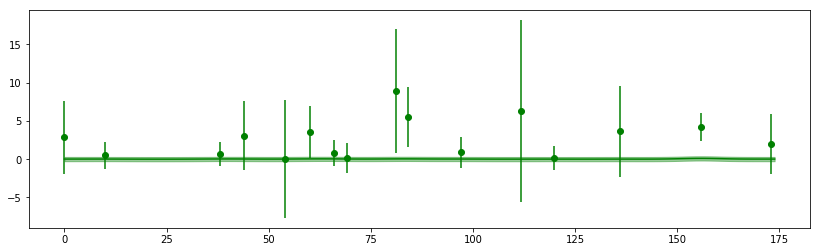

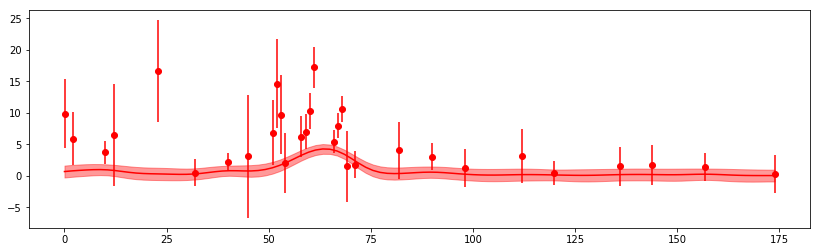

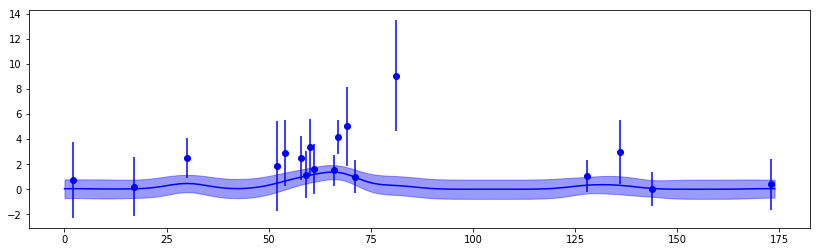

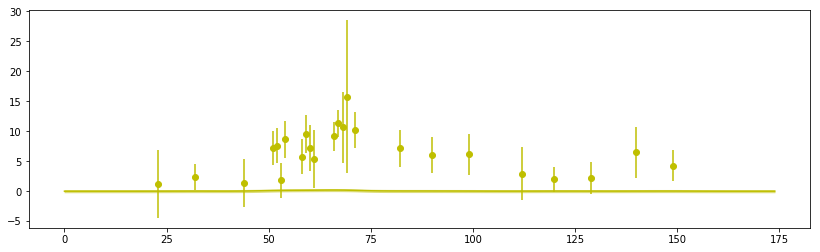

For random seed: 1


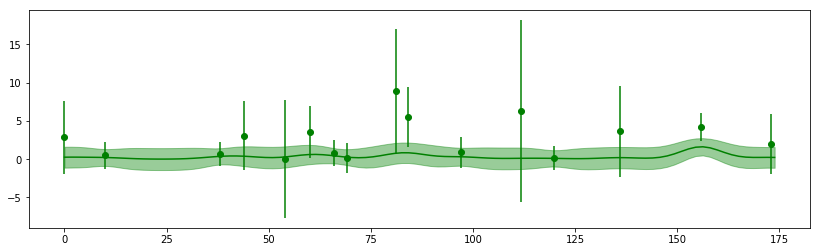

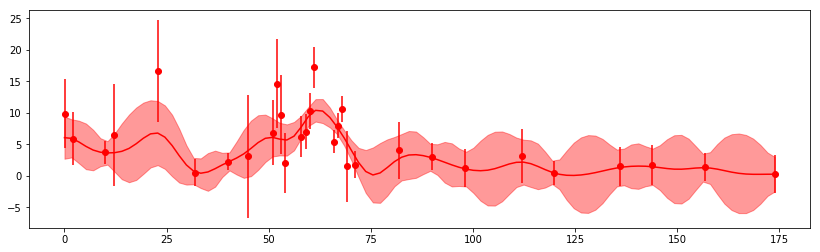

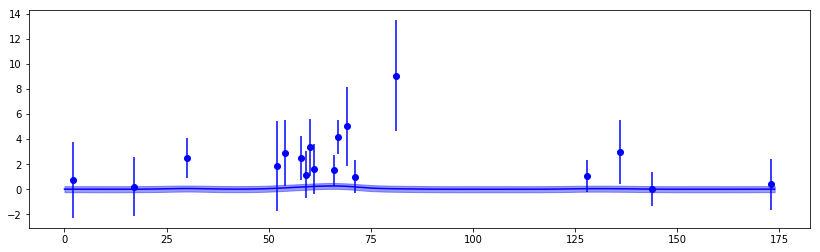

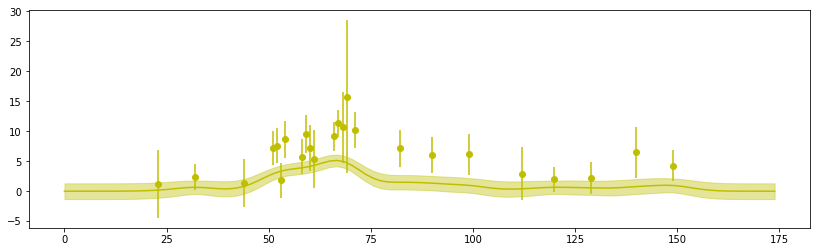

For random seed: 2


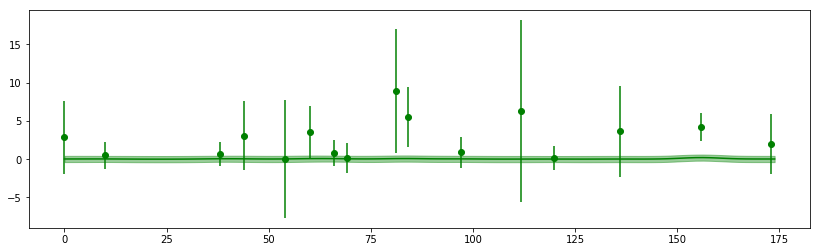

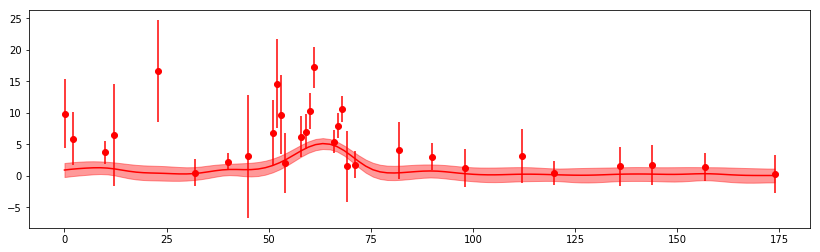

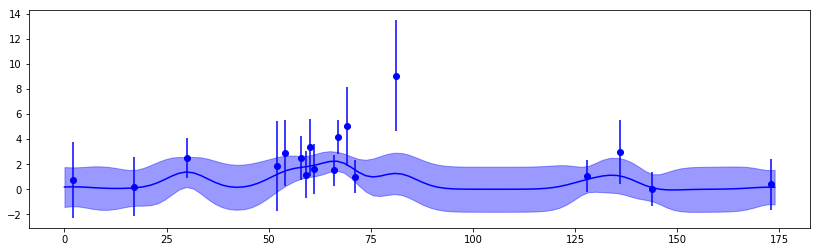

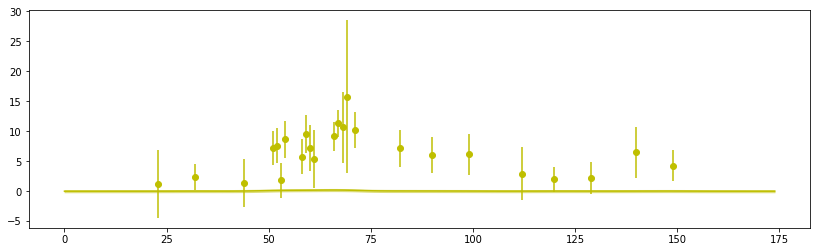

For random seed: 3


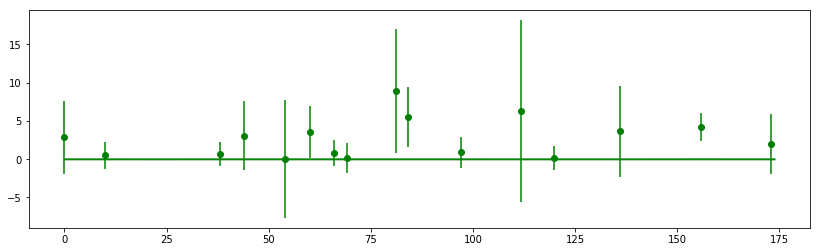

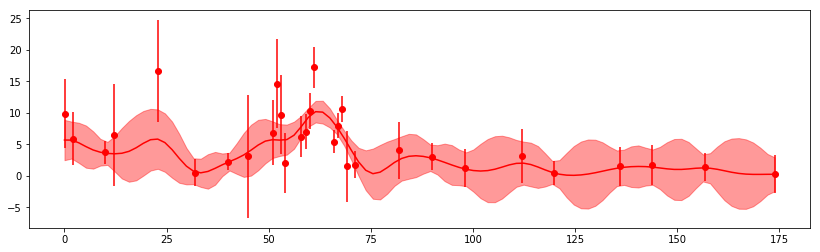

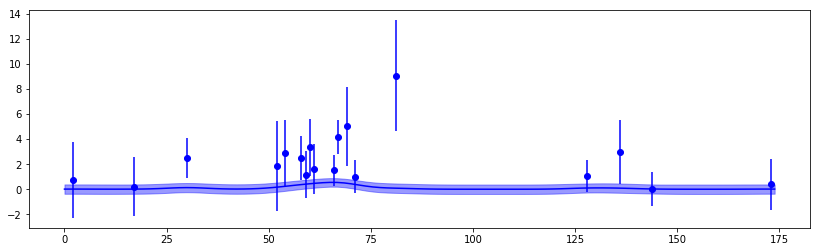

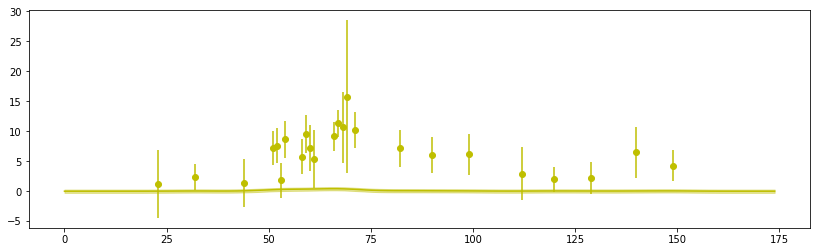

For random seed: 4


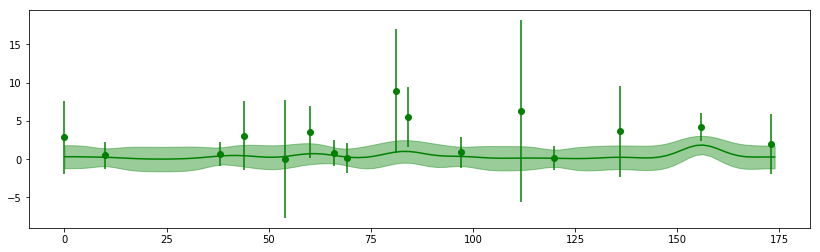

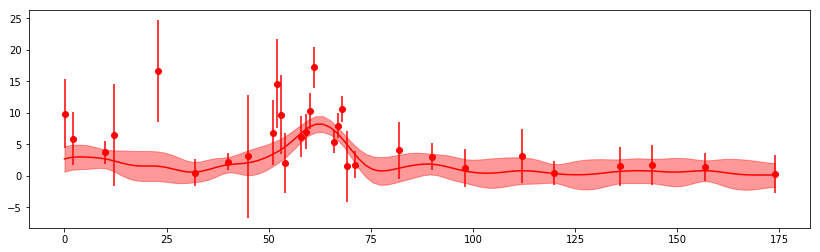

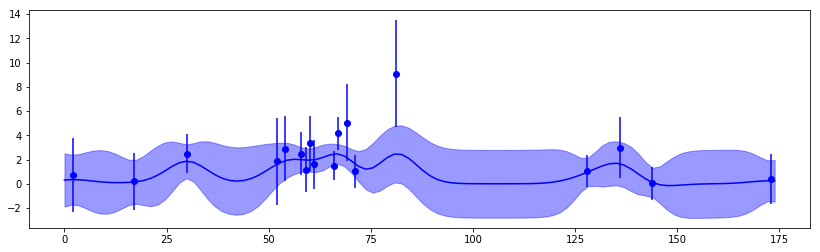

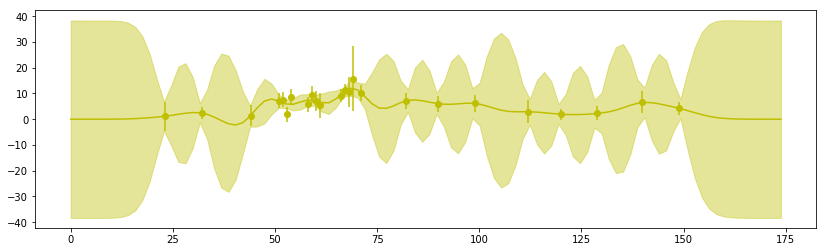

For random seed: 5


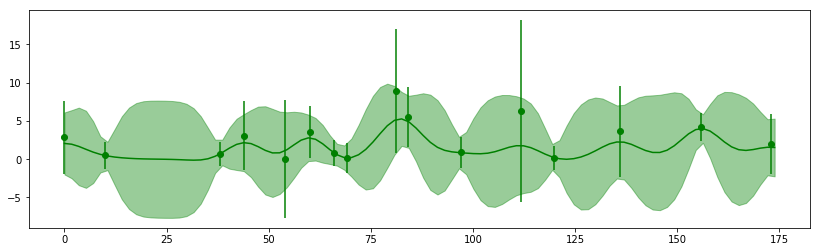

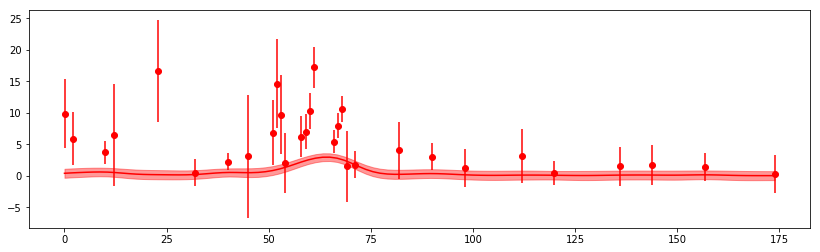

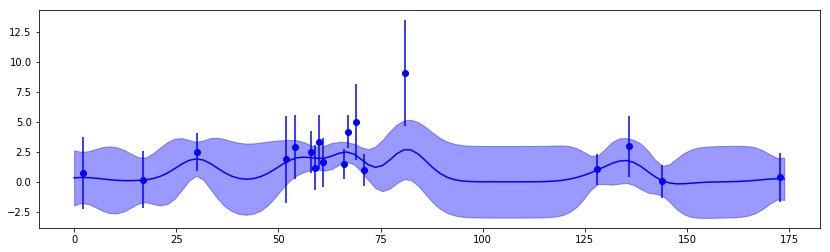

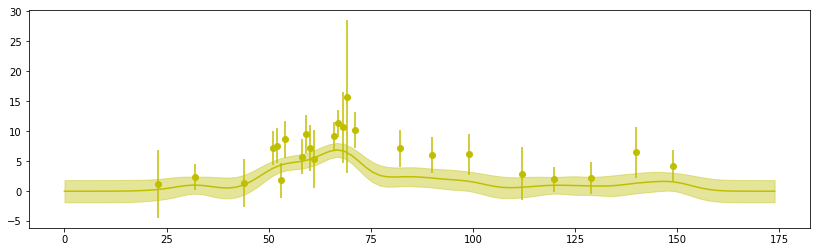

For random seed: 6


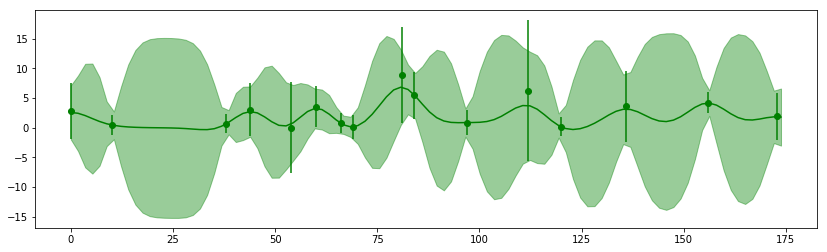

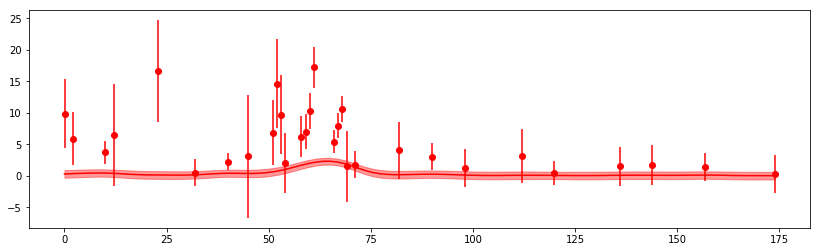

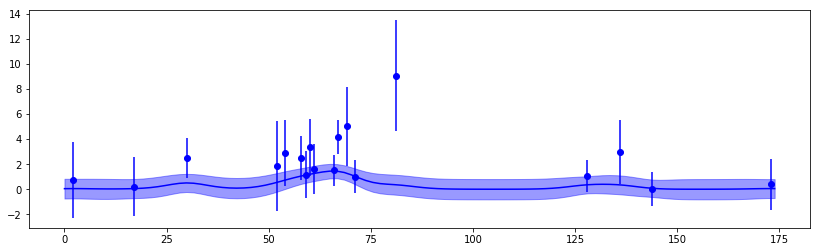

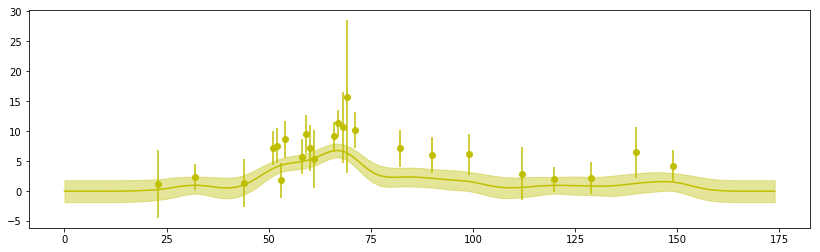

For random seed: 7


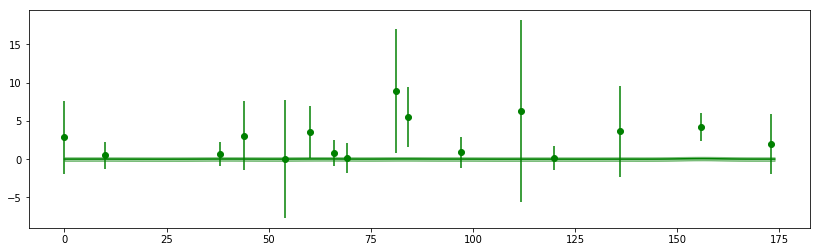

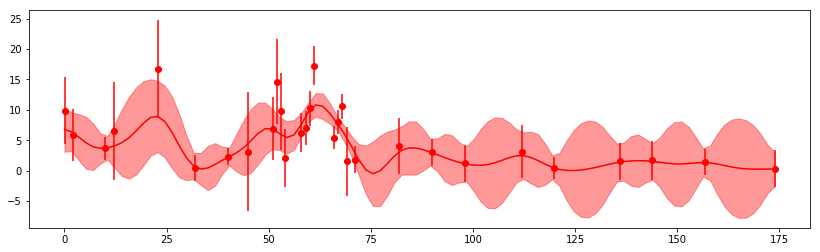

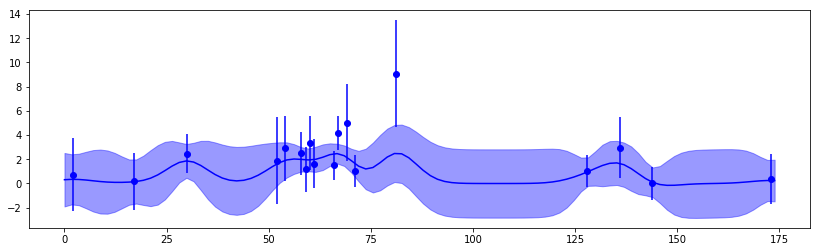

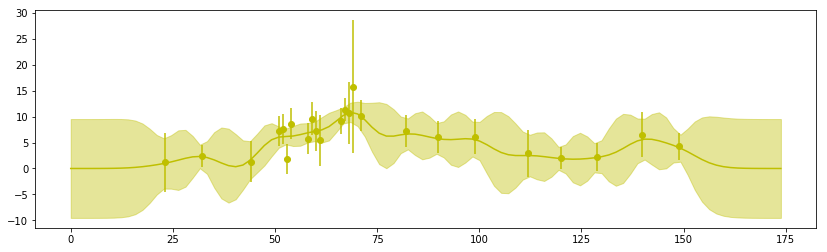

For random seed: 8


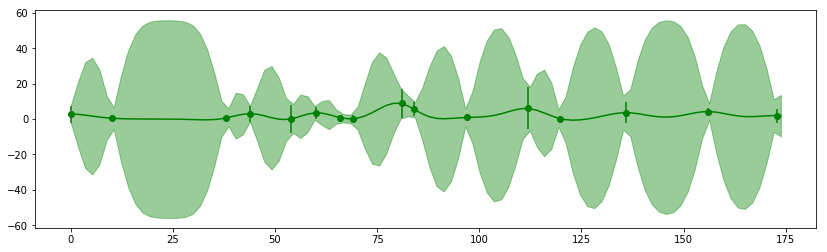

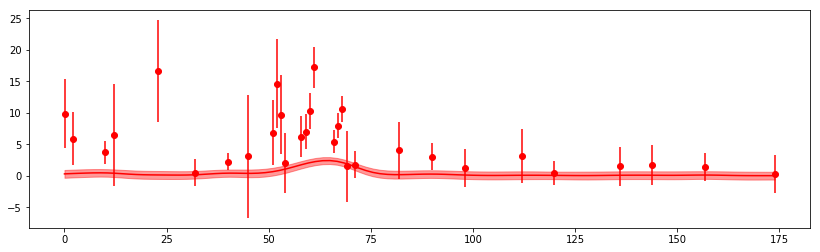

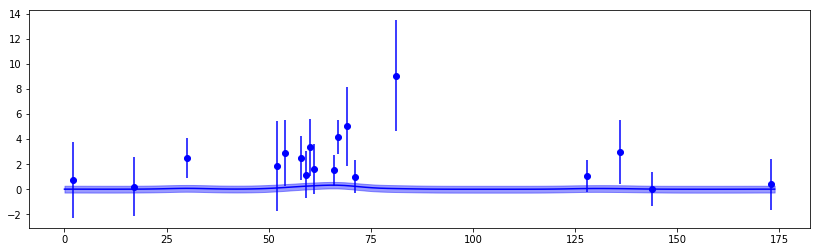

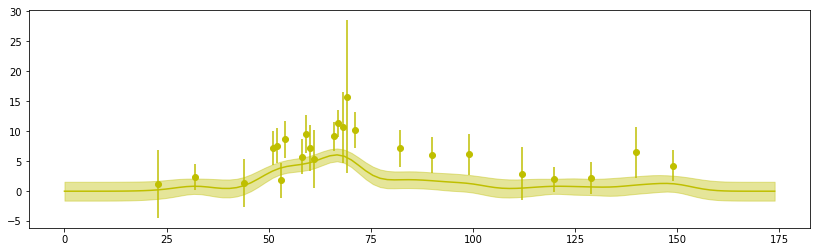

For random seed: 9


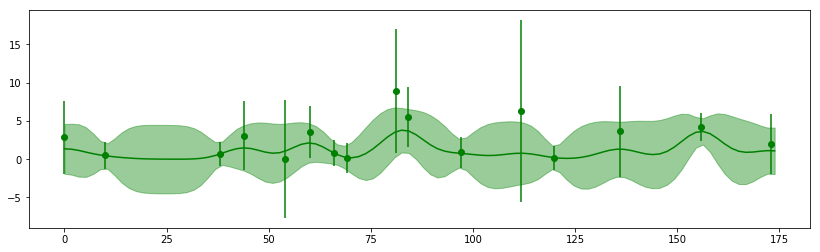

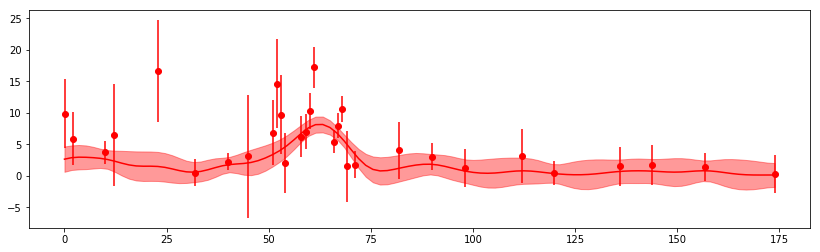

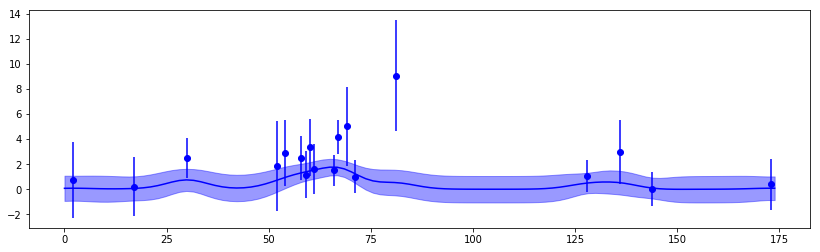

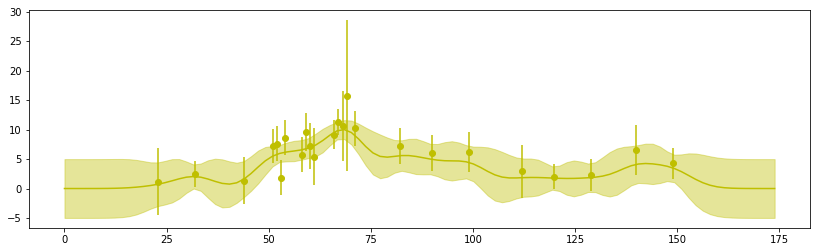

For random seed: 10


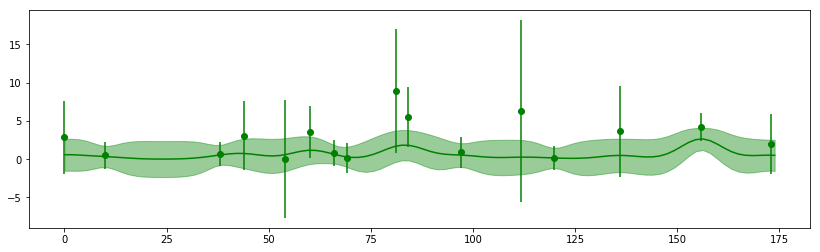

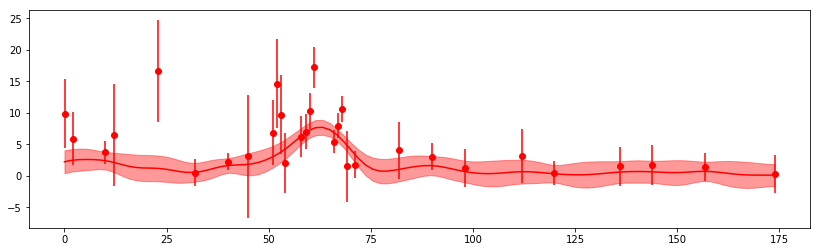

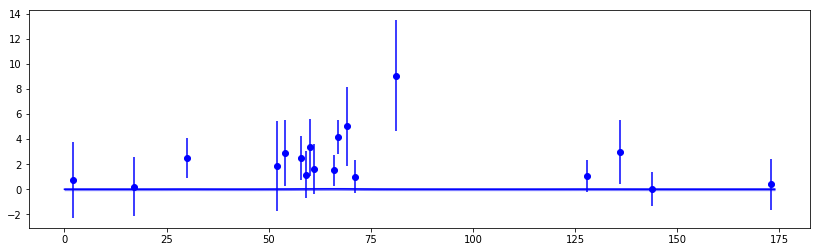

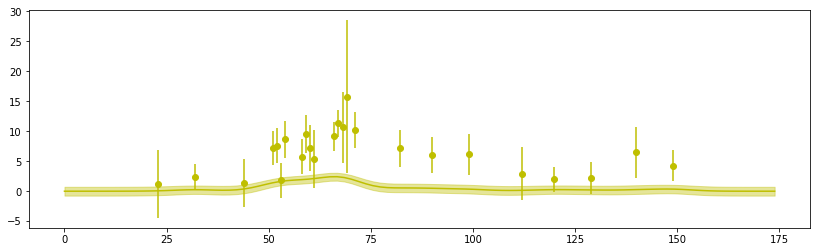

In [70]:
#Without error treatment, array mode
# SN001729
dfs, t = get_df(files[5398])
t = t.reshape(len(t),1)

x,y,yerr = [[],[],[],[]],[[],[],[],[]],[[],[],[],[]]

for i, band in enumerate(filters):
    x[i], y[i], yerr[i] = get_xys(cleaning_df(dfs[band]))
    x[i] = x[i].reshape(len(x[i]),1)
    
for i in range(11):
    np.random.seed(i)
    print ("For random seed:", i)
    with pm.Model() as model:
        alfa = 5
        eta = pm.HalfCauchy("N", beta=2, testval=2.0)
        lengthscale = pm.Gamma("L", alpha=4, beta=0.1)
        cov = eta**2 * pm.gp.cov.RatQuad(1, lengthscale, alfa)
    
        gp = pm.gp.Marginal(cov_func=cov)
        
        for j in range(len(x)):
            nome = 'y_' + str(i) + str(j)
            y_ = gp.marginal_likelihood(nome, X=x[j], y=y[j], noise=yerr[j])
        
            #mp = pm.find_MAP(include_transformed=True)
        
            mu, var = gp.predict(t, diag=True)
            fit = pd.DataFrame({"t": t.flatten(),
                            "mu_total": mu,
                            "sd_total": np.sqrt(var)})
            plot(x[j],y[j],yerr[j],fit, c = j)

For random seed: 0


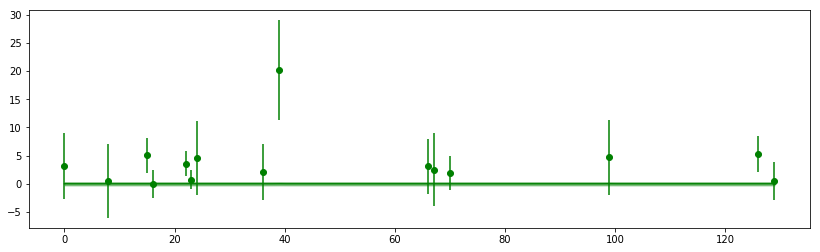

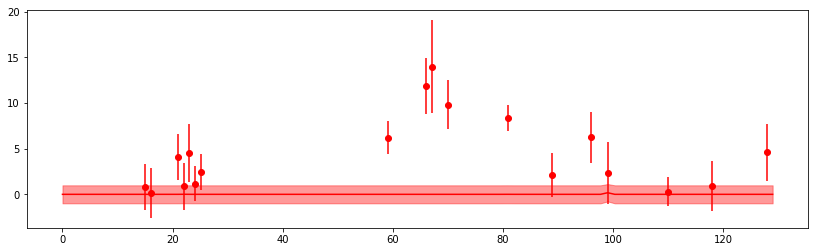

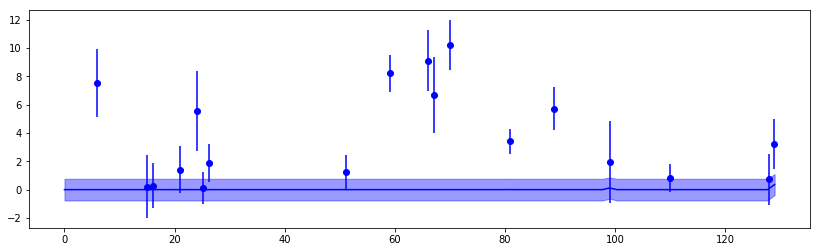

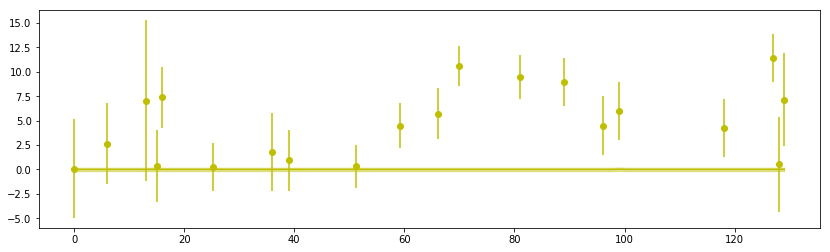

For random seed: 1


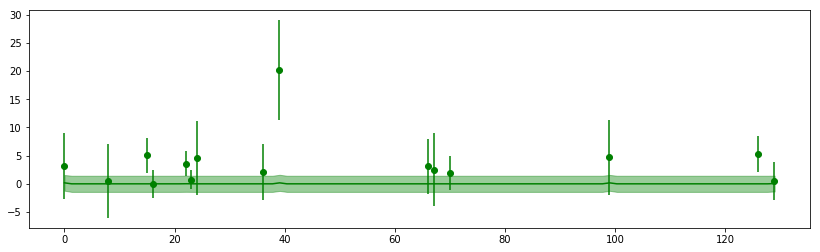

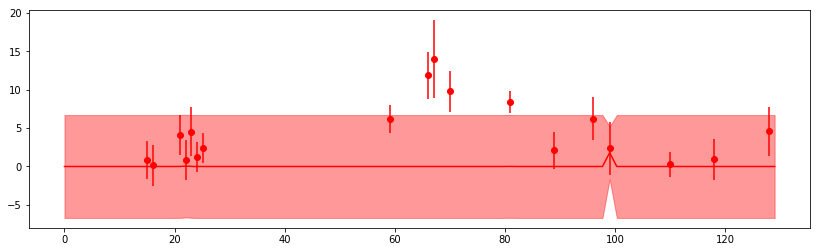

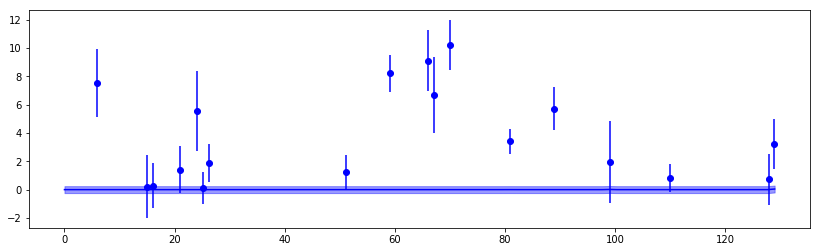

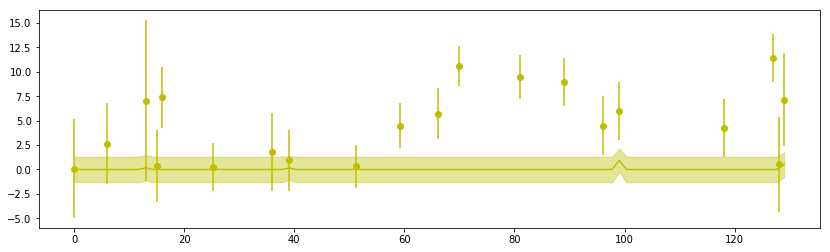

For random seed: 2


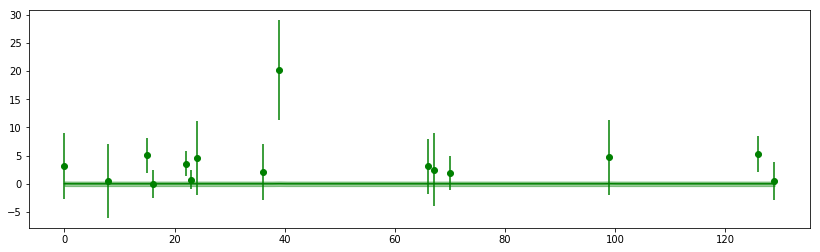

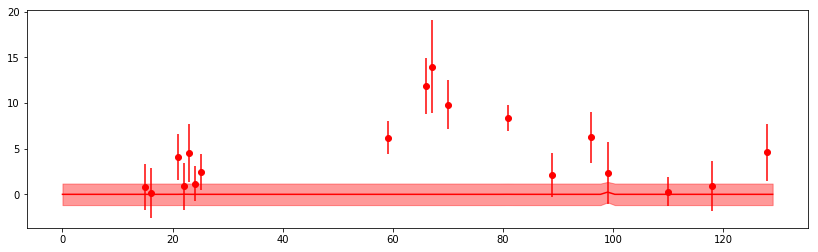

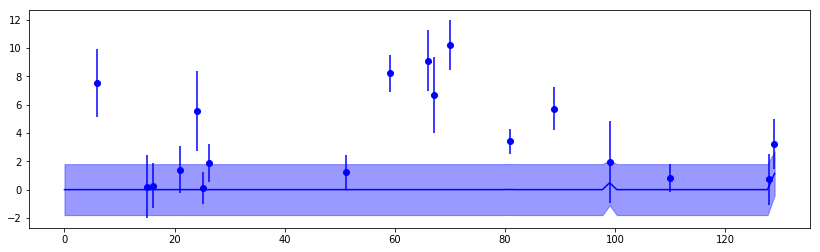

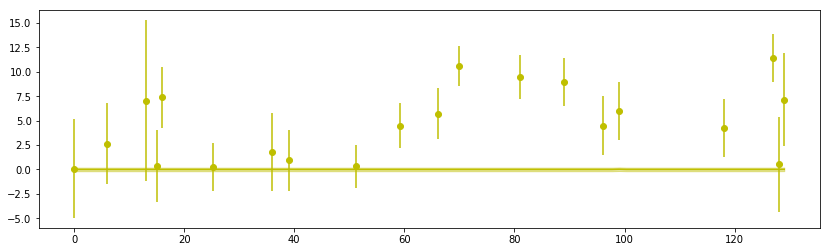

For random seed: 3


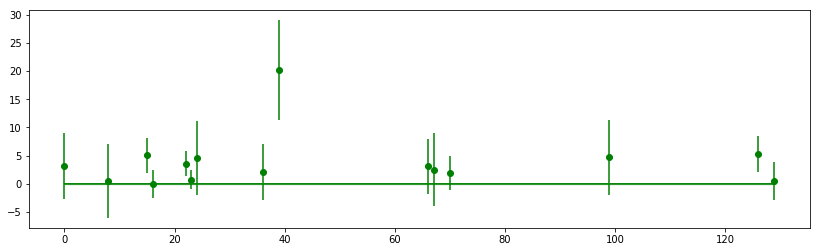

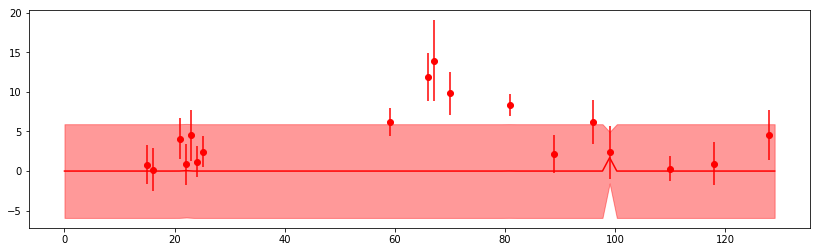

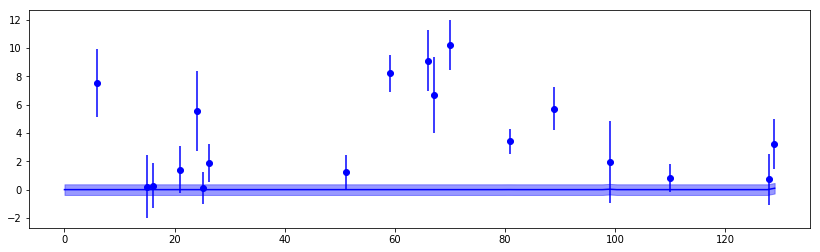

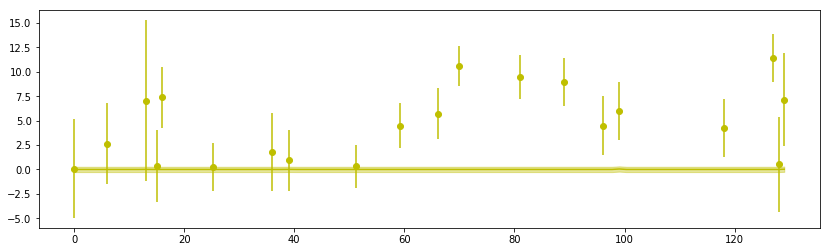

For random seed: 4


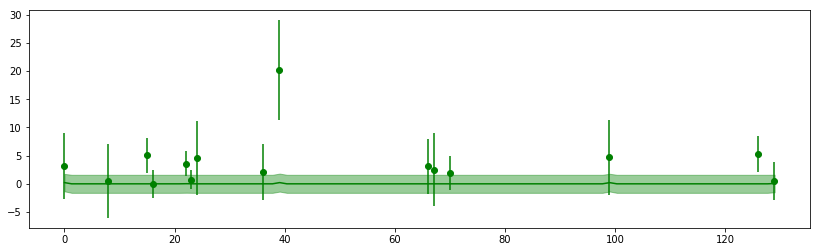

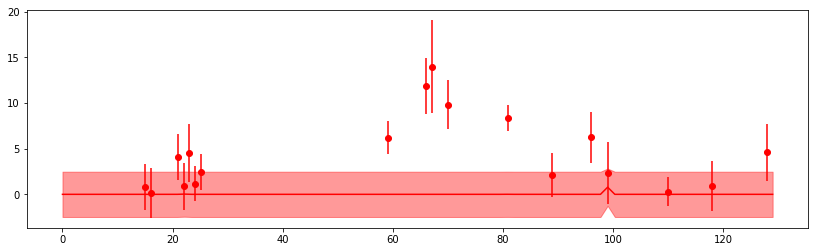

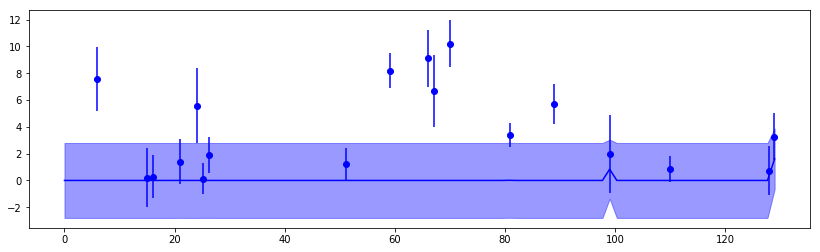

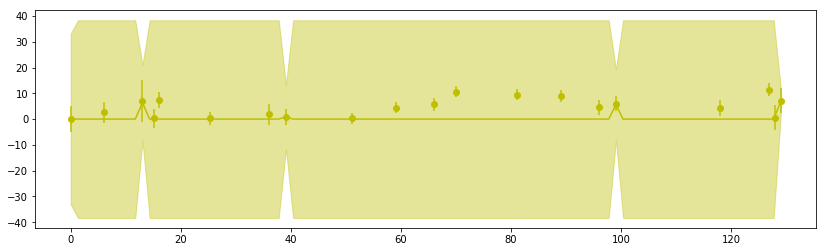

For random seed: 5


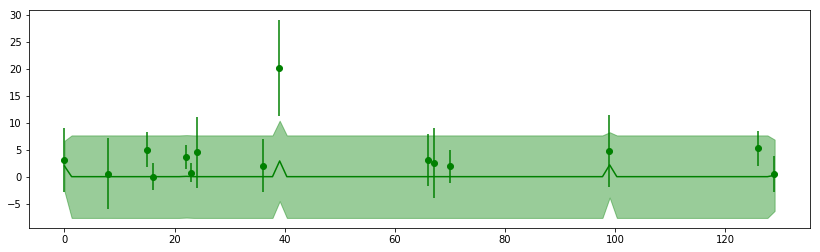

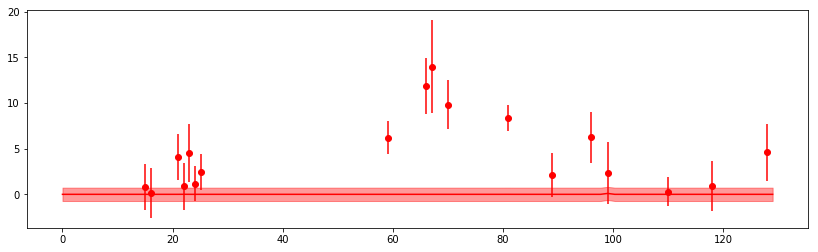

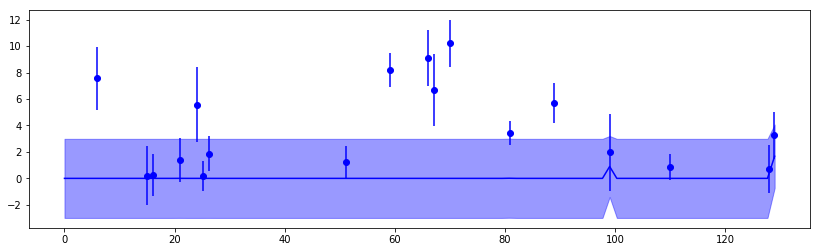

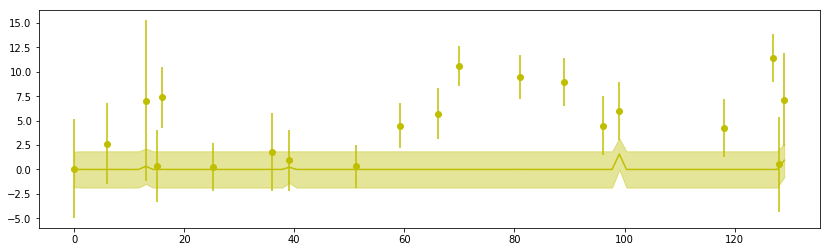

For random seed: 6


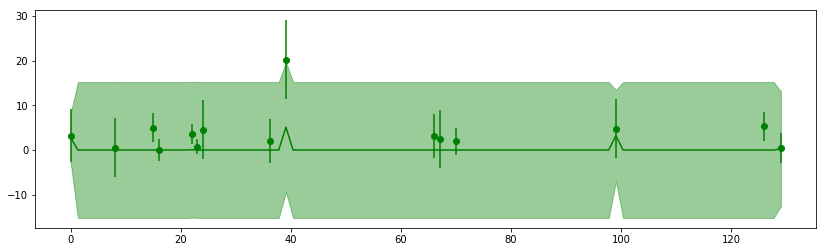

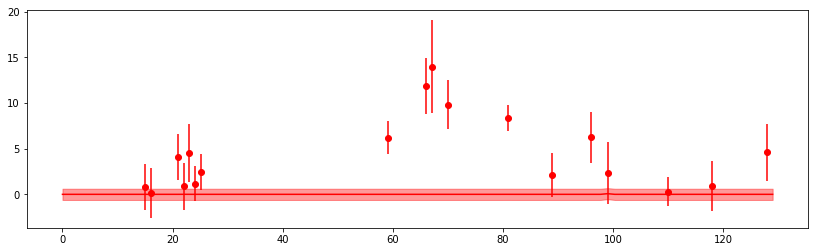

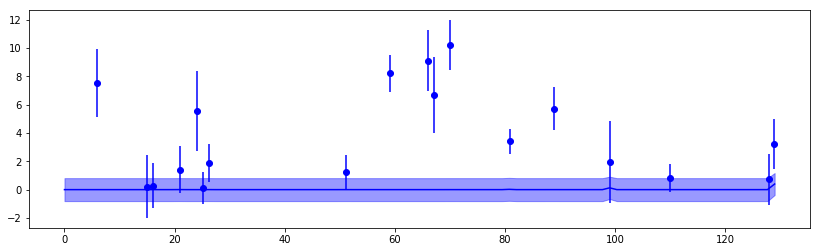

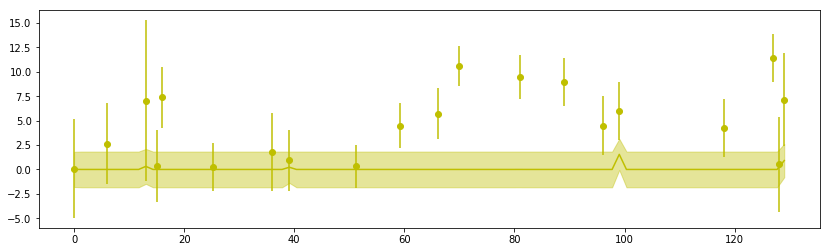

For random seed: 7


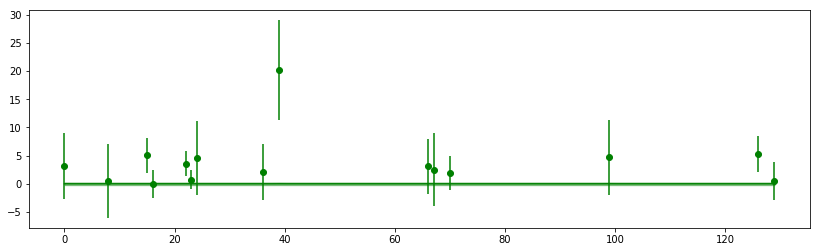

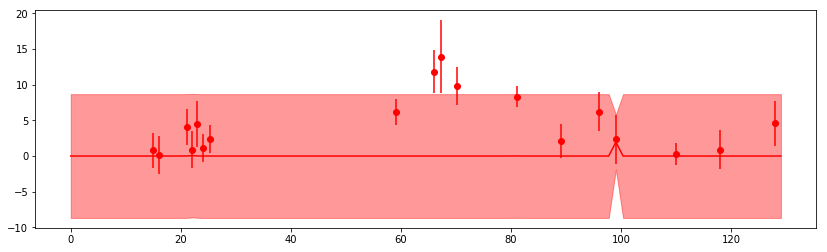

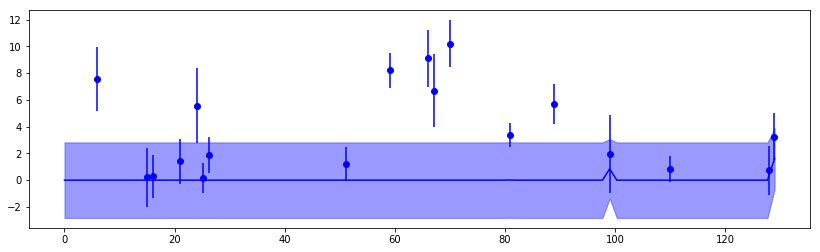

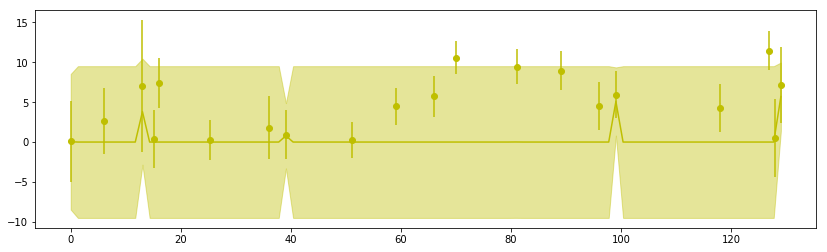

For random seed: 8


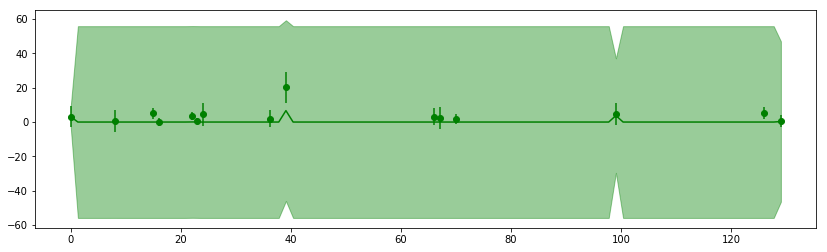

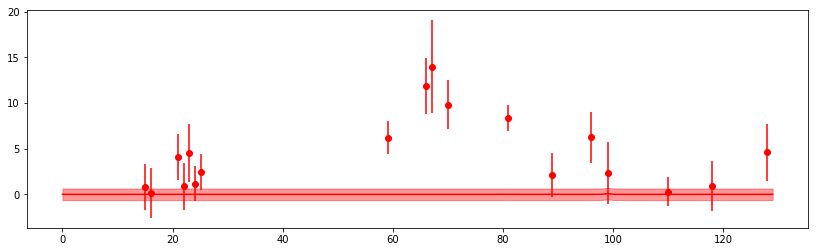

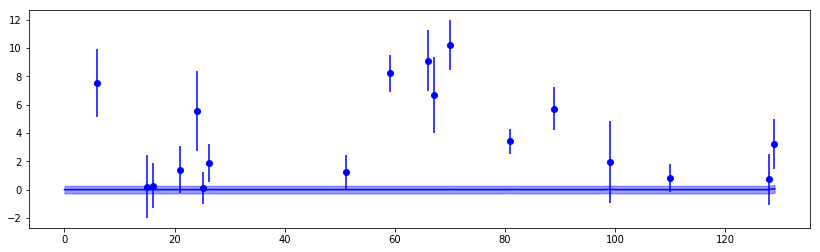

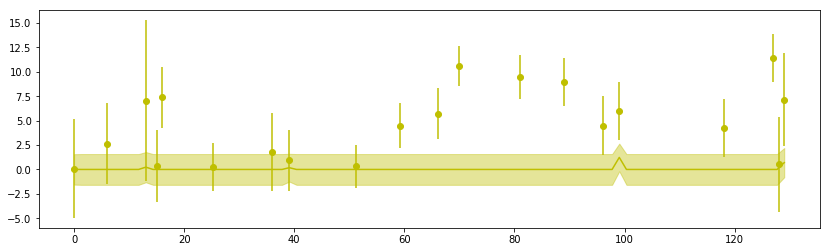

For random seed: 9


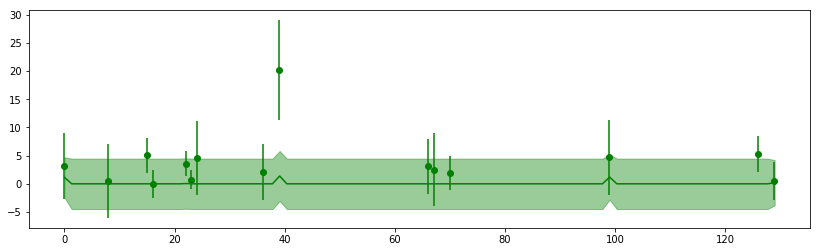

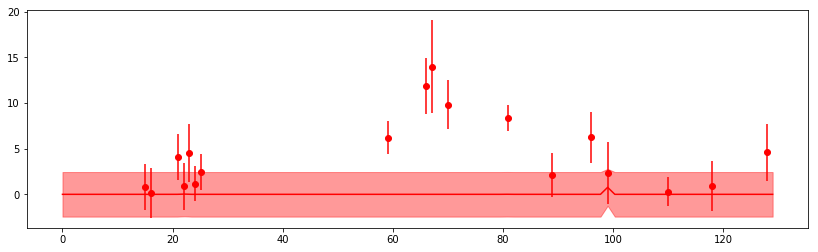

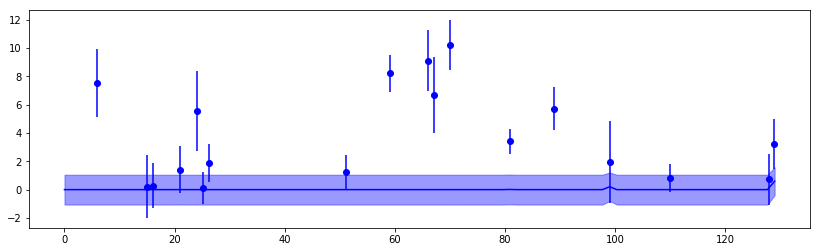

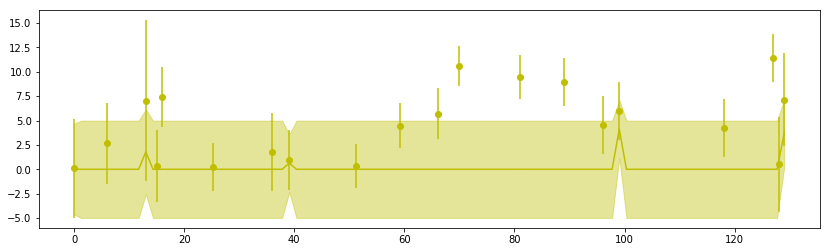

For random seed: 10


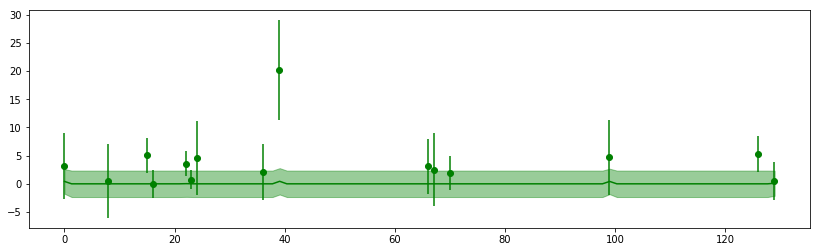

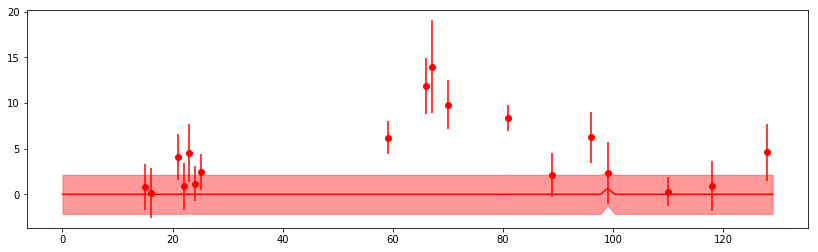

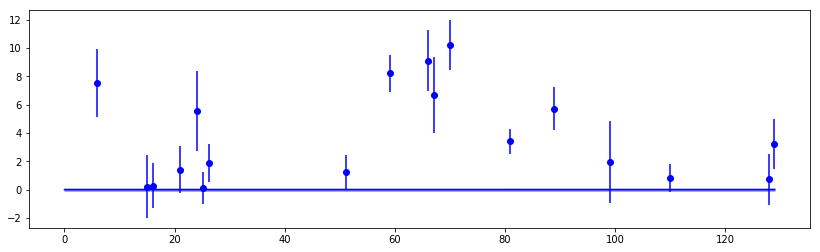

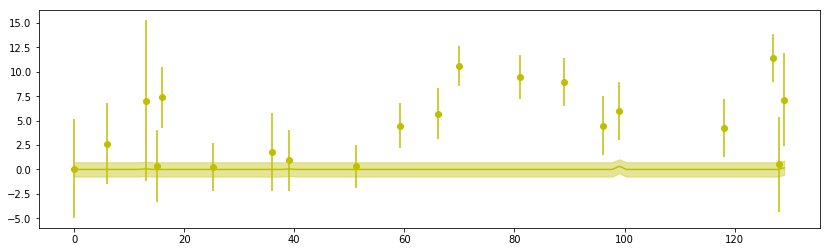

In [72]:
#Without error treatment, array mode
# SN000858 
# alfa = 0.05
dfs, t = get_df(files[8199])
t = t.reshape(len(t),1)

x,y,yerr = [[],[],[],[]],[[],[],[],[]],[[],[],[],[]]

for i, band in enumerate(filters):
    x[i], y[i], yerr[i] = get_xys(cleaning_df(dfs[band]))
    x[i] = x[i].reshape(len(x[i]),1)
    
for i in range(11):
    np.random.seed(i)
    print ("For random seed:", i)
    with pm.Model() as model:
        alfa = 0.05
        eta = pm.HalfCauchy("N", beta=2, testval=2.0)
        lengthscale = pm.Gamma("L", alpha=4, beta=0.1)
        cov = eta**2 * pm.gp.cov.RatQuad(1, lengthscale, alfa)
    
        gp = pm.gp.Marginal(cov_func=cov)
        
        for j in range(len(x)):
            nome = 'y_' + str(i) + str(j)
            y_ = gp.marginal_likelihood(nome, X=x[j], y=y[j], noise=yerr[j])
        
            #mp = pm.find_MAP(include_transformed=True)
        
            mu, var = gp.predict(t, diag=True)
            fit = pd.DataFrame({"t": t.flatten(),
                            "mu_total": mu,
                            "sd_total": np.sqrt(var)})
            plot(x[j],y[j],yerr[j],fit, c = j)

For random seed: 0


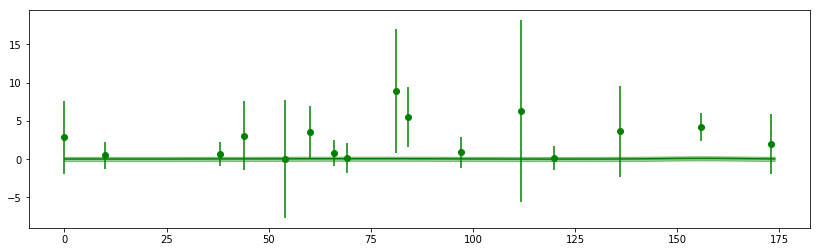

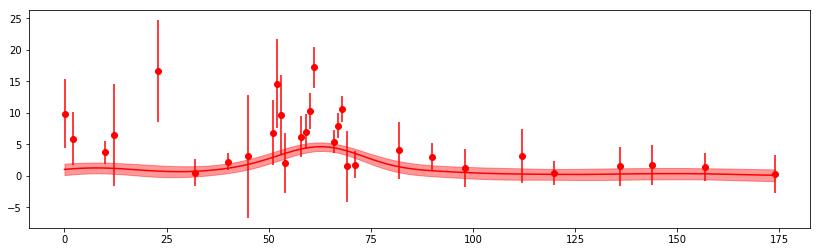

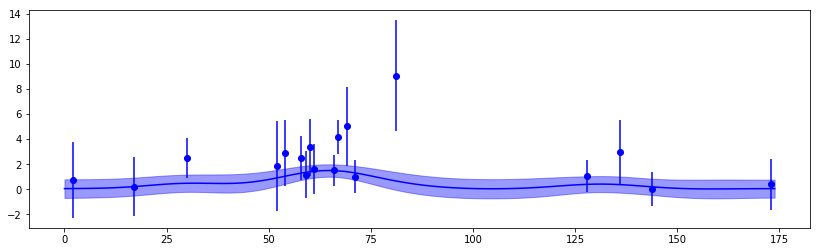

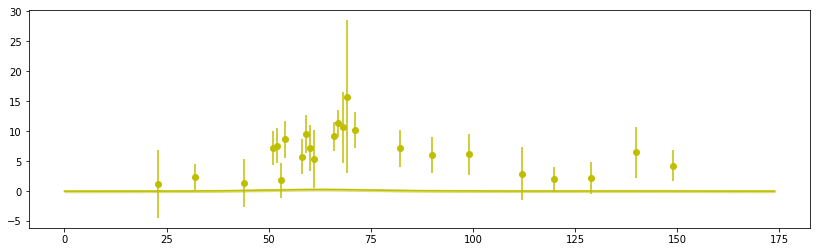

For random seed: 1


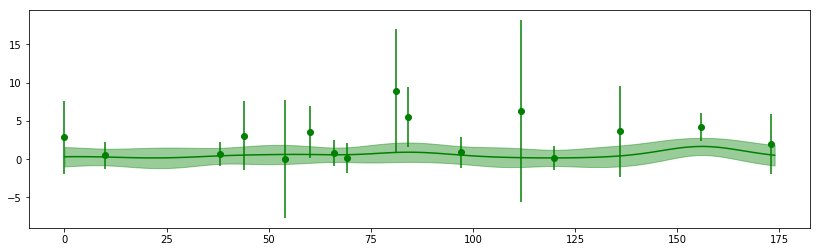

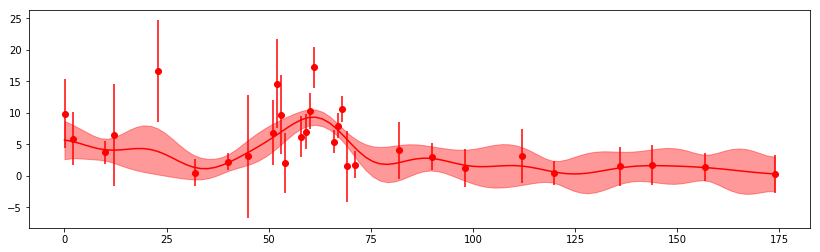

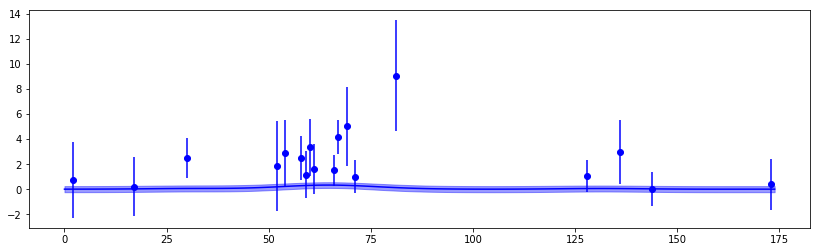

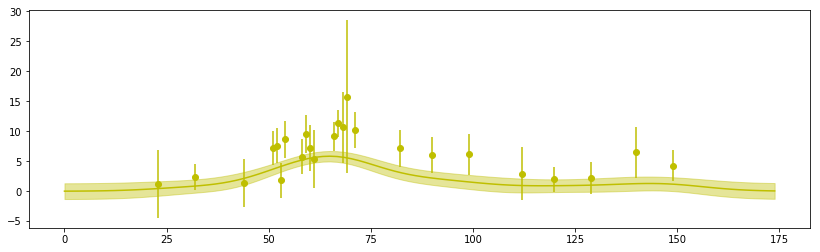

For random seed: 2


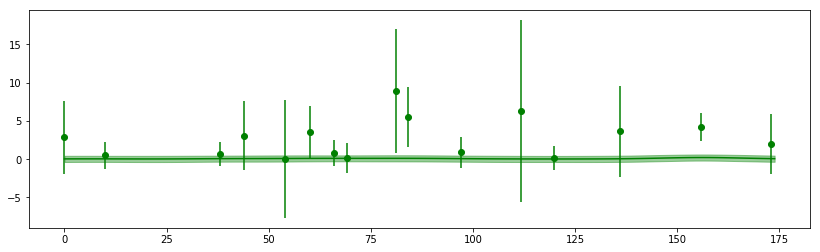

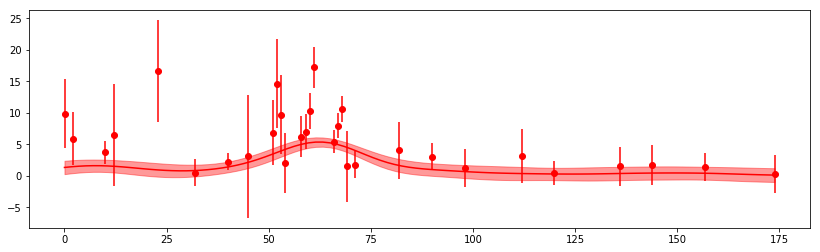

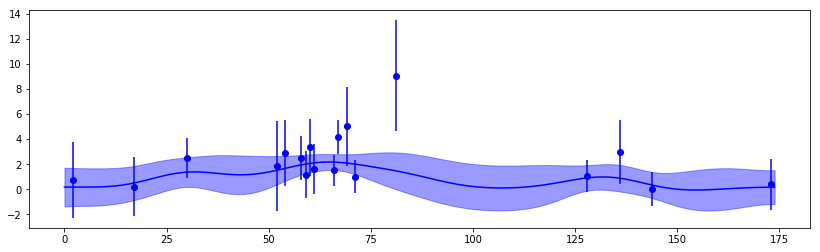

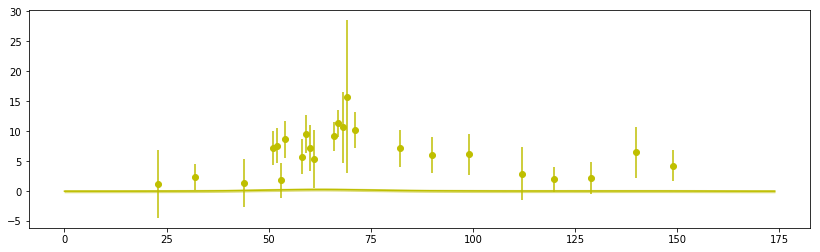

For random seed: 3


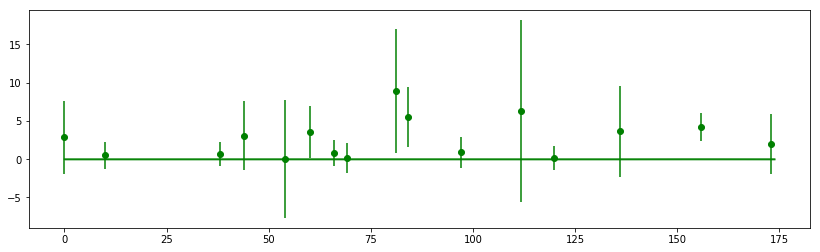

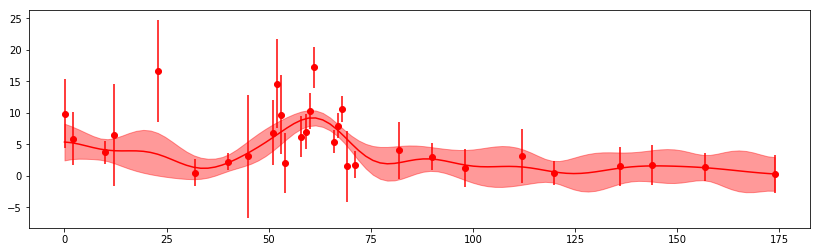

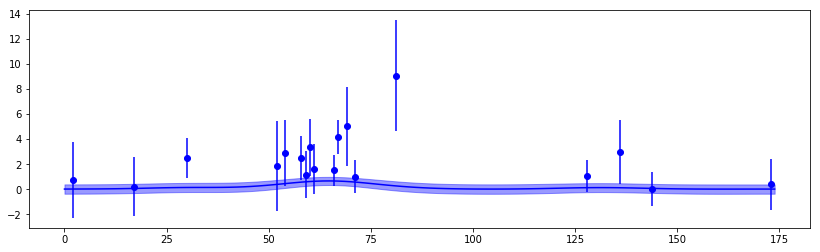

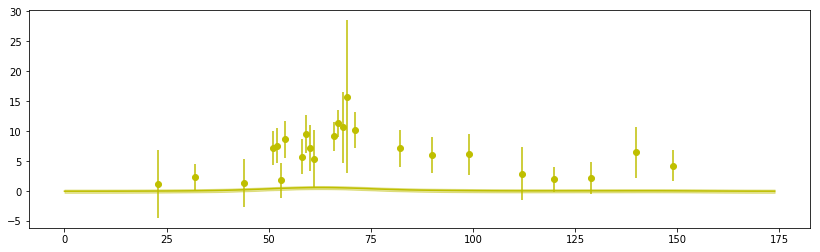

For random seed: 4


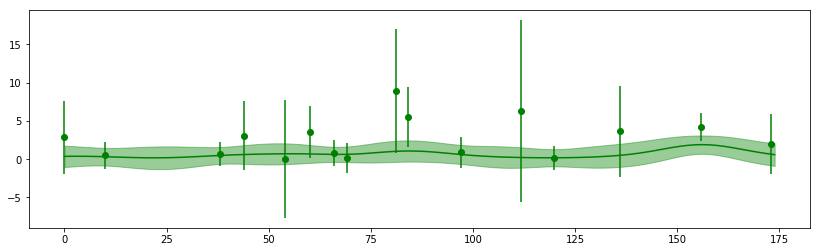

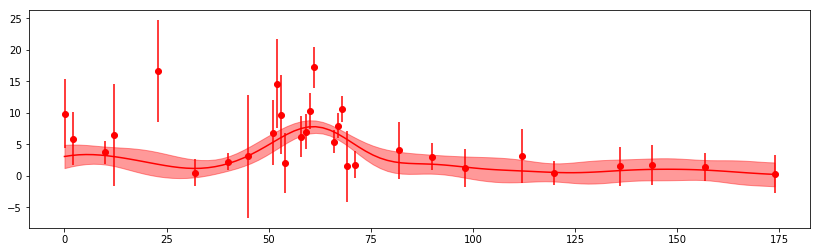

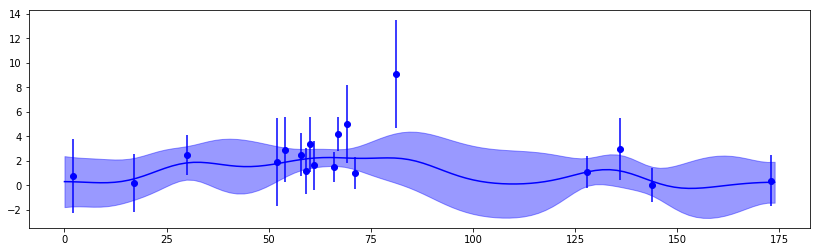

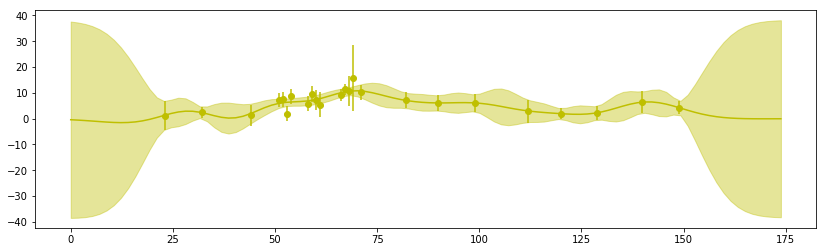

For random seed: 5


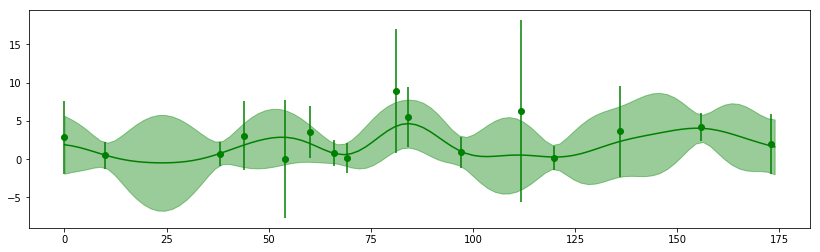

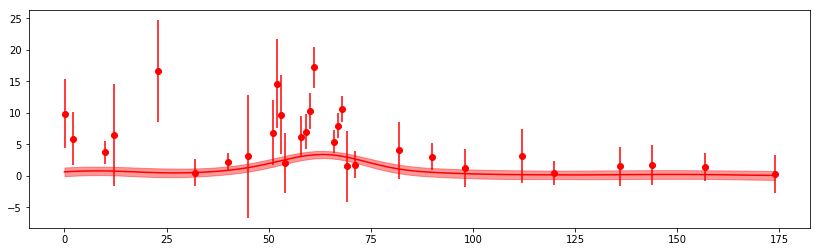

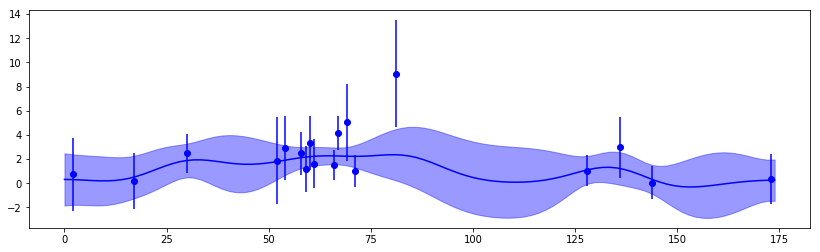

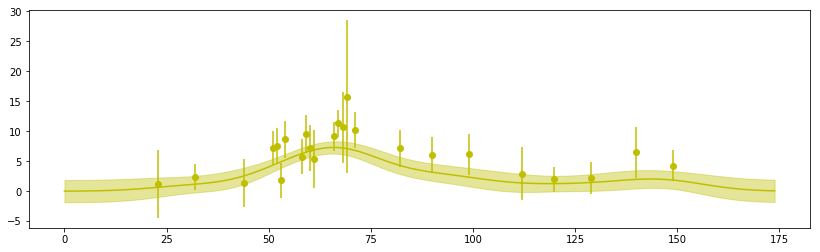

For random seed: 6


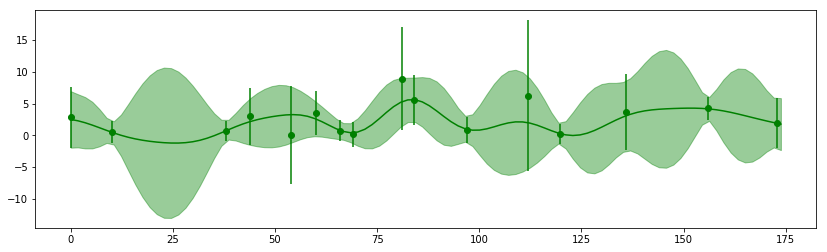

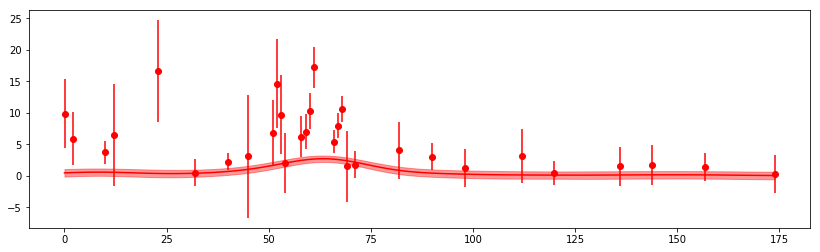

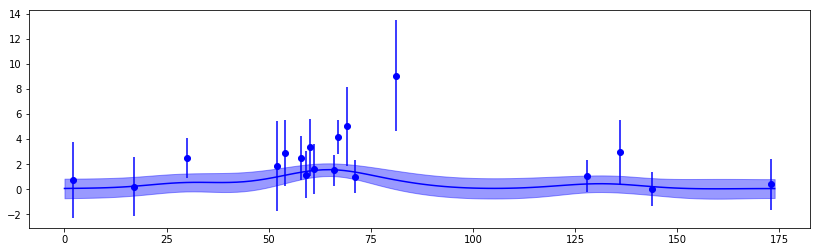

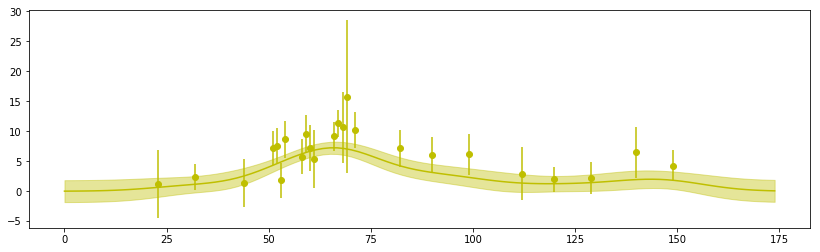

For random seed: 7


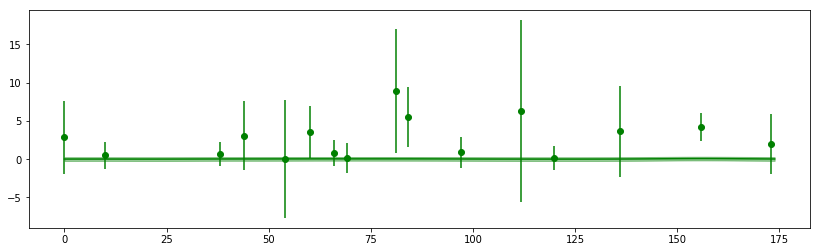

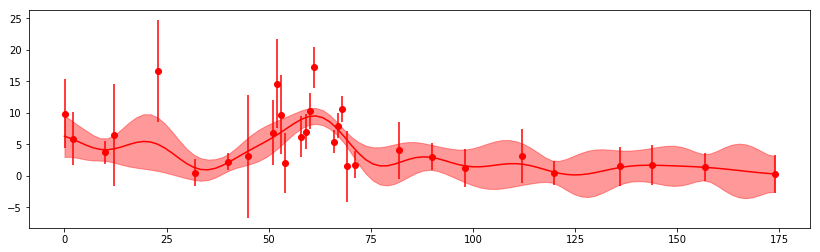

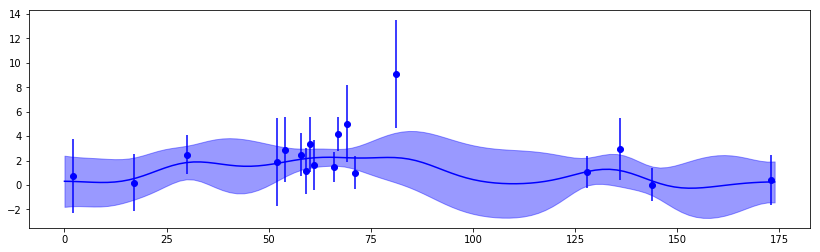

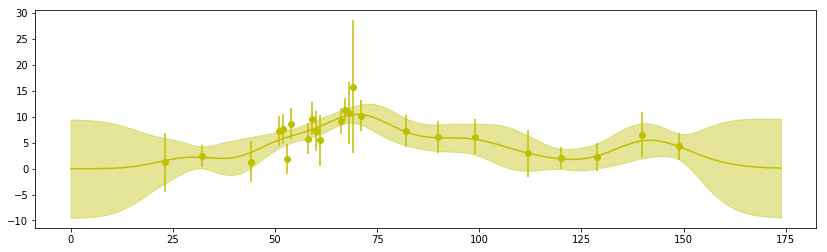

For random seed: 8


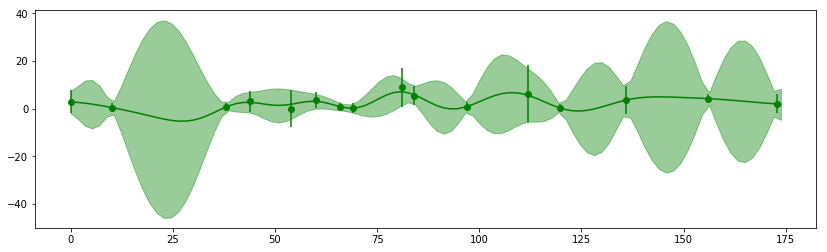

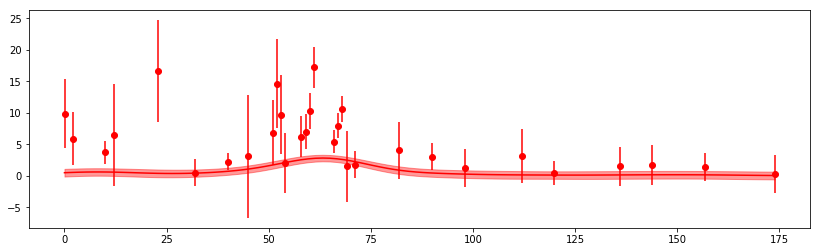

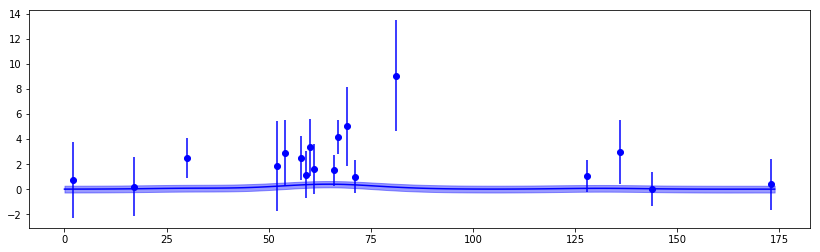

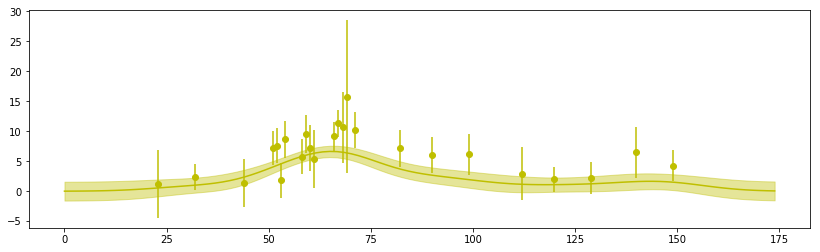

For random seed: 9


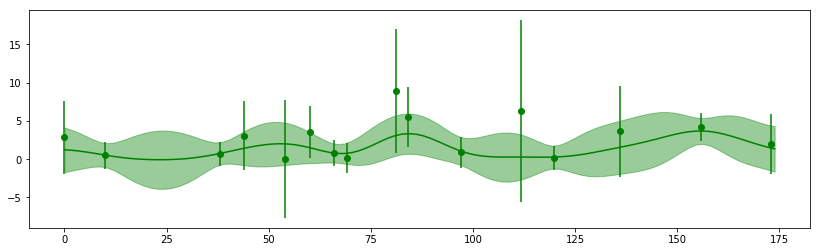

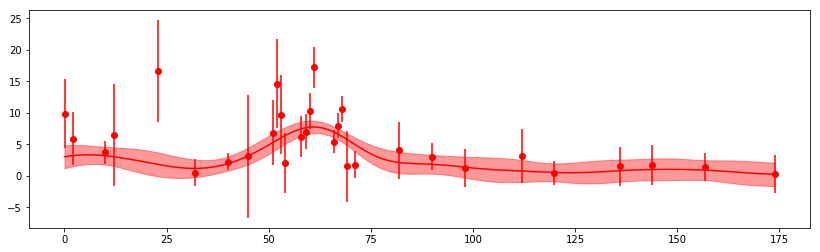

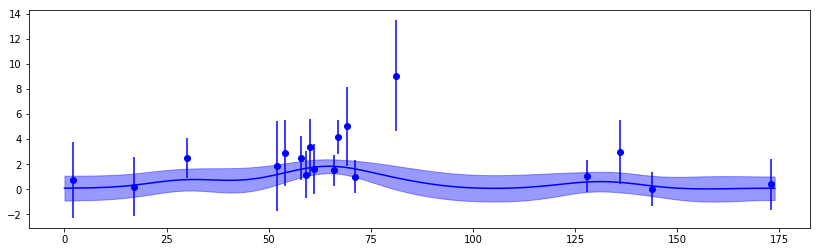

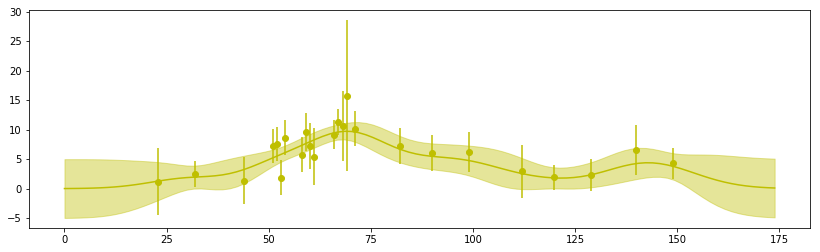

For random seed: 10


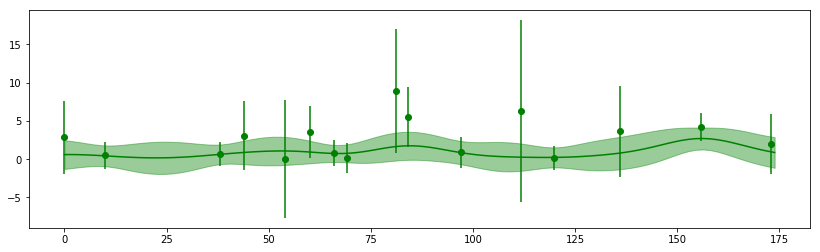

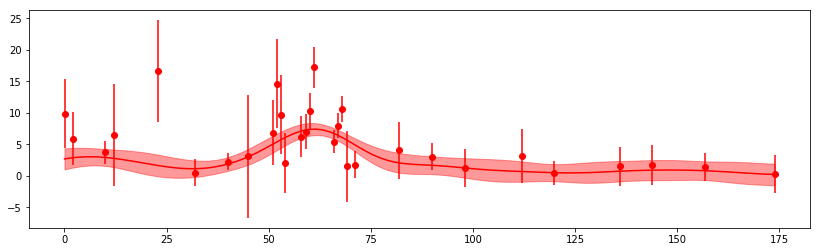

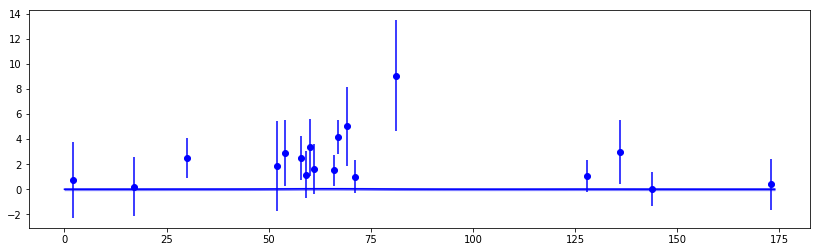

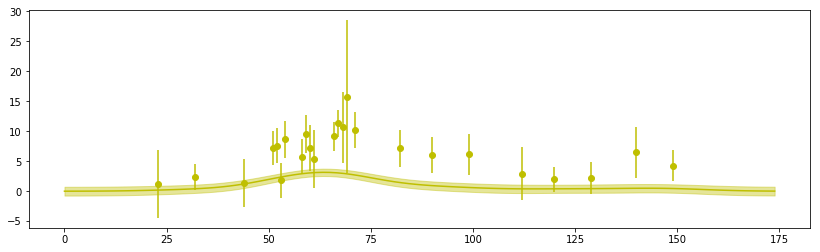

In [71]:
#Without error treatment, array mode
# SN001729
# alfa = 10
dfs, t = get_df(files[5398])
t = t.reshape(len(t),1)

x,y,yerr = [[],[],[],[]],[[],[],[],[]],[[],[],[],[]]

for i, band in enumerate(filters):
    x[i], y[i], yerr[i] = get_xys(cleaning_df(dfs[band]))
    x[i] = x[i].reshape(len(x[i]),1)
    
for i in range(11):
    np.random.seed(i)
    print ("For random seed:", i)
    with pm.Model() as model:
        alfa = 10
        eta = pm.HalfCauchy("N", beta=2, testval=2.0)
        lengthscale = pm.Gamma("L", alpha=4, beta=0.1)
        cov = eta**2 * pm.gp.cov.RatQuad(1, lengthscale, alfa)
    
        gp = pm.gp.Marginal(cov_func=cov)
        
        for j in range(len(x)):
            nome = 'y_' + str(i) + str(j)
            y_ = gp.marginal_likelihood(nome, X=x[j], y=y[j], noise=yerr[j])
        
            #mp = pm.find_MAP(include_transformed=True)
        
            mu, var = gp.predict(t, diag=True)
            fit = pd.DataFrame({"t": t.flatten(),
                            "mu_total": mu,
                            "sd_total": np.sqrt(var)})
            plot(x[j],y[j],yerr[j],fit, c = j)

#### Matern 5/2 
$$k(x, x') = \left(1 + \frac{\sqrt{5(x - x')^2}}{\ell} +
            \frac{5(x-x')^2}{3\ell^2}\right)
            \mathrm{exp}\left[ - \frac{\sqrt{5(x - x')^2}}{\ell} \right]$$
### Good

### At this point we will only consider the following seeds: [4,5,6,7,8,9]

For random seed: 4


/home/felipematheus/anaconda3/lib/python3.7/site-packages/theano/tensor/basic.py:6611: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  result[diagonal_slice] = x


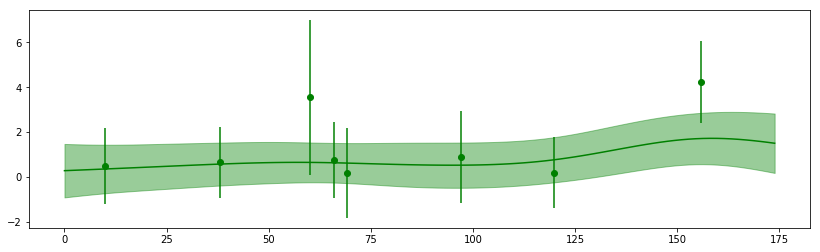

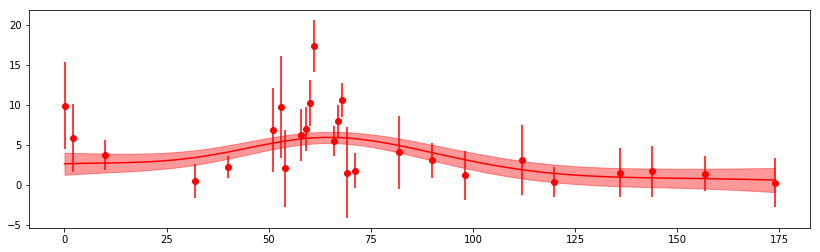

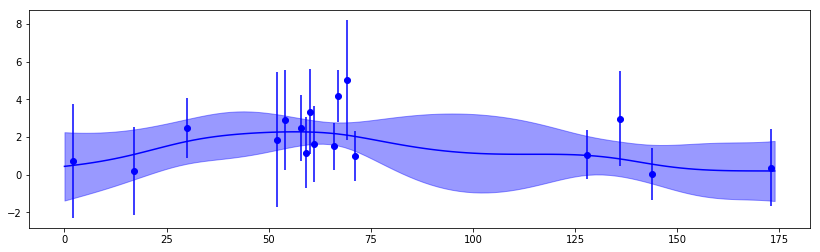

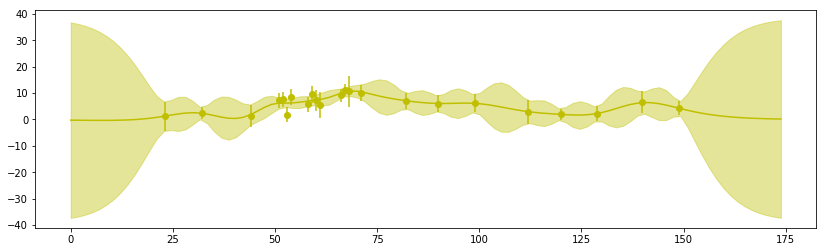

For random seed: 5


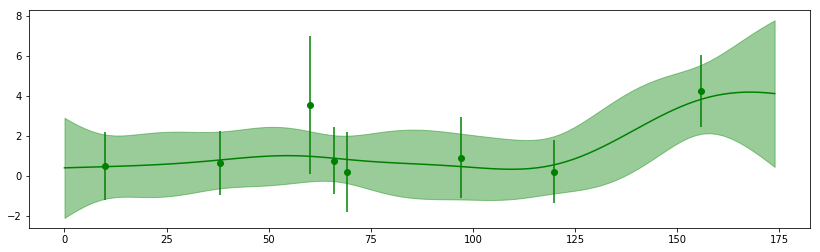

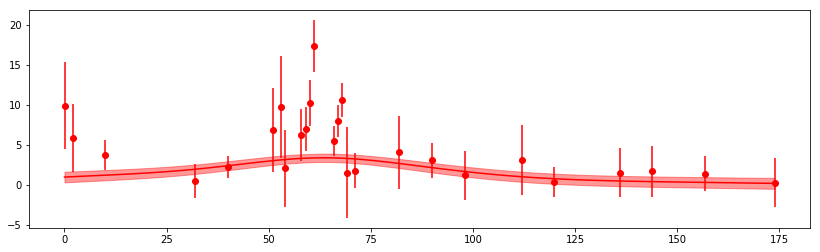

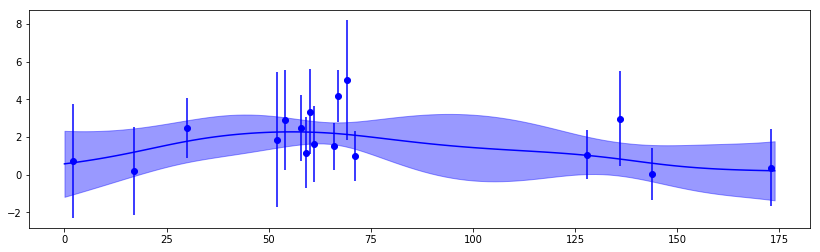

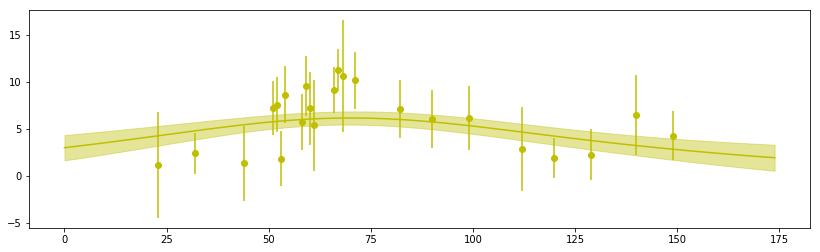

For random seed: 6


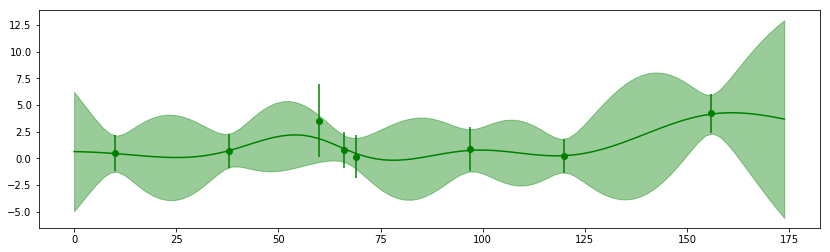

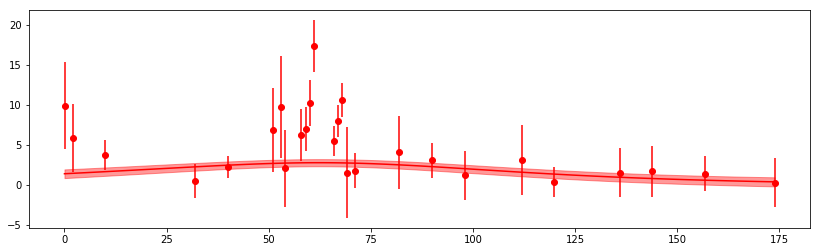

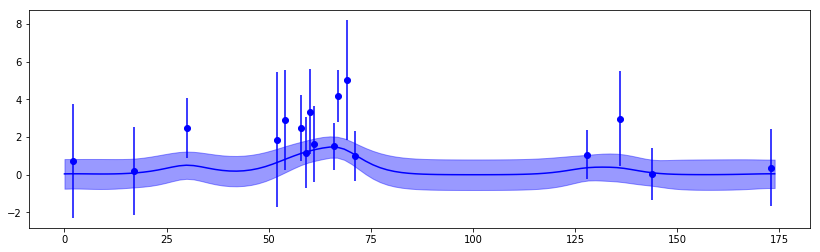

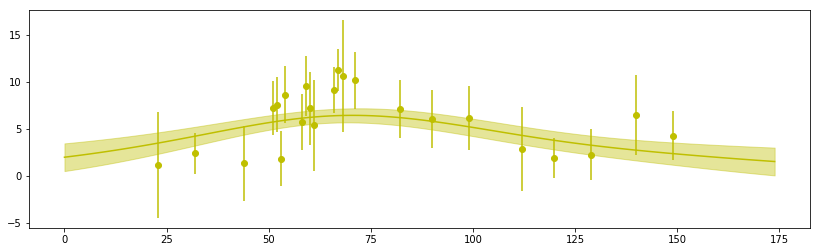

For random seed: 7


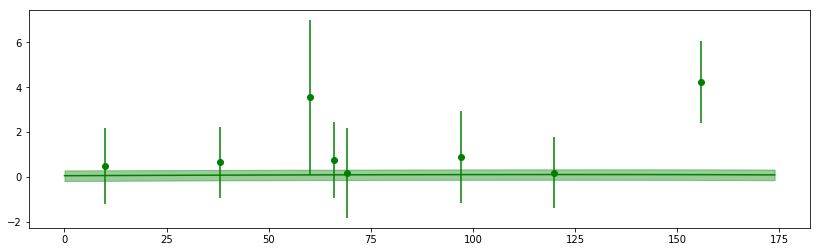

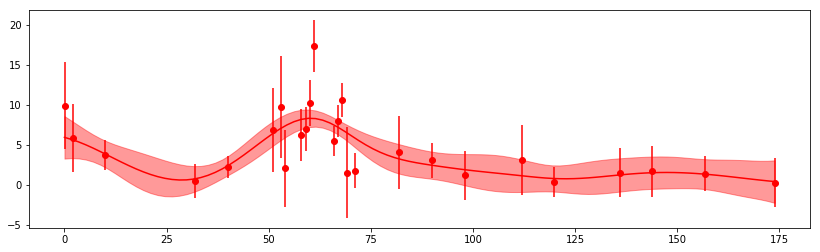

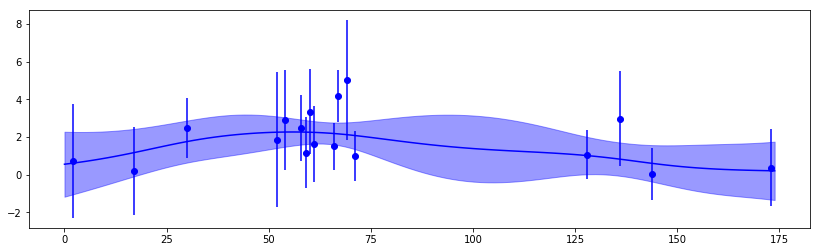

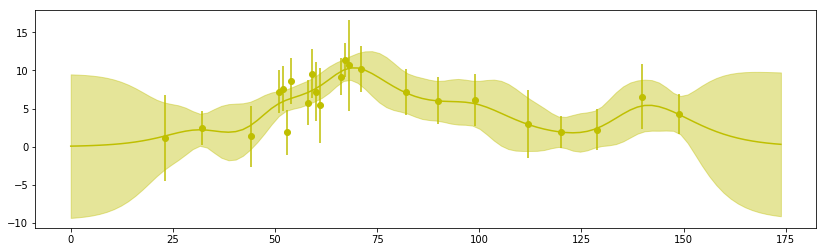

For random seed: 8


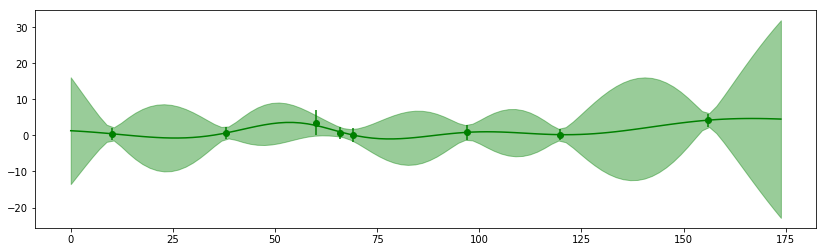

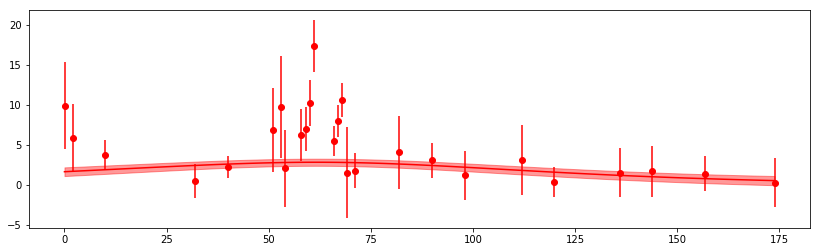

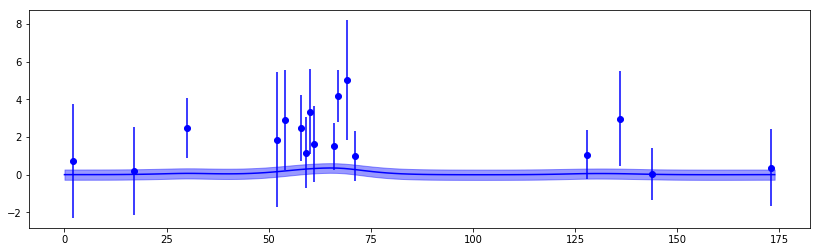

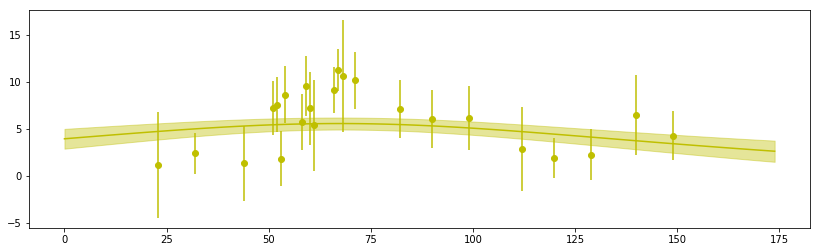

For random seed: 9


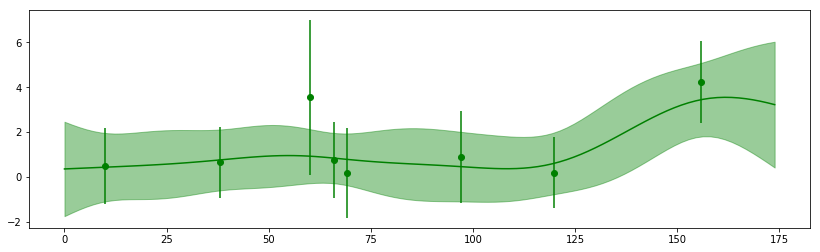

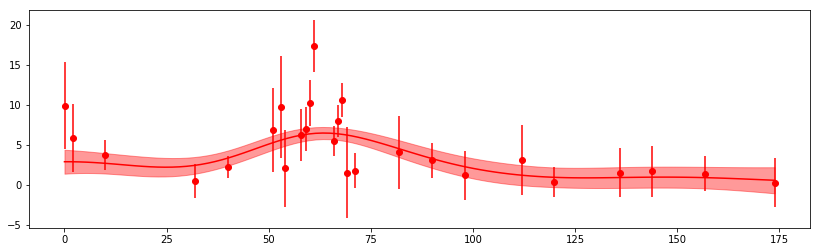

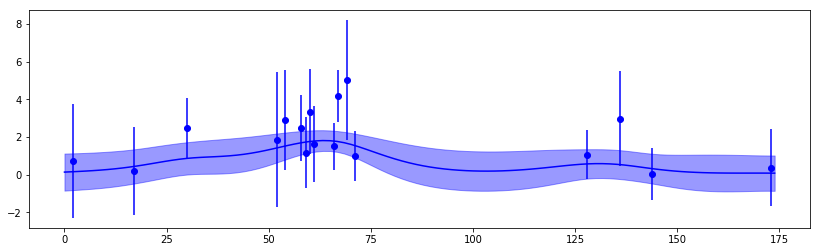

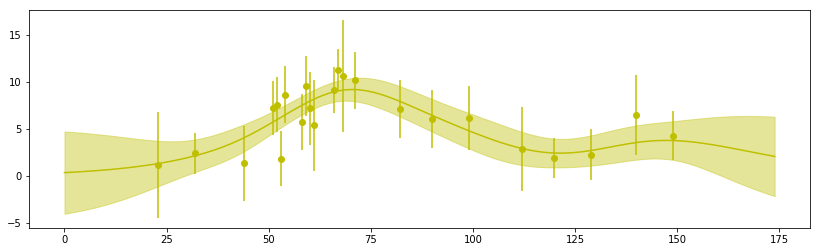

In [76]:
#with error treatment percentage, array mode
# SN001729
dfs, t = get_df(files[5398])
t = t.reshape(len(t),1)

x,y,yerr = [[],[],[],[]],[[],[],[],[]],[[],[],[],[]]

for i, band in enumerate(filters):
    x[i], y[i], yerr[i] = get_xys(cleaning_df(dfs[band], method = 'percentage', clean_neg = True, percentage = 0.4))
    x[i] = x[i].reshape(len(x[i]),1)
    
for i in range(4,10):
    np.random.seed(i)
    print ("For random seed:", i)
    with pm.Model() as model:
        eta = pm.HalfCauchy("N", beta=2, testval=2.0)
        lengthscale = pm.Gamma("L", alpha=4, beta=0.1)
        cov = eta**2 * pm.gp.cov.Matern52(1, lengthscale)
    
        gp = pm.gp.Marginal(cov_func=cov)
        
        for j in range(len(x)):
            nome = 'y_' + str(i) + str(j)
            y_ = gp.marginal_likelihood(nome, X=x[j], y=y[j], noise=yerr[j])
        
            #mp = pm.find_MAP(include_transformed=True)
        
            mu, var = gp.predict(t, diag=True)
            fit = pd.DataFrame({"t": t.flatten(),
                            "mu_total": mu,
                            "sd_total": np.sqrt(var)})
            plot(x[j],y[j],yerr[j],fit, c = j)

For random seed: 4


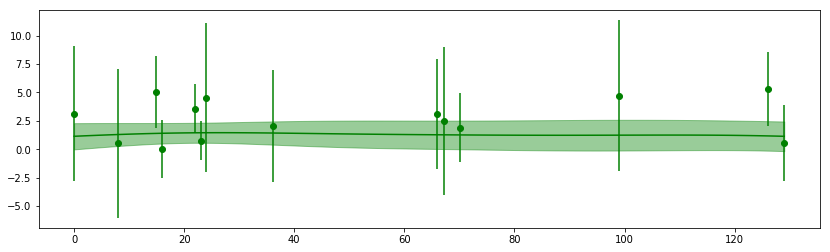

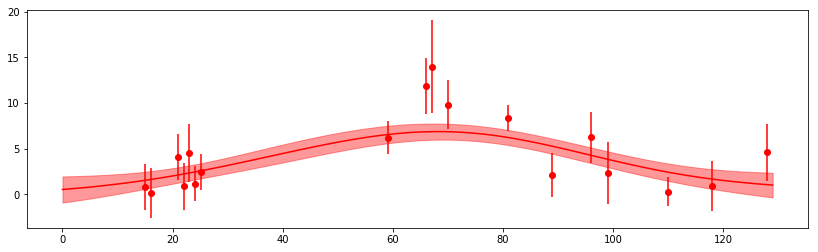

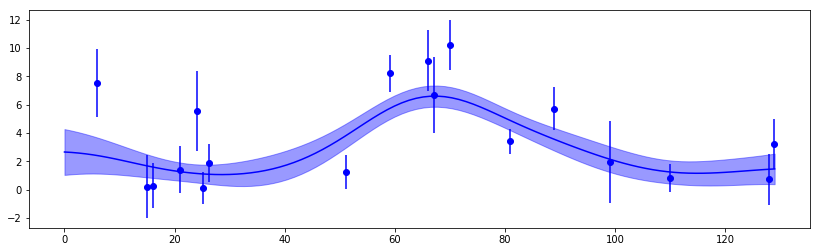

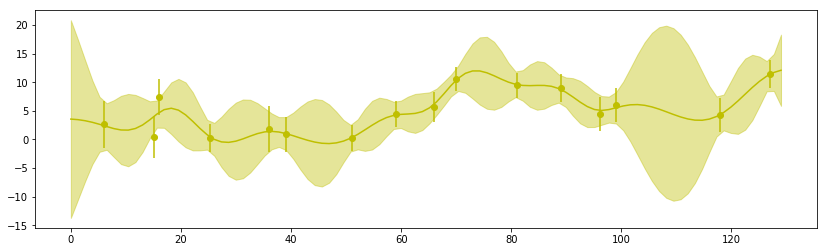

For random seed: 5


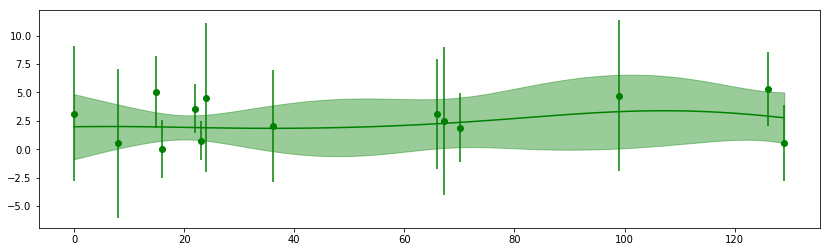

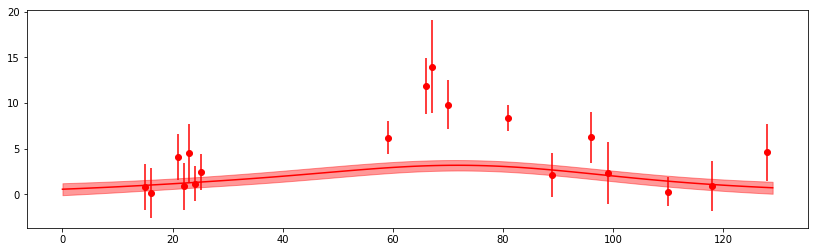

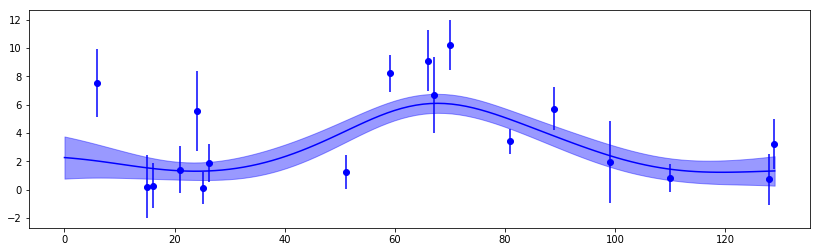

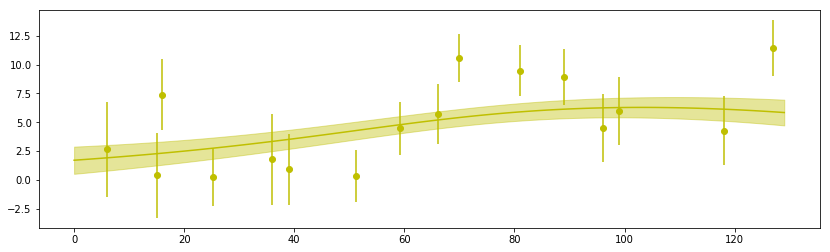

For random seed: 6


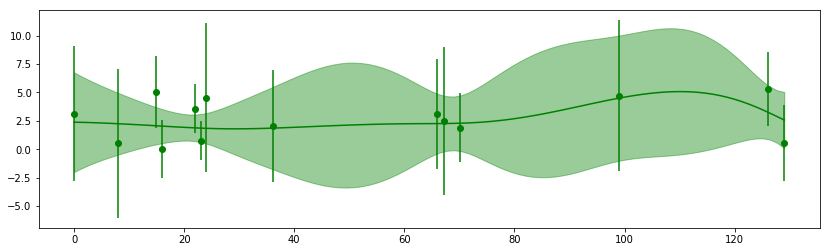

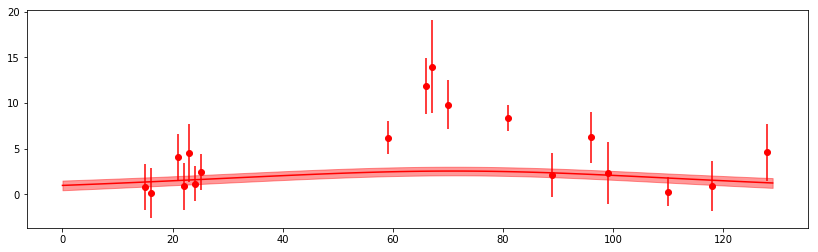

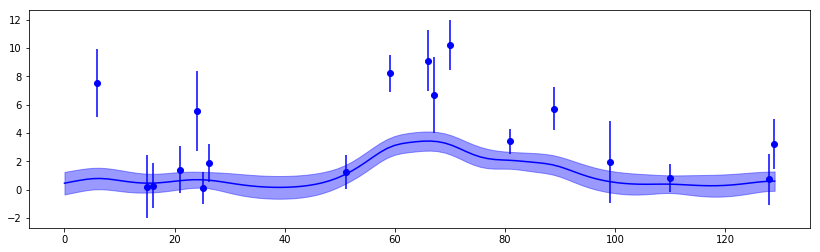

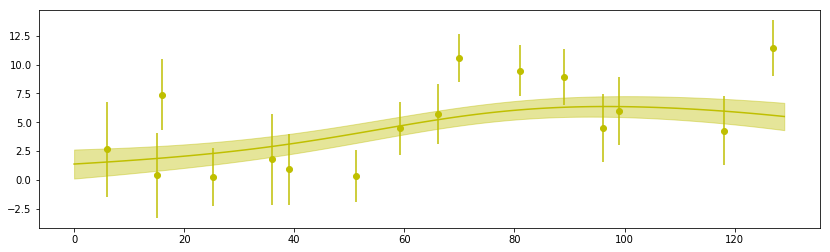

For random seed: 7


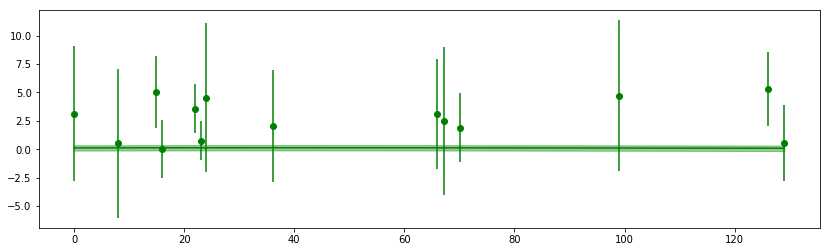

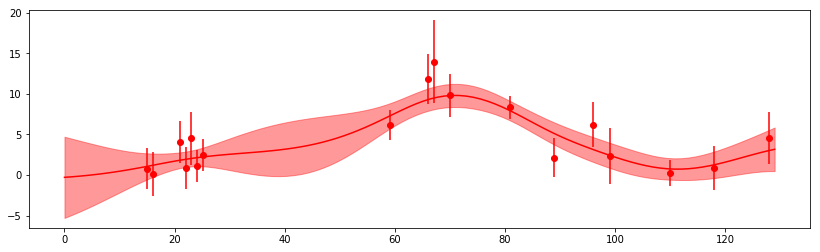

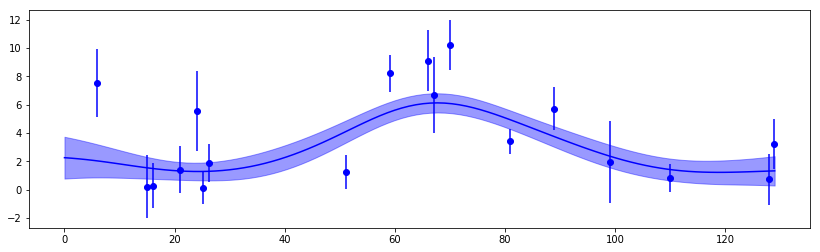

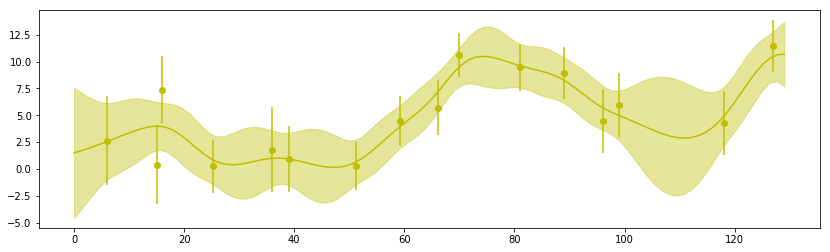

For random seed: 8


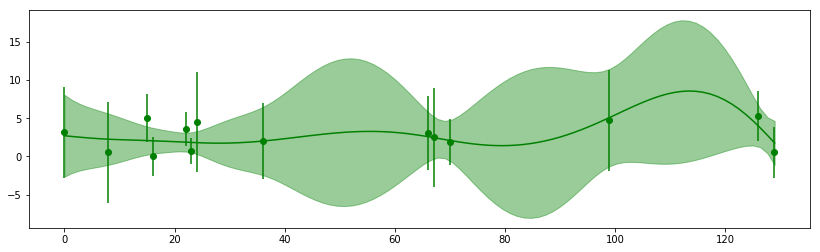

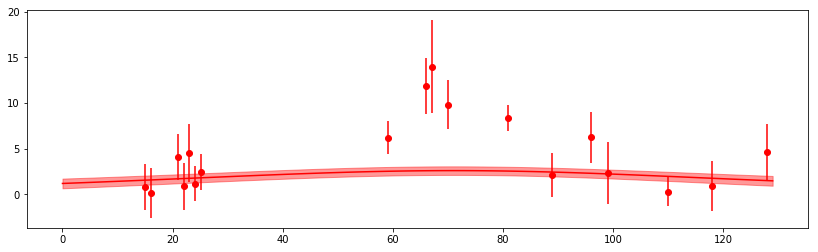

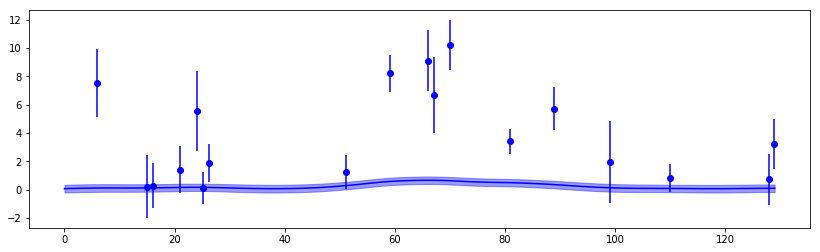

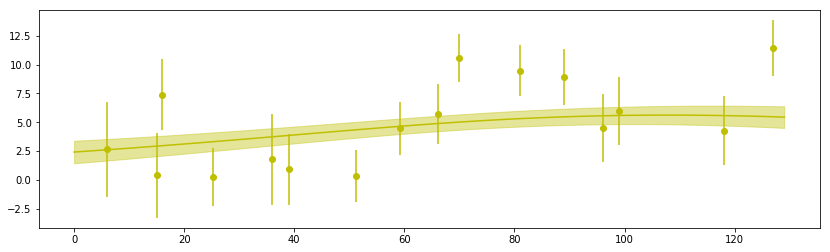

For random seed: 9


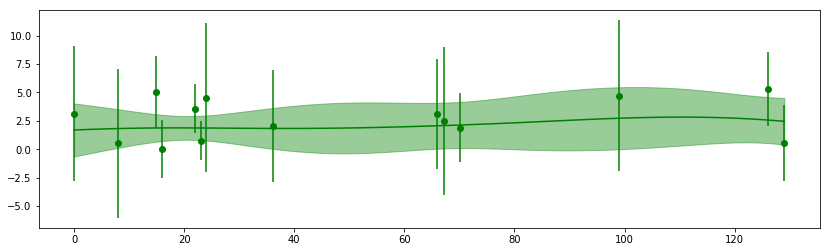

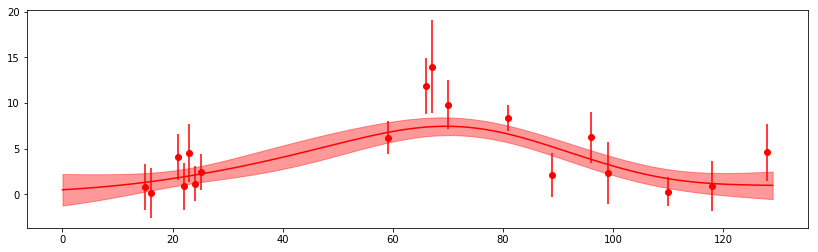

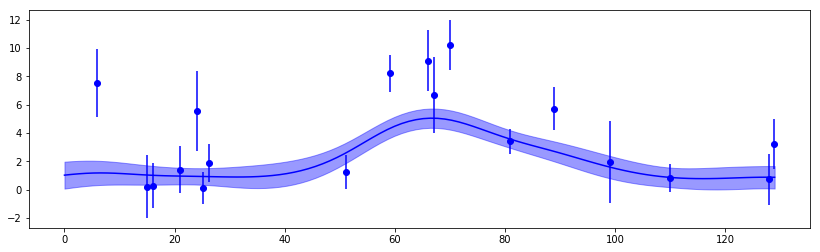

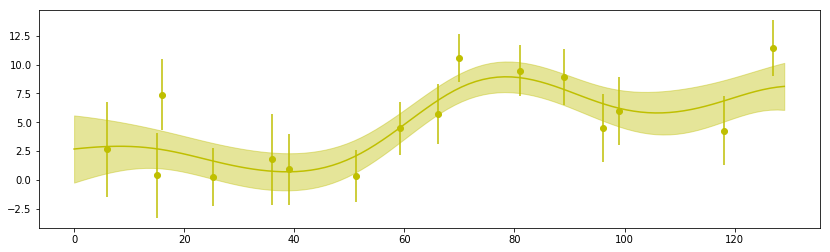

In [77]:
#with error treatment percentage, array mode
# SN000858 
dfs, t = get_df(files[8199])
t = t.reshape(len(t),1)

x,y,yerr = [[],[],[],[]],[[],[],[],[]],[[],[],[],[]]

for i, band in enumerate(filters):
    x[i], y[i], yerr[i] = get_xys(cleaning_df(dfs[band], method = 'percentage', clean_neg = True, percentage = 0.4))
    x[i] = x[i].reshape(len(x[i]),1)
    
for i in range(4,10):
    np.random.seed(i)
    print ("For random seed:", i)
    with pm.Model() as model:
        eta = pm.HalfCauchy("N", beta=2, testval=2.0)
        lengthscale = pm.Gamma("L", alpha=4, beta=0.1)
        cov = eta**2 * pm.gp.cov.Matern52(1, lengthscale)
    
        gp = pm.gp.Marginal(cov_func=cov)
        
        for j in range(len(x)):
            nome = 'y_' + str(i) + str(j)
            y_ = gp.marginal_likelihood(nome, X=x[j], y=y[j], noise=yerr[j])
        
            #mp = pm.find_MAP(include_transformed=True)
        
            mu, var = gp.predict(t, diag=True)
            fit = pd.DataFrame({"t": t.flatten(),
                            "mu_total": mu,
                            "sd_total": np.sqrt(var)})
            plot(x[j],y[j],yerr[j],fit, c = j)

#### Matern 3/2 
$$k(x, x') = \left(1 + \frac{\sqrt{3(x - x')^2}}{\ell}\right)
           \mathrm{exp}\left[ - \frac{\sqrt{3(x - x')^2}}{\ell} \right]$$
### More or less

For random seed: 4


/home/felipematheus/anaconda3/lib/python3.7/site-packages/theano/tensor/basic.py:6611: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  result[diagonal_slice] = x


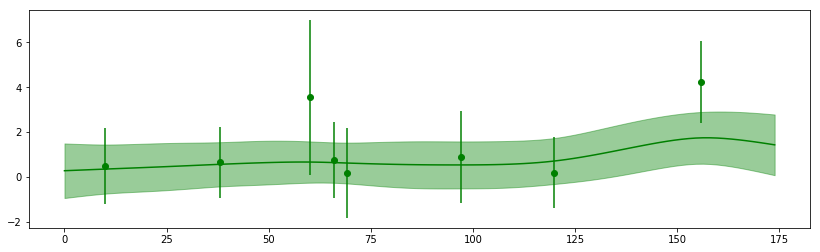

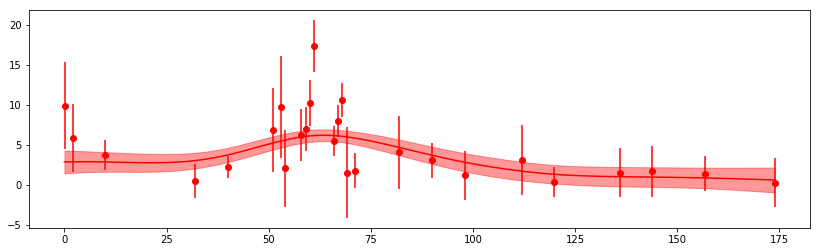

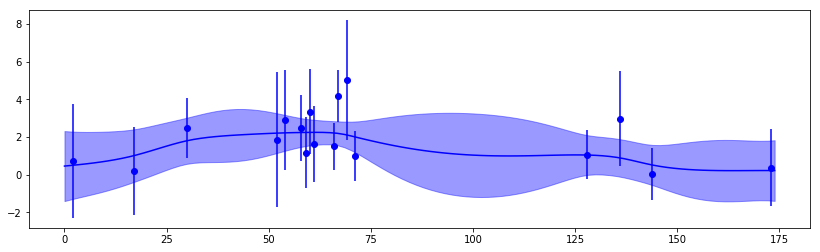

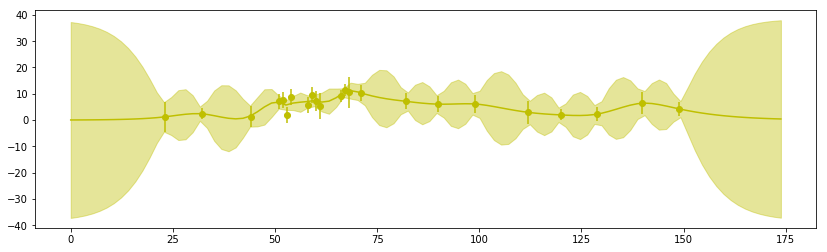

For random seed: 5


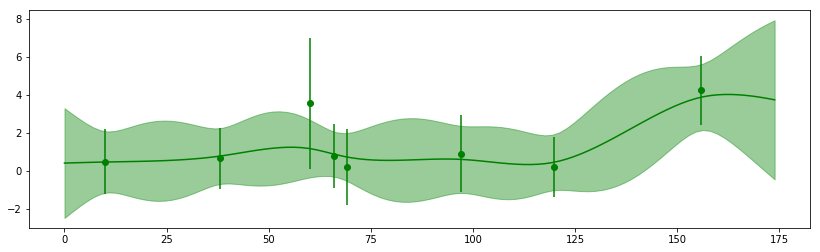

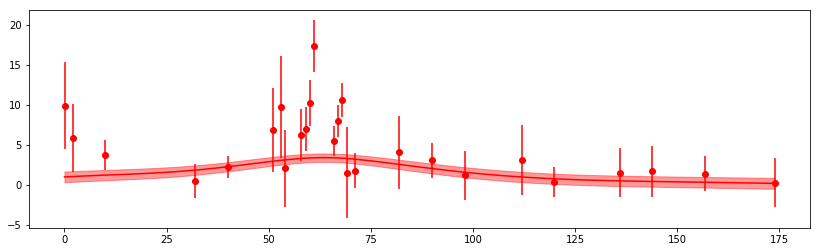

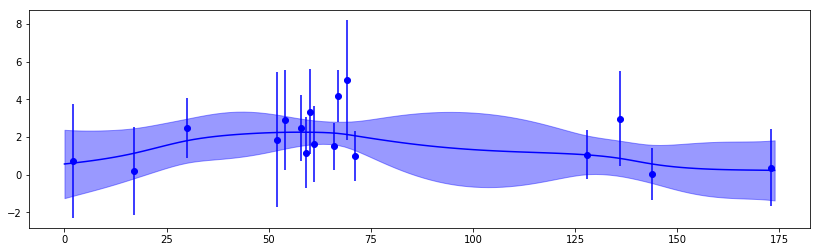

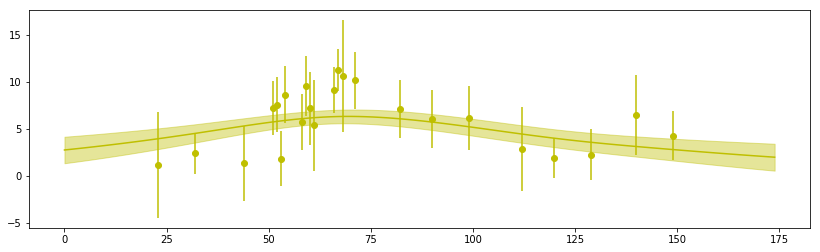

For random seed: 6


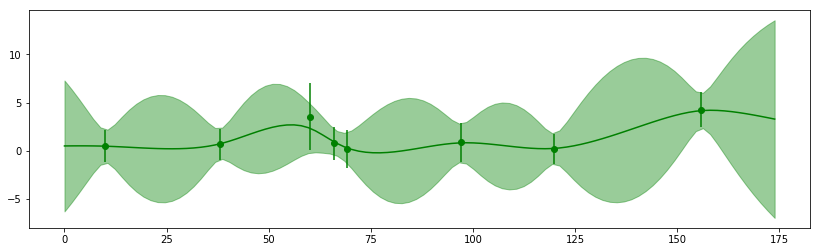

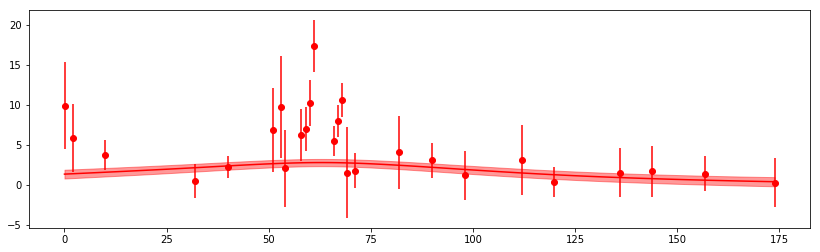

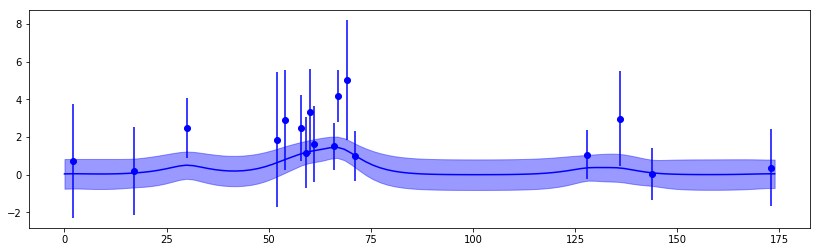

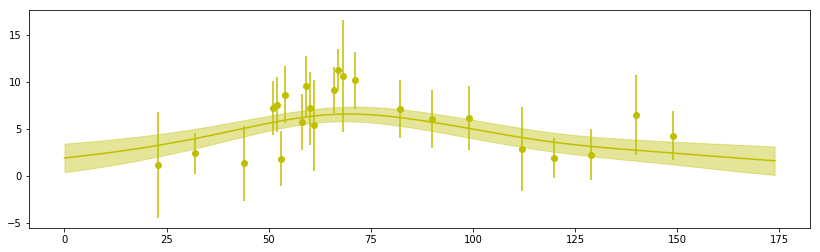

For random seed: 7


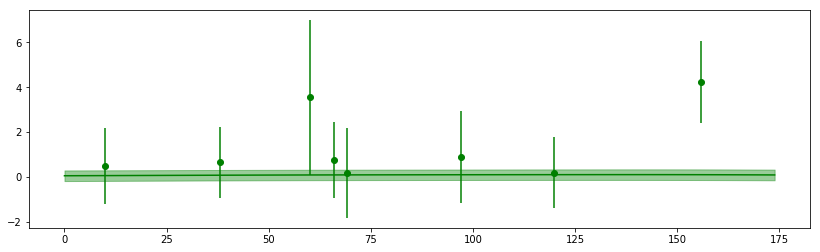

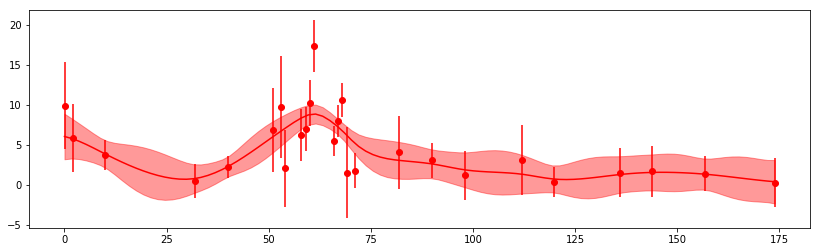

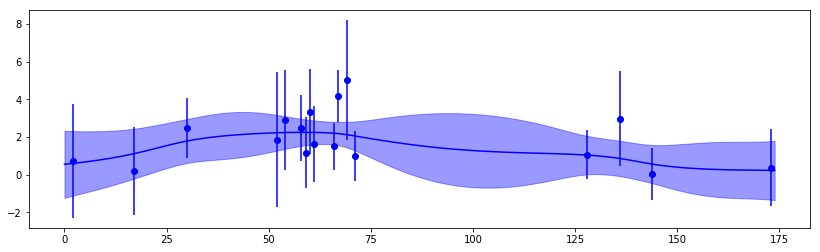

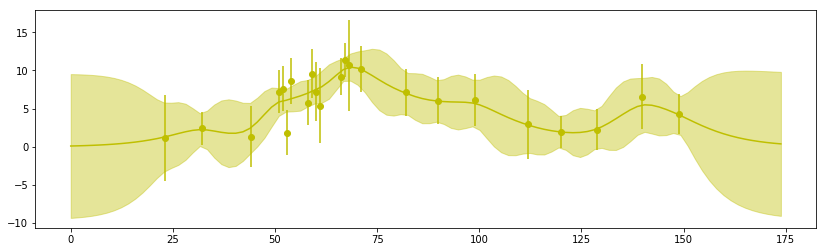

For random seed: 8


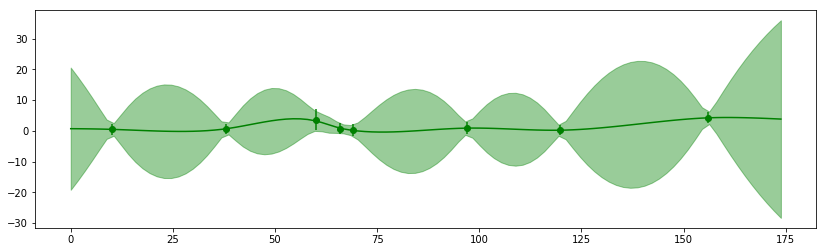

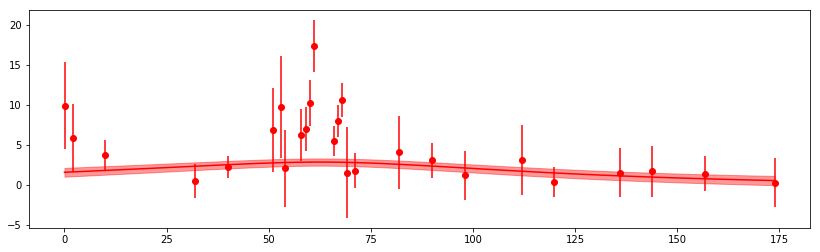

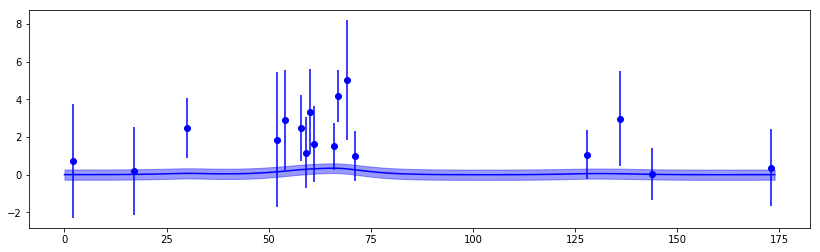

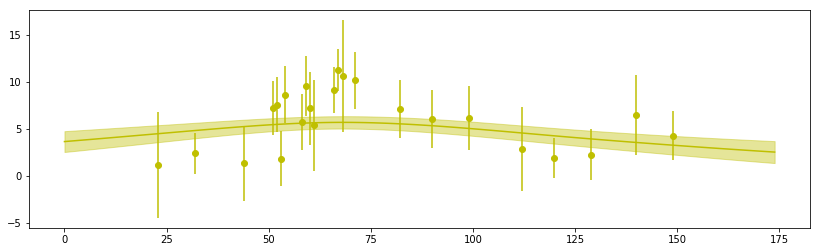

For random seed: 9


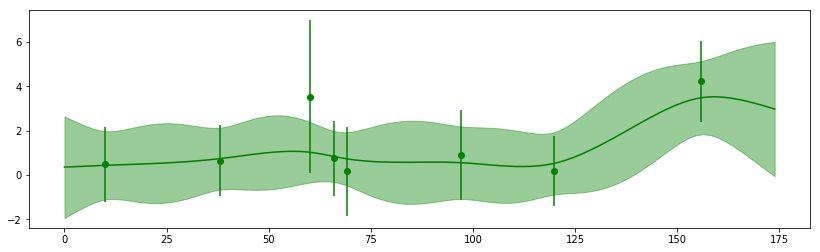

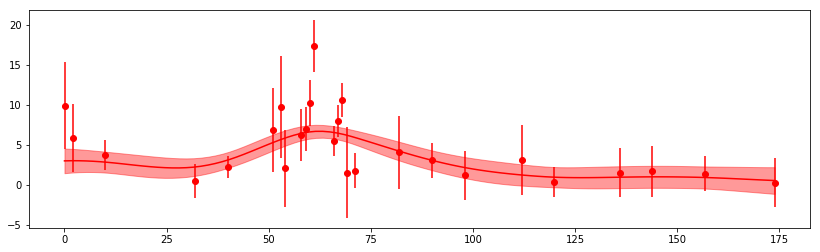

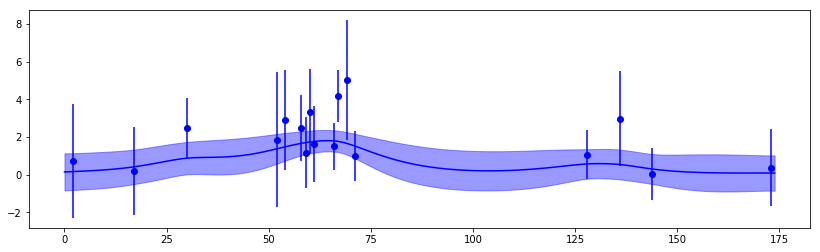

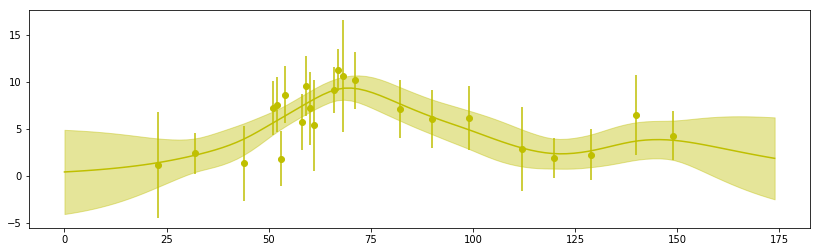

In [79]:
#with error treatment percentage, array mode
# SN001729
dfs, t = get_df(files[5398])
t = t.reshape(len(t),1)

x,y,yerr = [[],[],[],[]],[[],[],[],[]],[[],[],[],[]]

for i, band in enumerate(filters):
    x[i], y[i], yerr[i] = get_xys(cleaning_df(dfs[band], method = 'percentage', clean_neg = True, percentage = 0.4))
    x[i] = x[i].reshape(len(x[i]),1)
    
for i in range(4,10):
    np.random.seed(i)
    print ("For random seed:", i)
    with pm.Model() as model:
        eta = pm.HalfCauchy("N", beta=2, testval=2.0)
        lengthscale = pm.Gamma("L", alpha=4, beta=0.1)
        cov = eta**2 * pm.gp.cov.Matern32(1, lengthscale)
    
        gp = pm.gp.Marginal(cov_func=cov)
        
        for j in range(len(x)):
            nome = 'y_' + str(i) + str(j)
            y_ = gp.marginal_likelihood(nome, X=x[j], y=y[j], noise=yerr[j])
        
            #mp = pm.find_MAP(include_transformed=True)
        
            mu, var = gp.predict(t, diag=True)
            fit = pd.DataFrame({"t": t.flatten(),
                            "mu_total": mu,
                            "sd_total": np.sqrt(var)})
            plot(x[j],y[j],yerr[j],fit, c = j)

For random seed: 4


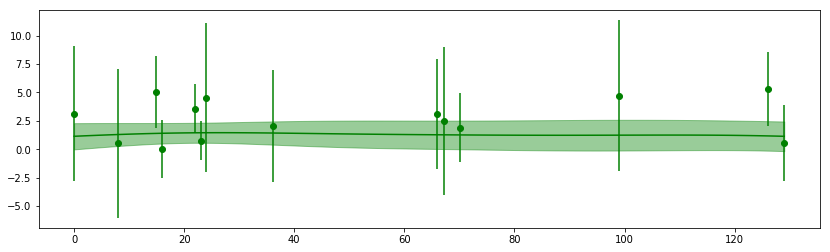

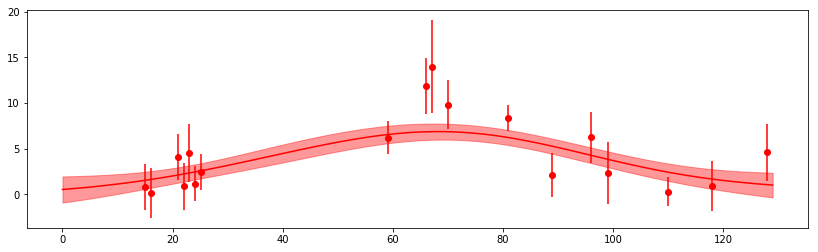

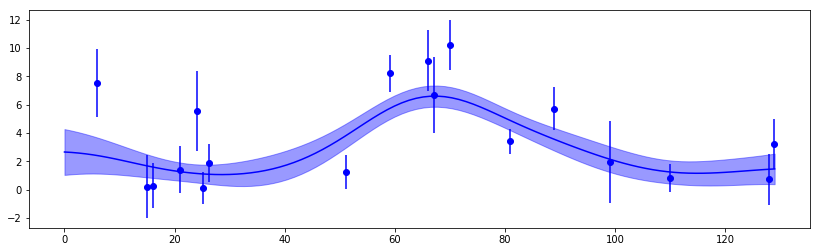

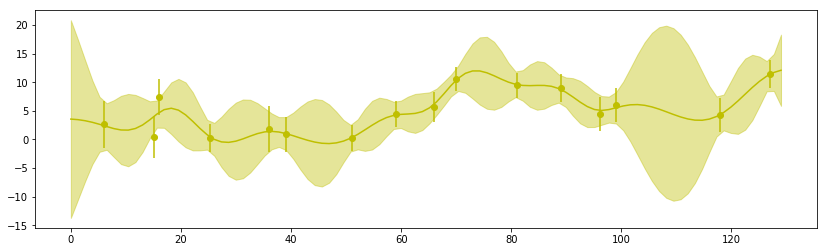

For random seed: 5


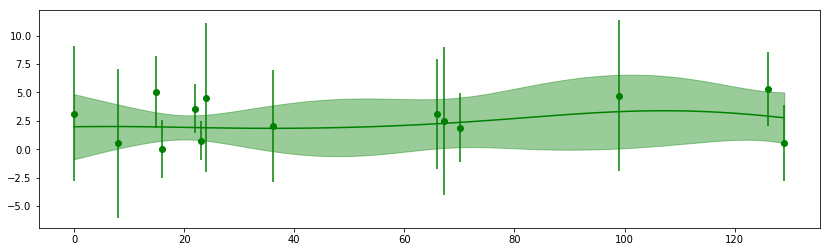

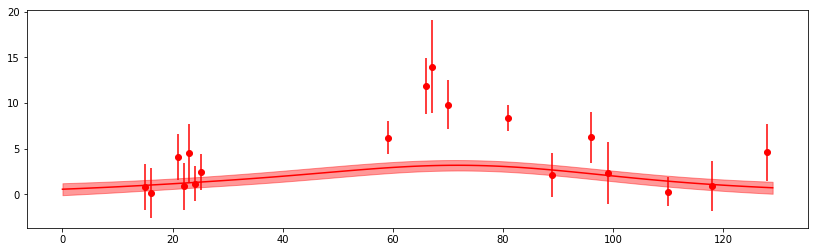

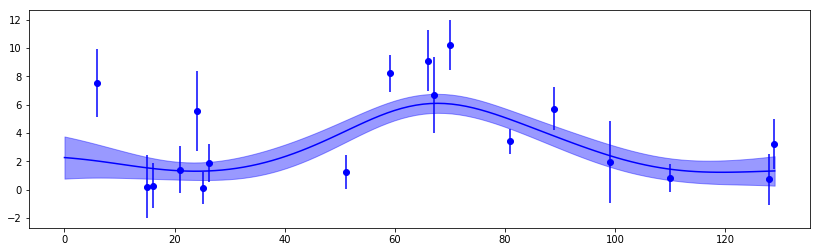

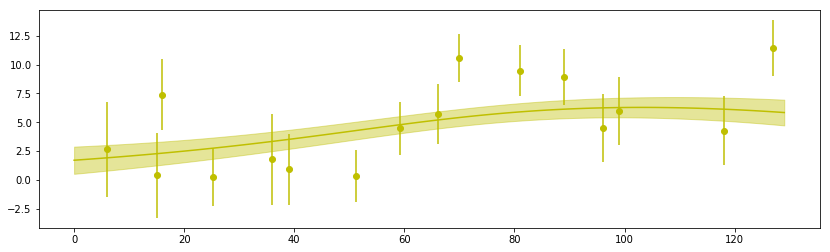

For random seed: 6


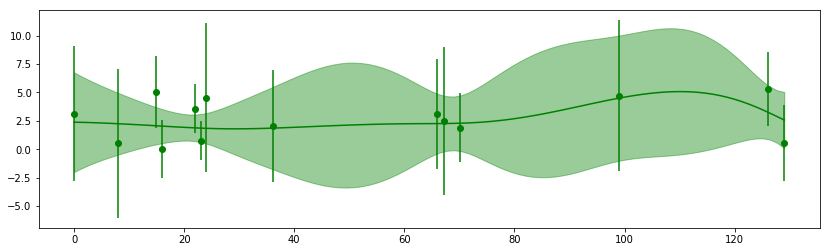

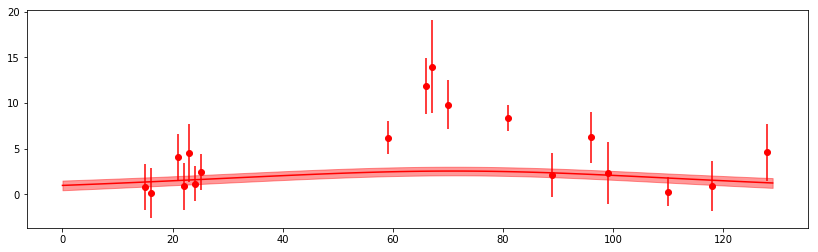

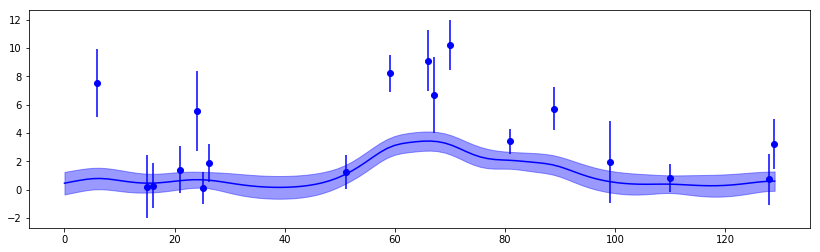

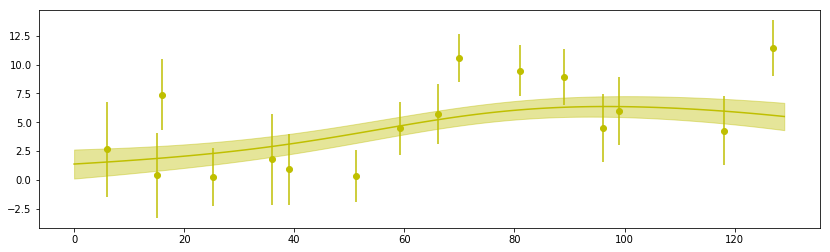

For random seed: 7


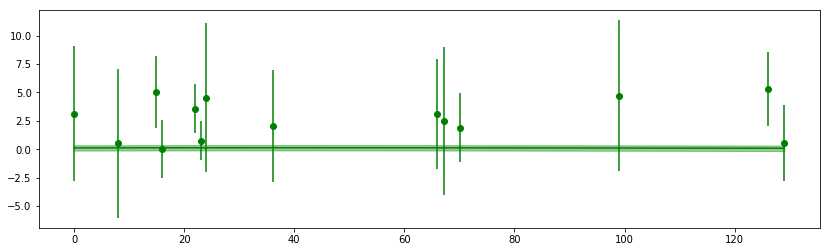

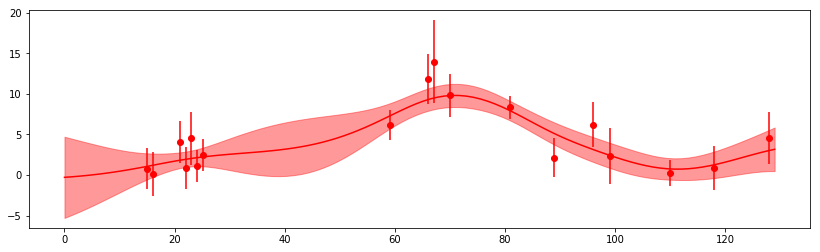

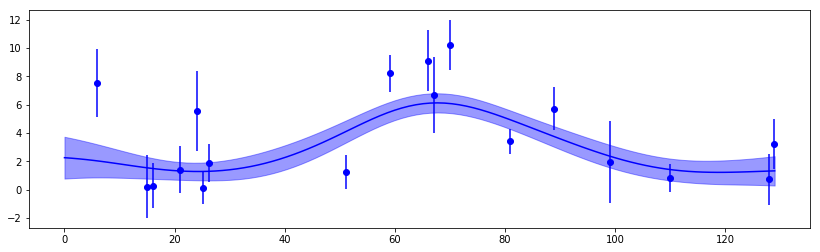

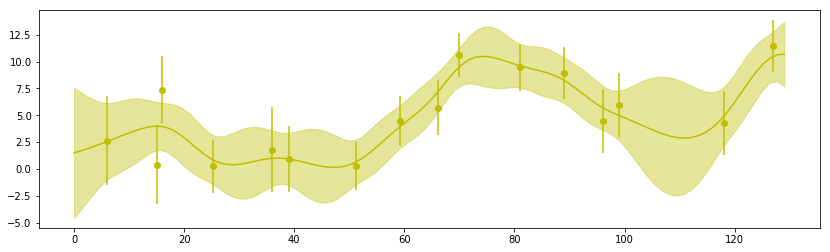

For random seed: 8


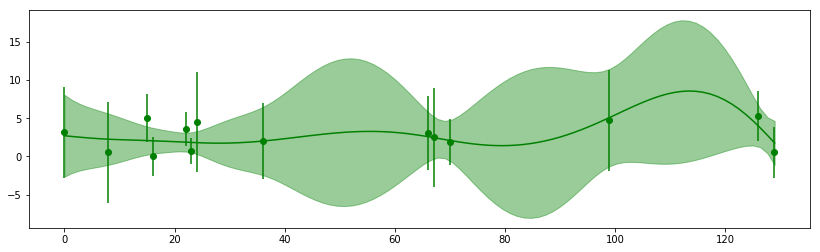

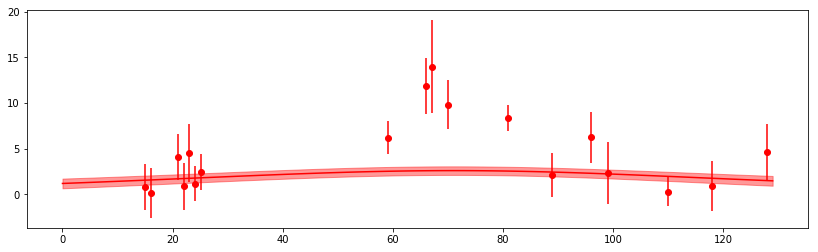

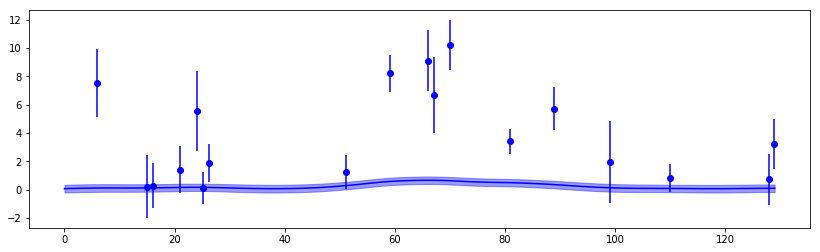

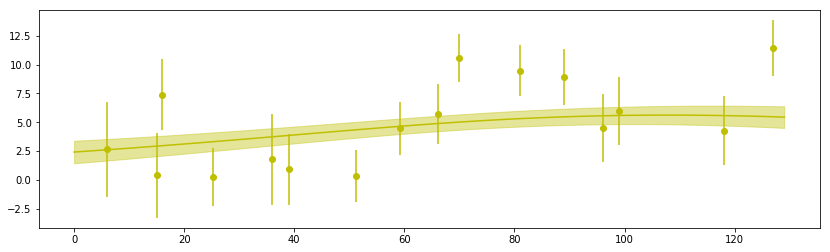

For random seed: 9


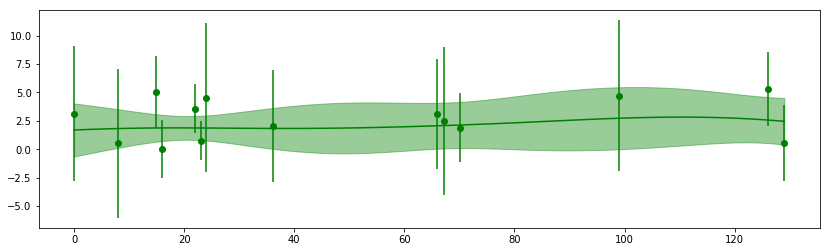

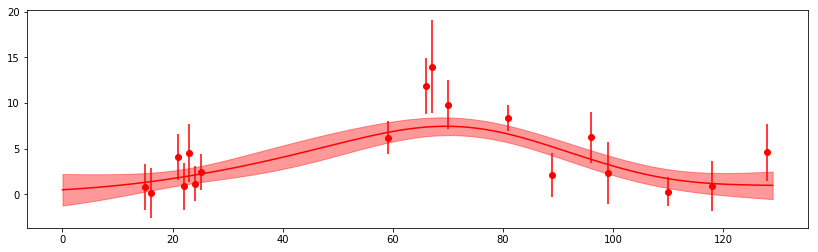

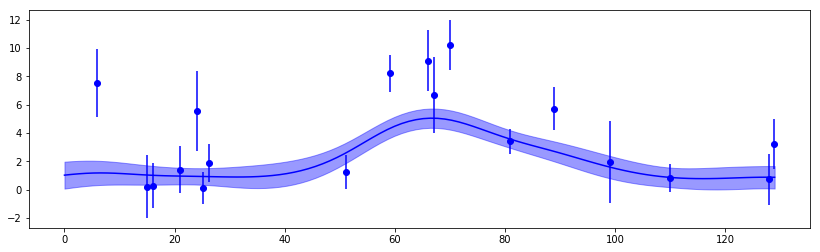

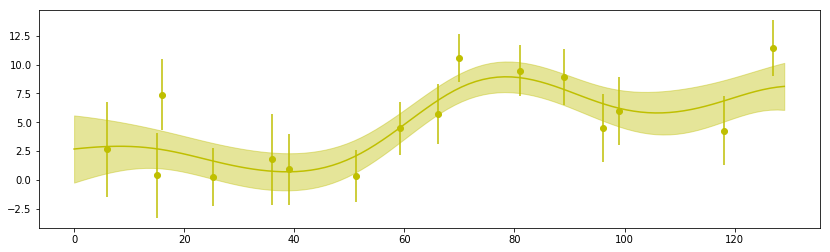

In [80]:
#with error treatment percentage, array mode
# SN000858 
dfs, t = get_df(files[8199])
t = t.reshape(len(t),1)

x,y,yerr = [[],[],[],[]],[[],[],[],[]],[[],[],[],[]]

for i, band in enumerate(filters):
    x[i], y[i], yerr[i] = get_xys(cleaning_df(dfs[band], method = 'percentage', clean_neg = True, percentage = 0.4))
    x[i] = x[i].reshape(len(x[i]),1)
    
for i in range(4,10):
    np.random.seed(i)
    print ("For random seed:", i)
    with pm.Model() as model:
        eta = pm.HalfCauchy("N", beta=2, testval=2.0)
        lengthscale = pm.Gamma("L", alpha=4, beta=0.1)
        cov = eta**2 * pm.gp.cov.Matern52(1, lengthscale)
    
        gp = pm.gp.Marginal(cov_func=cov)
        
        for j in range(len(x)):
            nome = 'y_' + str(i) + str(j)
            y_ = gp.marginal_likelihood(nome, X=x[j], y=y[j], noise=yerr[j])
        
            #mp = pm.find_MAP(include_transformed=True)
        
            mu, var = gp.predict(t, diag=True)
            fit = pd.DataFrame({"t": t.flatten(),
                            "mu_total": mu,
                            "sd_total": np.sqrt(var)})
            plot(x[j],y[j],yerr[j],fit, c = j)

# The two best seeds chosen were 4 and 9, and Covariance functions were the Mattern5/2 and Mattern3/2
## Below there are just some more comparisons 

# ------------------

## Another seed review
## Evaluating the eleven seeds, using 'desg' filter over object 'SN013742'

For random seed: 0


logp = -73.988, ||grad|| = 10.726: 100%|██████████| 10/10 [00:00<00:00, 791.42it/s]


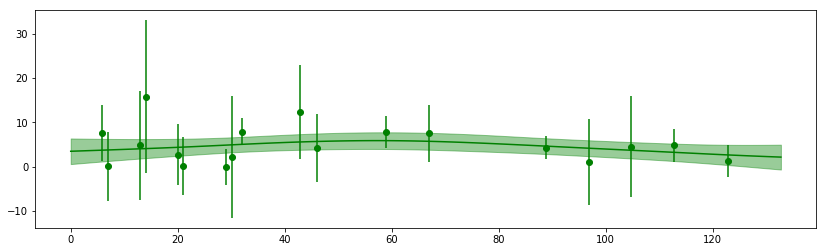

For random seed: 1


logp = -73.988, ||grad|| = 10.726: 100%|██████████| 10/10 [00:00<00:00, 327.74it/s]


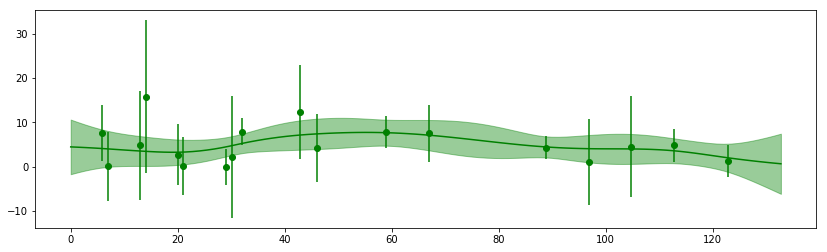

For random seed: 2


logp = -73.988, ||grad|| = 10.726: 100%|██████████| 10/10 [00:00<00:00, 768.75it/s]


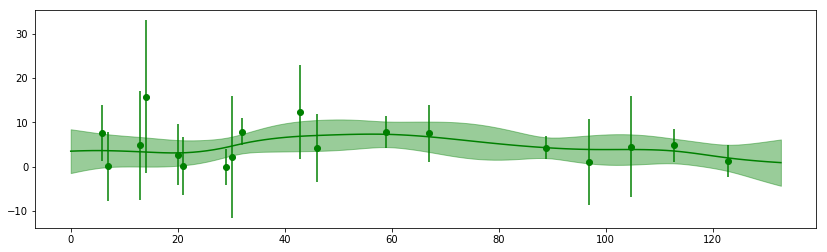

For random seed: 3


logp = -73.988, ||grad|| = 10.726: 100%|██████████| 10/10 [00:00<00:00, 430.27it/s]


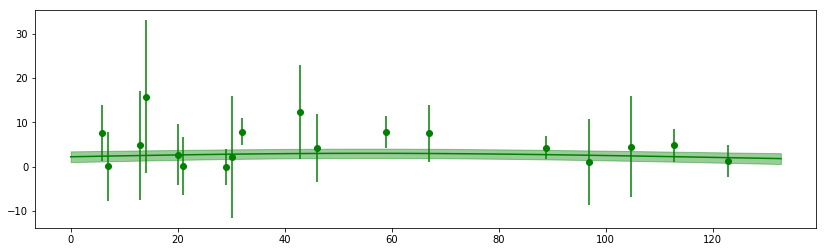

For random seed: 4


logp = -73.988, ||grad|| = 10.726: 100%|██████████| 10/10 [00:00<00:00, 584.93it/s]


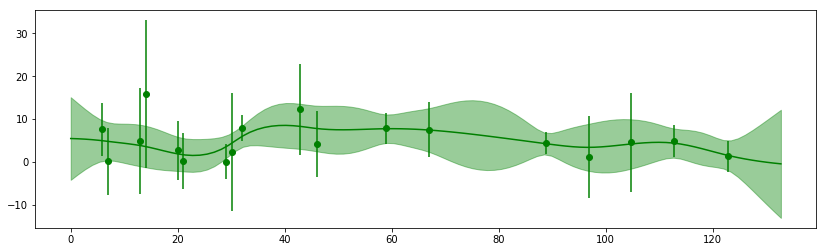

For random seed: 5


logp = -73.988, ||grad|| = 10.726: 100%|██████████| 10/10 [00:00<00:00, 284.61it/s]


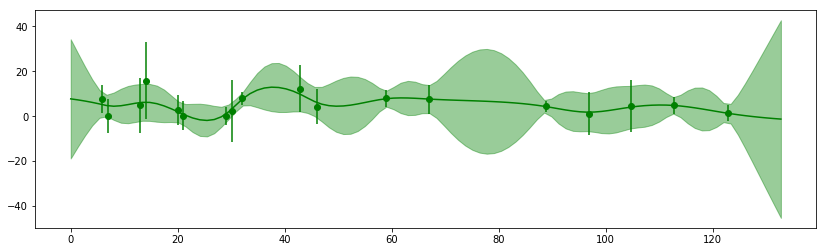

For random seed: 6


logp = -73.988, ||grad|| = 10.726: 100%|██████████| 10/10 [00:00<00:00, 365.00it/s]


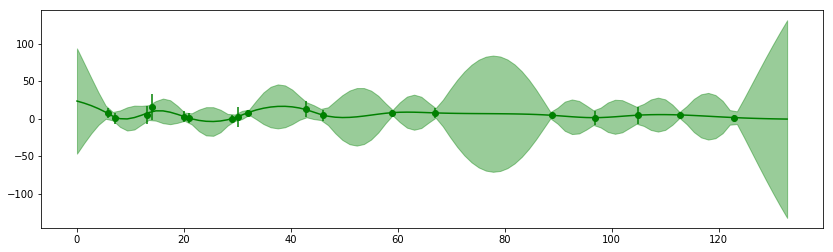

For random seed: 7


logp = -73.988, ||grad|| = 10.726: 100%|██████████| 10/10 [00:00<00:00, 594.60it/s]


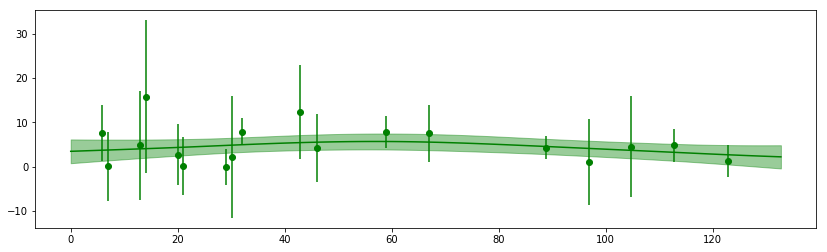

For random seed: 8


logp = -73.988, ||grad|| = 10.726: 100%|██████████| 10/10 [00:00<00:00, 292.90it/s]


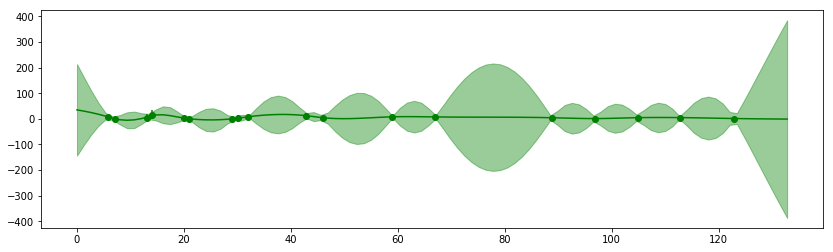

For random seed: 9


logp = -73.988, ||grad|| = 10.726: 100%|██████████| 10/10 [00:00<00:00, 255.03it/s]


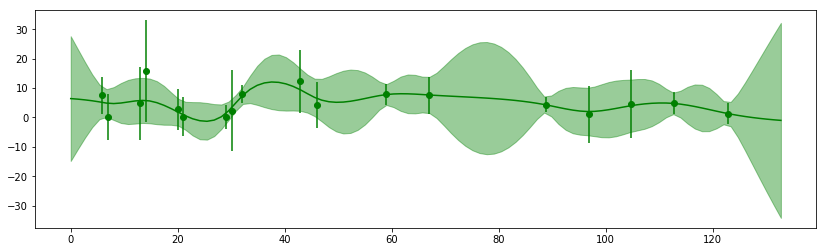

For random seed: 10


logp = -73.988, ||grad|| = 10.726: 100%|██████████| 10/10 [00:00<00:00, 266.58it/s]


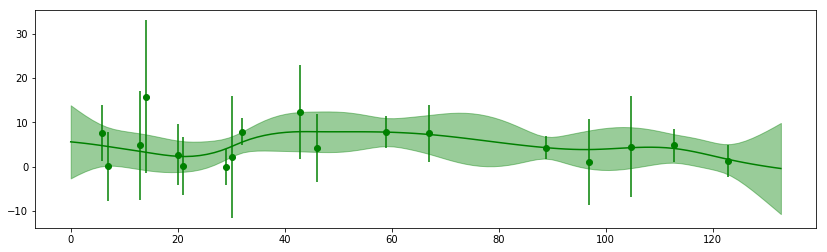

In [21]:
#Without error treatment
# SN013742

dfs, t = get_df(files[4044])
t = t.reshape(len(t),1)

x, y, yerr = get_xys(dfs['desg'])
x = x.reshape(len(x),1)


for i in range(11):
    np.random.seed(i)
    print ("For random seed:", i)
    with pm.Model() as model:
        eta = pm.HalfCauchy("eta", beta=2, testval=2.0)
        lengthscale = pm.Gamma("lenght", alpha=4, beta=0.1)
        cov = 500*eta**2 * pm.gp.cov.Matern32(1, lengthscale)        

        gp = pm.gp.Marginal(cov_func=cov)

        y_ = gp.marginal_likelihood("y", X=x, y=y, noise=yerr)

        mp = pm.find_MAP(include_transformed=True)

        mu, var = gp.predict(t,  diag=True)
        fit = pd.DataFrame({"t": t.flatten(),
                        "mu_total": mu,
                        "sd_total": np.sqrt(var)})
    plot(x,y,yerr,fit)

### Changing the coefficient multiplying the cov

For random seed: 0


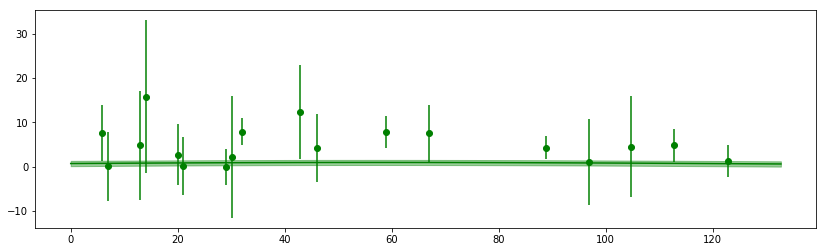

For random seed: 1


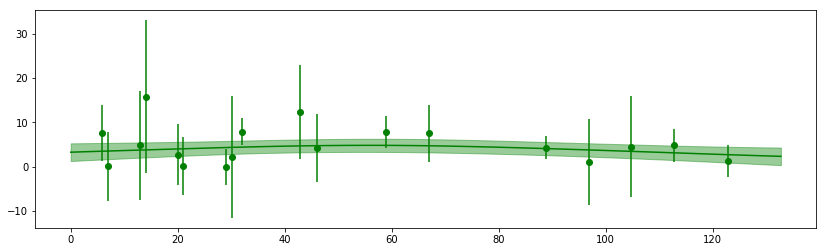

For random seed: 2


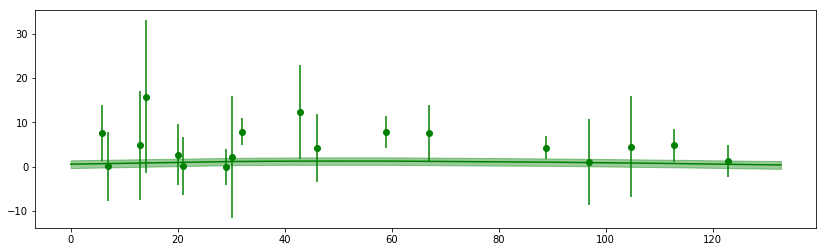

For random seed: 3


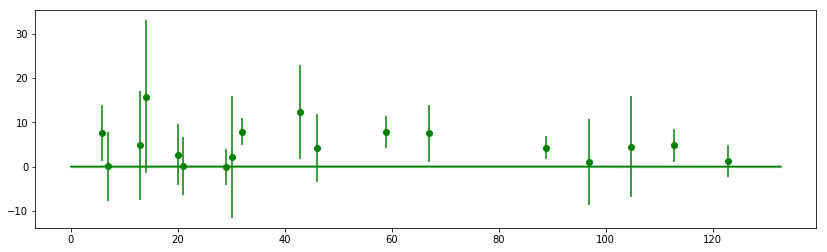

For random seed: 4


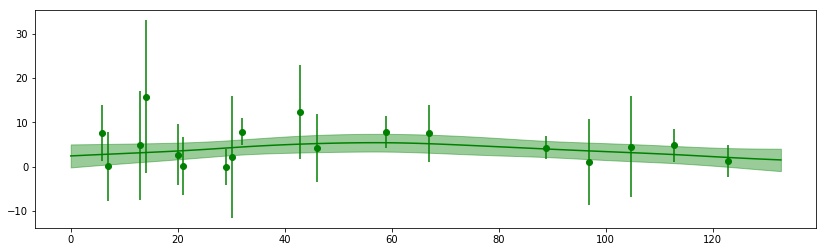

For random seed: 5


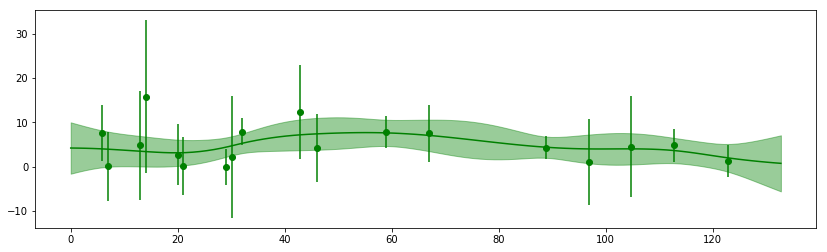

For random seed: 6


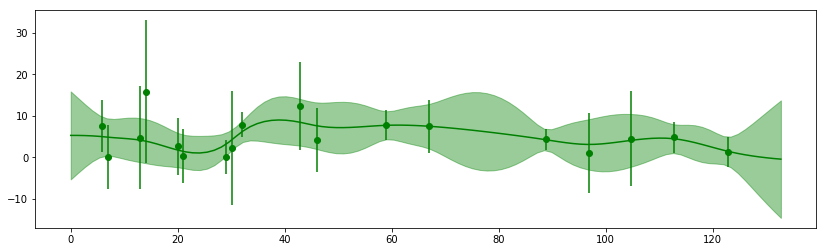

For random seed: 7


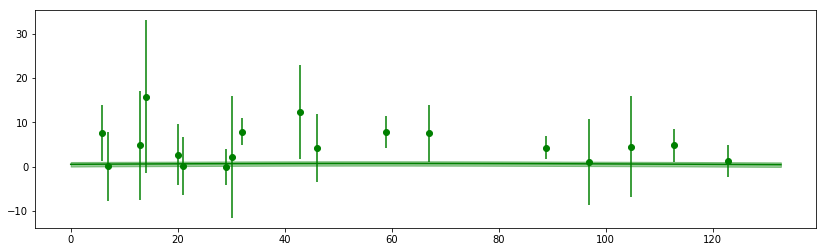

For random seed: 8


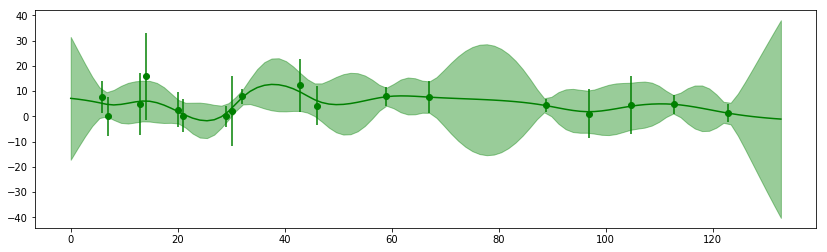

For random seed: 9


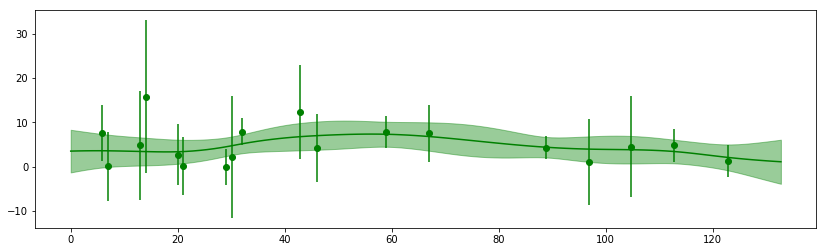

For random seed: 10


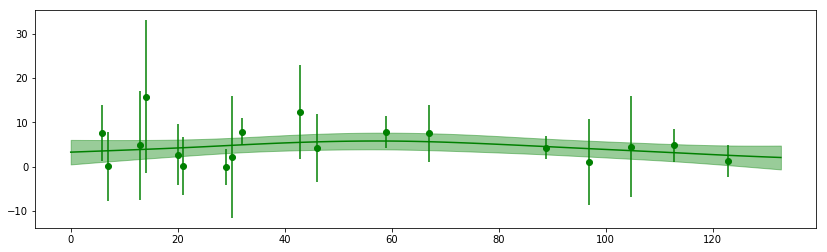

In [22]:
for i in range(11):
    np.random.seed(i)
    print ("For random seed:", i)
    with pm.Model() as model:
        eta = pm.HalfCauchy("N", beta=2, testval=2.0)
        lengthscale = pm.Gamma("L", alpha=4, beta=0.1)
        cov = 5*eta**2 * pm.gp.cov.Matern32(1, lengthscale)        
    
        gp = pm.gp.Marginal(cov_func=cov)
        
        y_ = gp.marginal_likelihood("y", X=x, y=y, noise=yerr)
        
        #mp = pm.find_MAP(include_transformed=True)
        
        mu, var = gp.predict(t, diag=True)
        fit = pd.DataFrame({"t": t.flatten(),
                        "mu_total": mu,
                        "sd_total": np.sqrt(var)})
    plot(x,y,yerr,fit)

# ---------------

## Evaluating the two error treatments
### With the eleven seeds  
### With error treatment percentage

In [ ]:
dfs, t = get_df(files[8199])
t = t.reshape(len(t),1)

x,y,yerr = [[],[],[],[]],[[],[],[],[]],[[],[],[],[]]

for i, band in enumerate(filters):
    x[i], y[i], yerr[i] = get_xys(cleaning_df(dfs[band], method = 'percentage', clean_neg = True, percentage = 0.4))
    x[i] = x[i].reshape(len(x[i]),1)

For random seed: 0


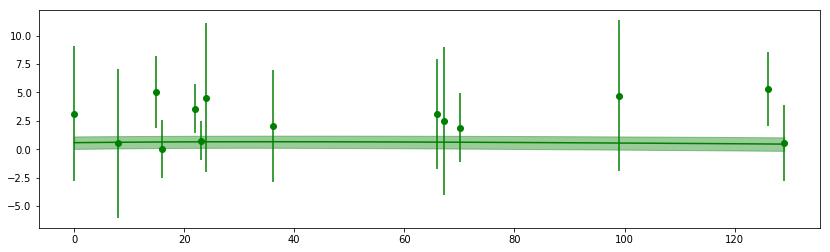

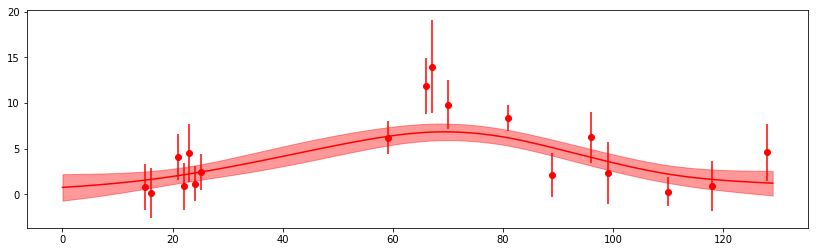

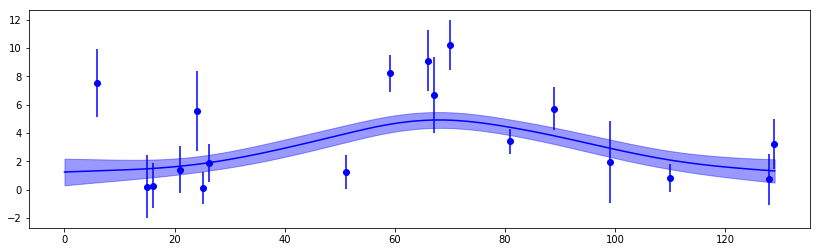

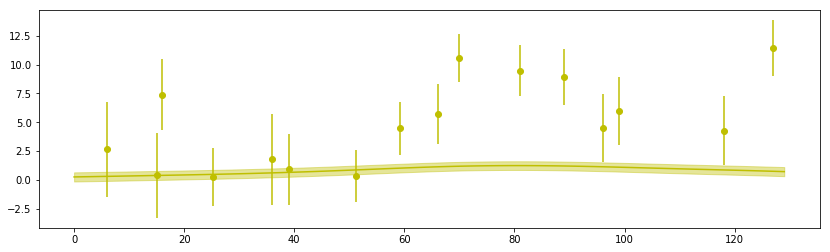

For random seed: 1


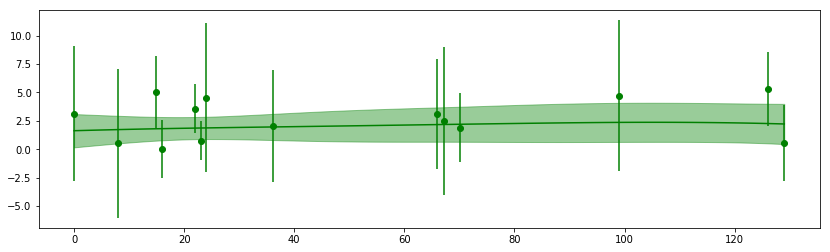

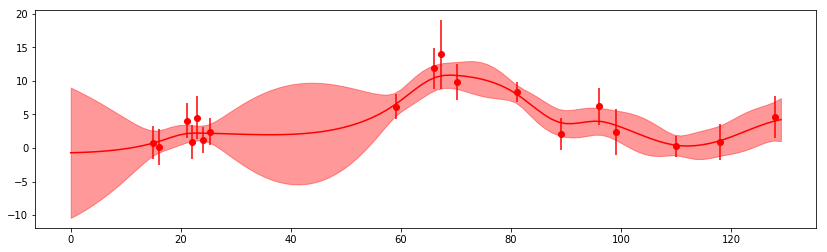

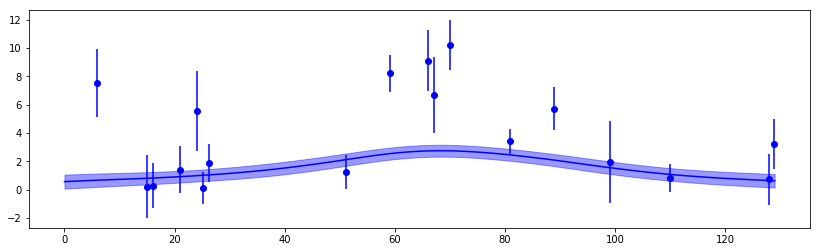

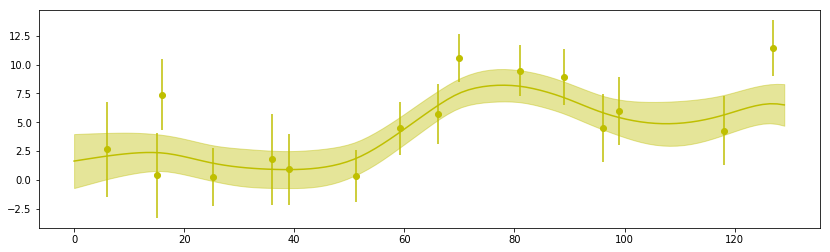

For random seed: 2


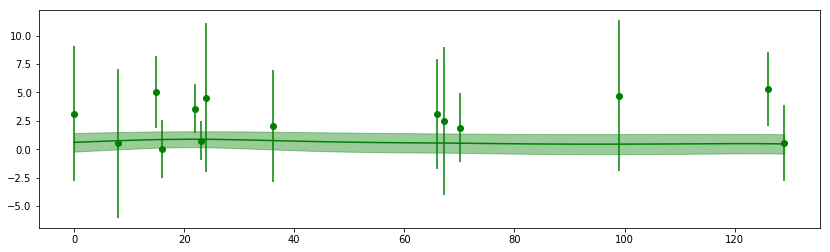

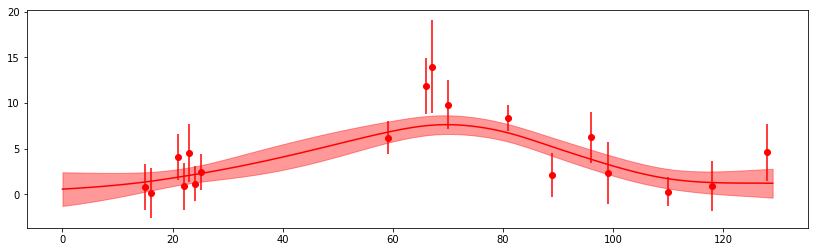

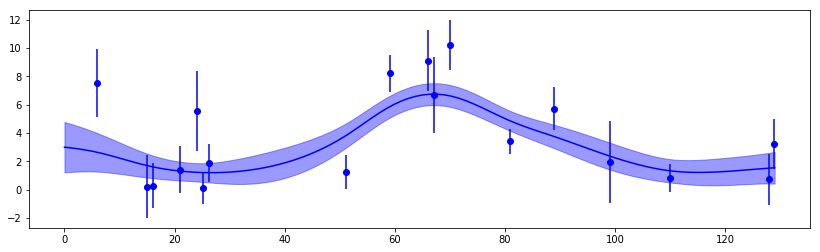

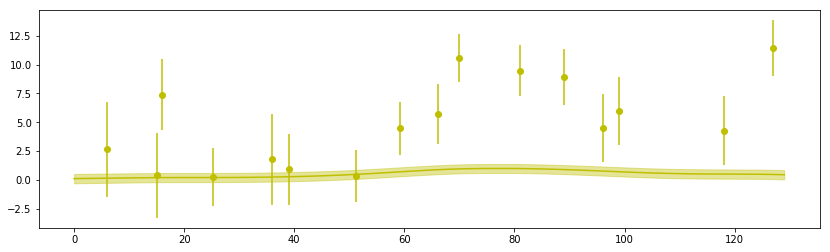

For random seed: 3


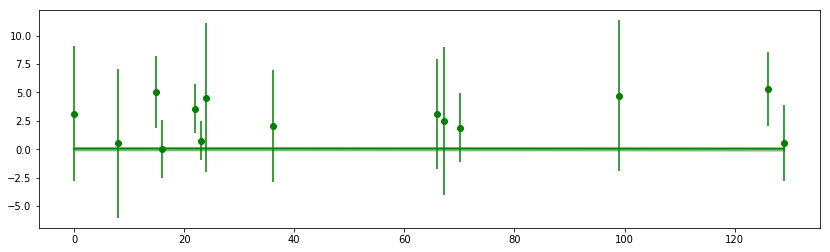

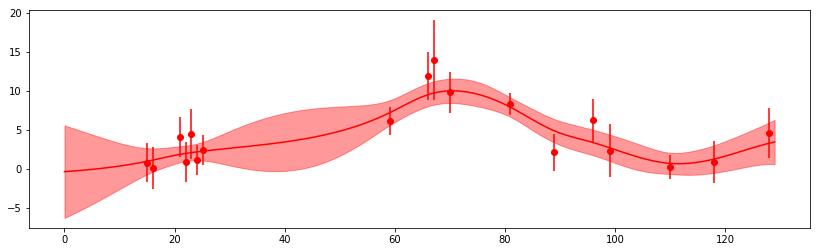

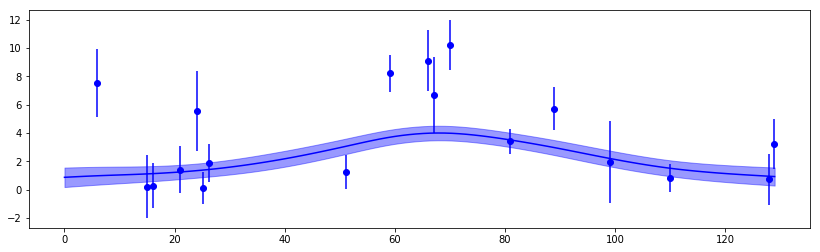

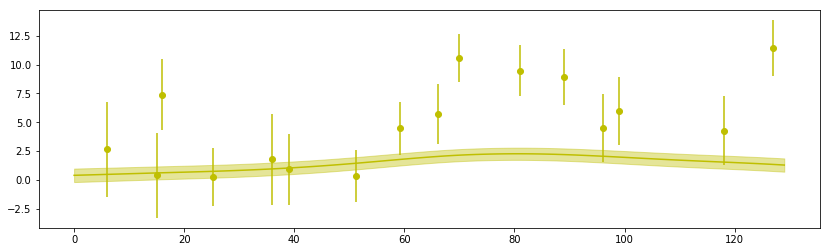

For random seed: 4


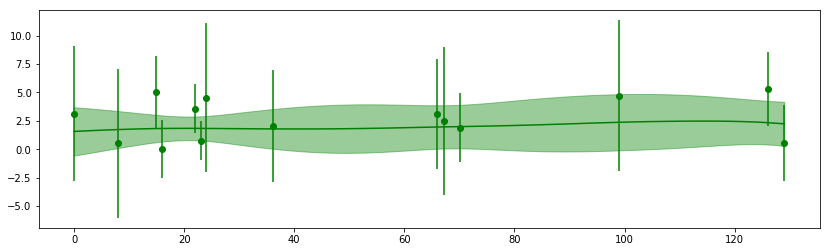

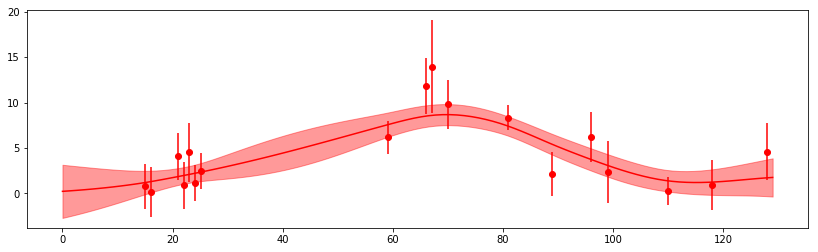

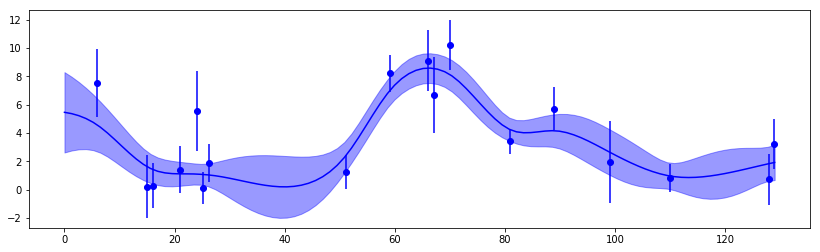

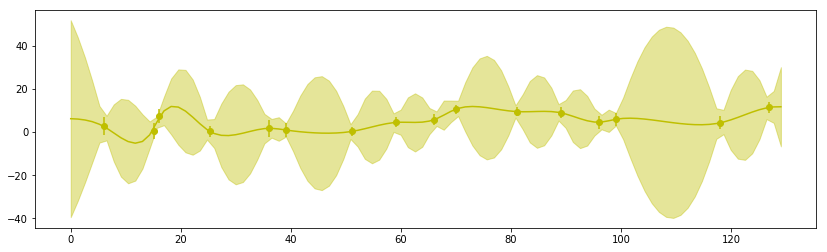

For random seed: 5


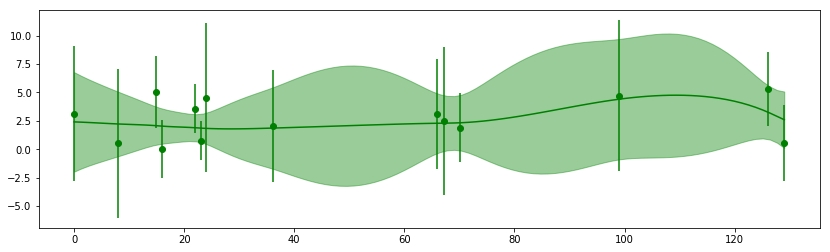

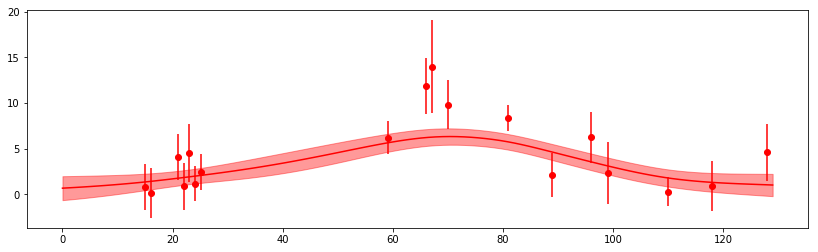

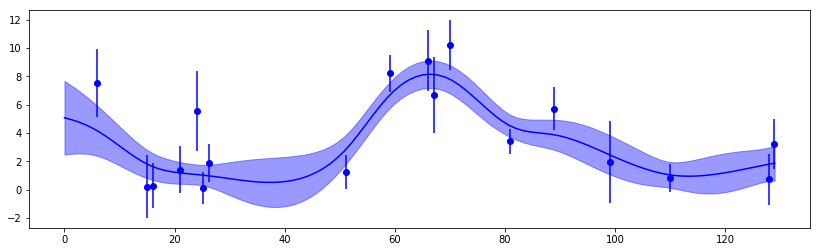

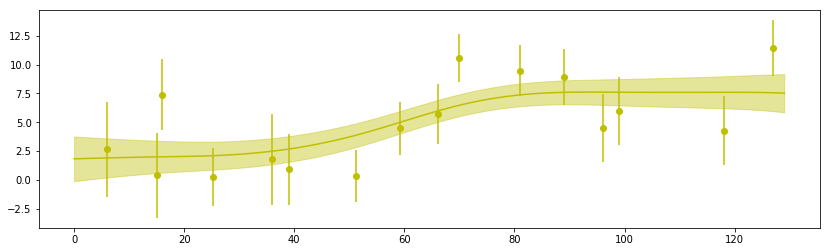

For random seed: 6


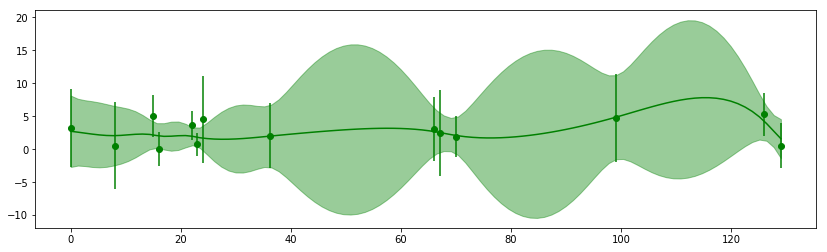

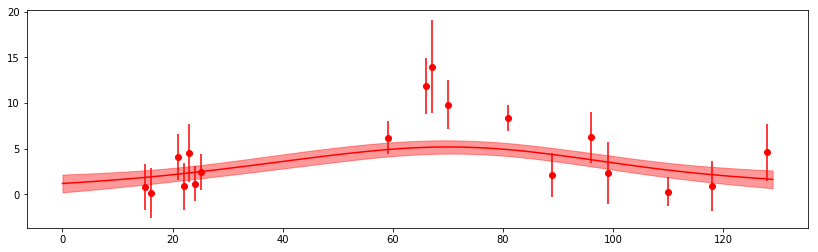

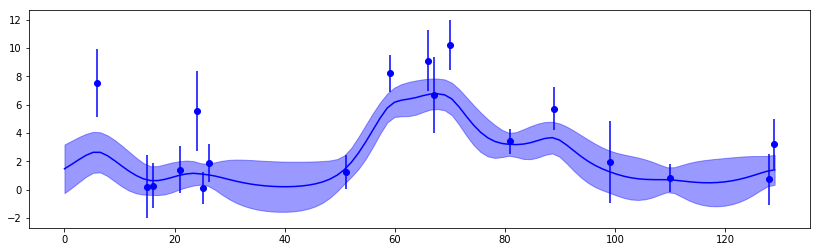

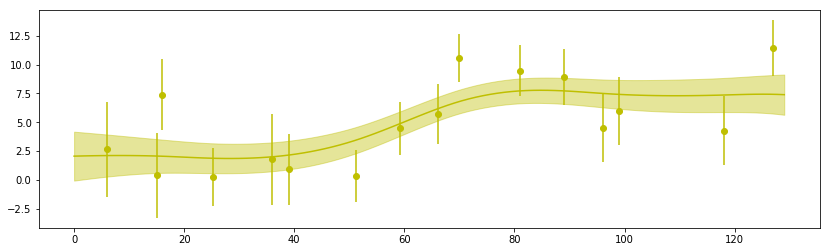

For random seed: 7


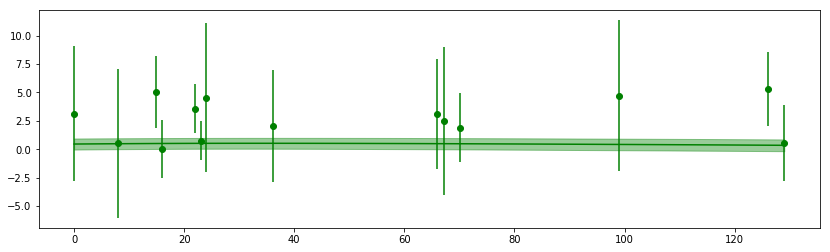

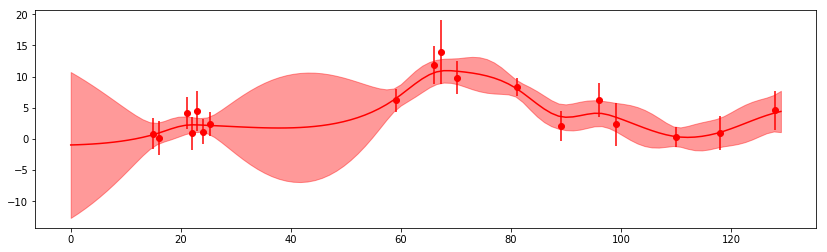

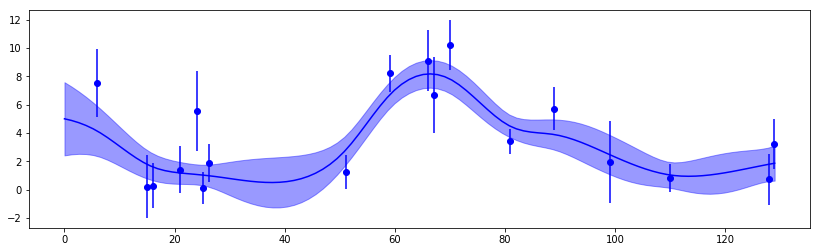

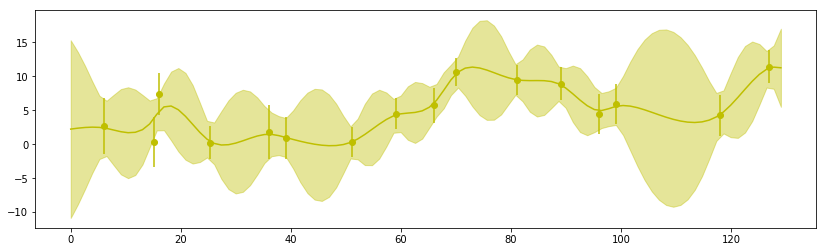

For random seed: 8


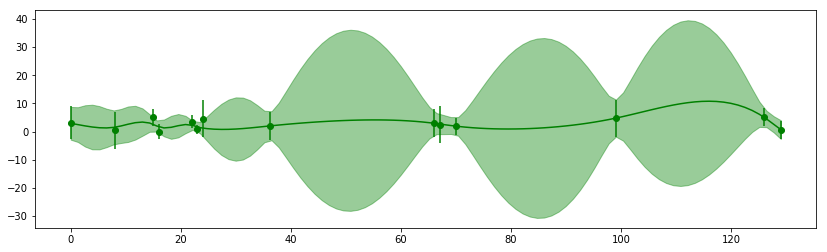

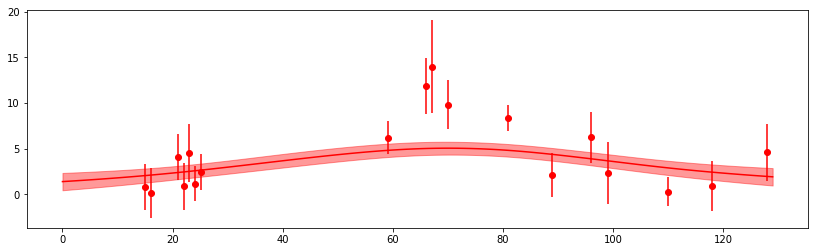

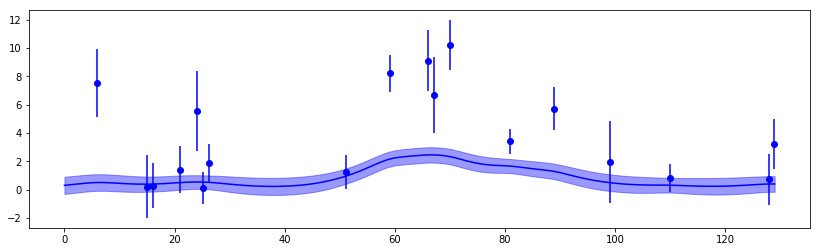

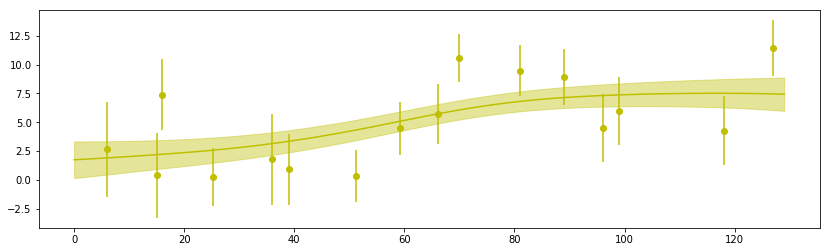

For random seed: 9


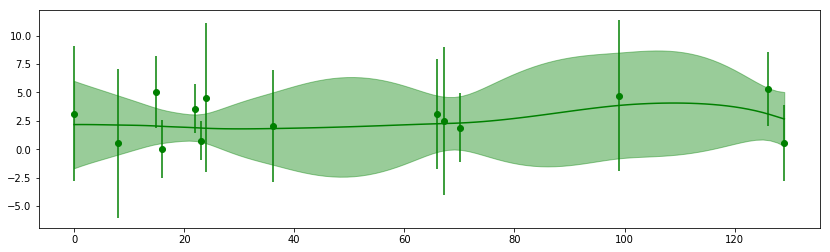

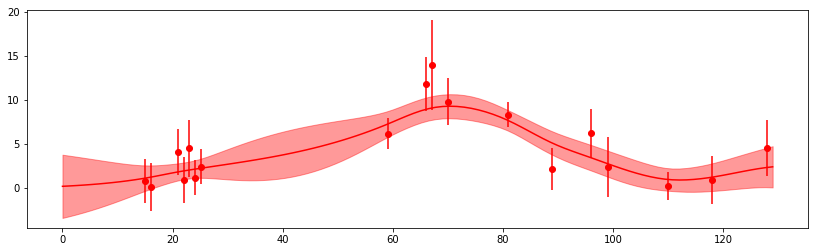

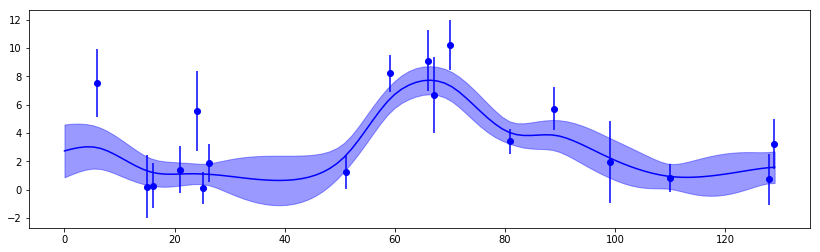

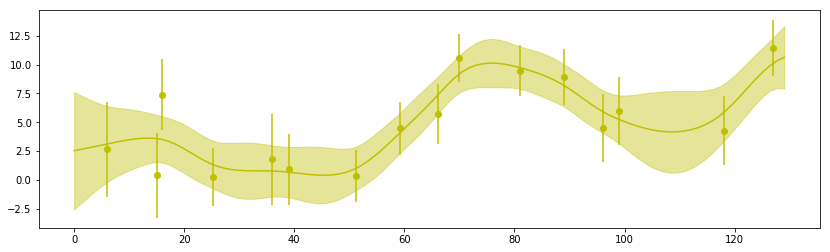

For random seed: 10


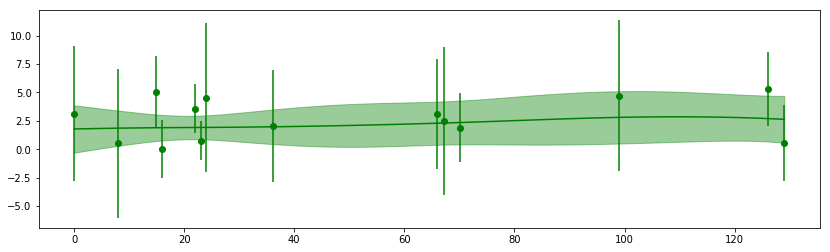

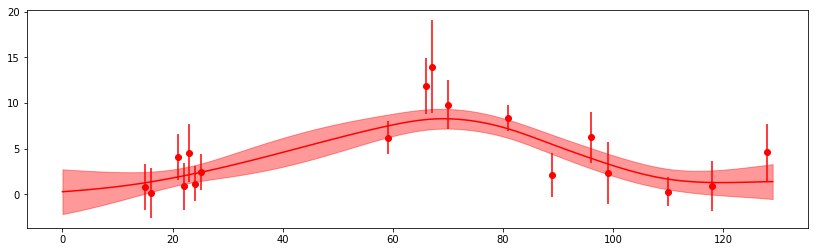

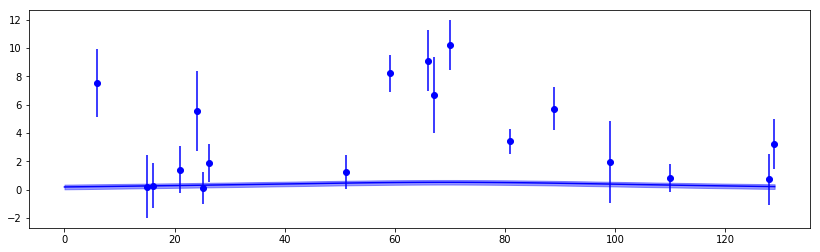

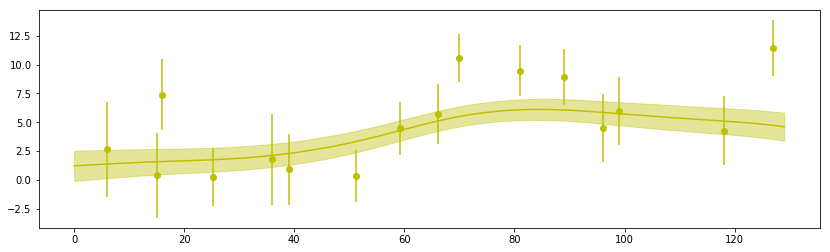

In [45]:
for i in range(11):
    np.random.seed(i)
    print ("For random seed:", i)
    with pm.Model() as model:
        eta = pm.HalfCauchy("N", beta=2, testval=2.0)
        lengthscale = pm.Gamma("L", alpha=4, beta=0.1)
        cov = 5*eta**2 * pm.gp.cov.Matern32(1, lengthscale)        
    
        gp = pm.gp.Marginal(cov_func=cov)
        
        for j in range(len(x)):
            nome = 'y_' + str(i) + str(j)
            y_ = gp.marginal_likelihood(nome, X=x[j], y=y[j], noise=yerr[j])
        
            #mp = pm.find_MAP(include_transformed=True)
        
            mu, var = gp.predict(t, diag=True)
            fit = pd.DataFrame({"t": t.flatten(),
                            "mu_total": mu,
                            "sd_total": np.sqrt(var)})
            plot(x[j],y[j],yerr[j],fit, c = j)

### With error treatment standard deviation

In [ ]:
dfs, t = get_df(files[8199])
# SN000858

t = t.reshape(len(t),1)

x,y,yerr = [[],[],[],[]],[[],[],[],[]],[[],[],[],[]]

for i, band in enumerate(filters):
    x[i], y[i], yerr[i] = get_xys(cleaning_df(dfs[band], method = 'std_dev', clean_neg = True, percentage = 0.4))
    x[i] = x[i].reshape(len(x[i]),1)

For random seed: 0


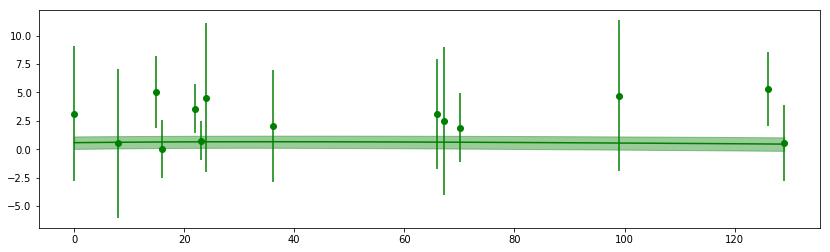

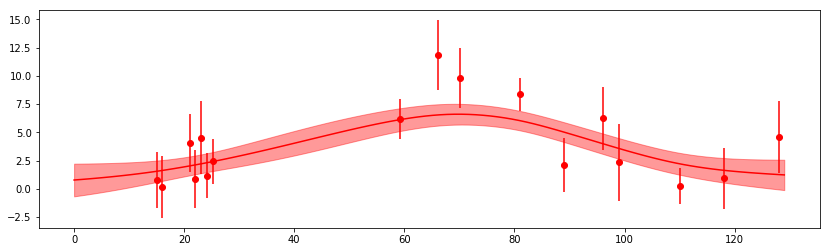

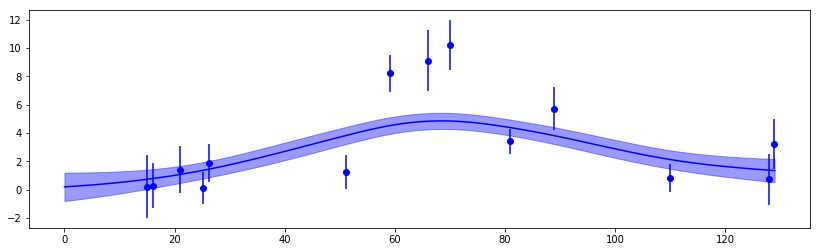

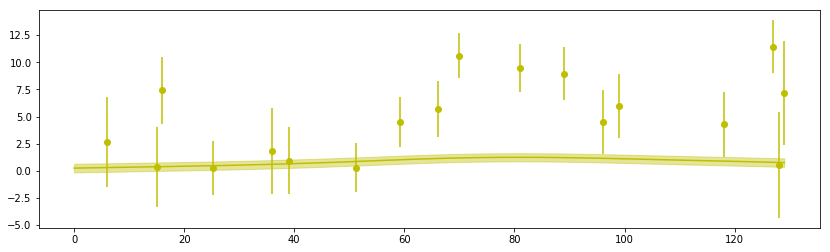

For random seed: 1


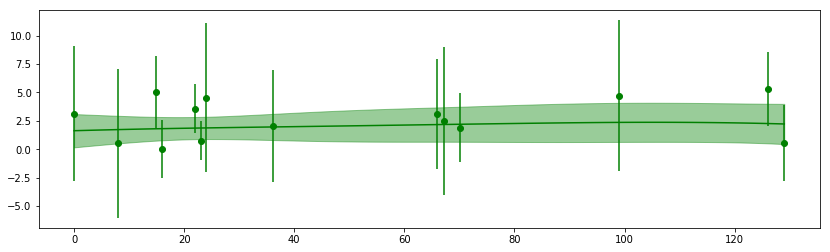

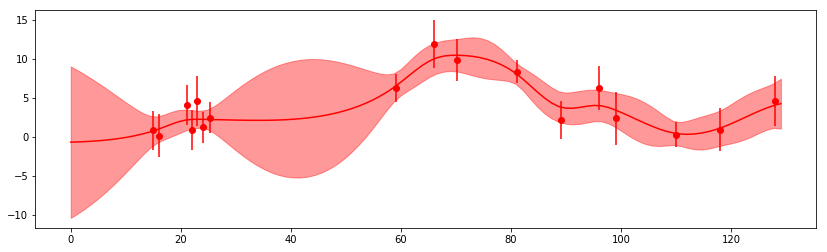

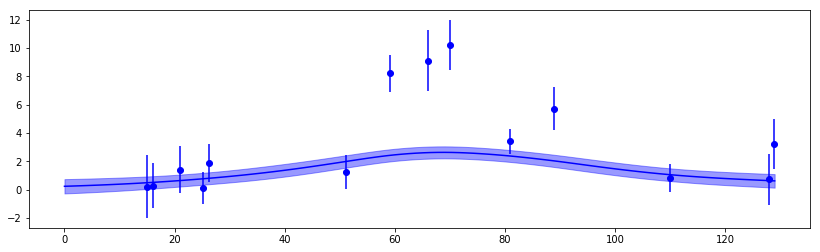

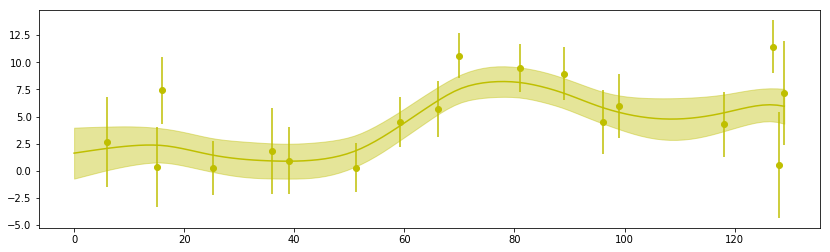

For random seed: 2


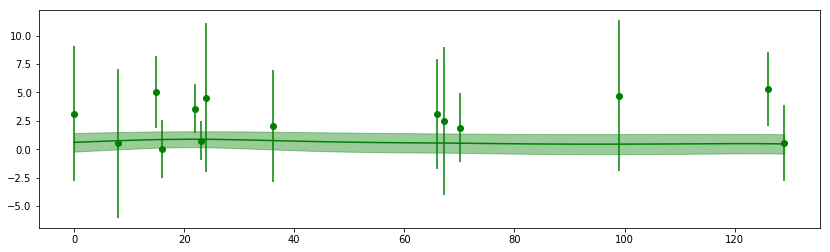

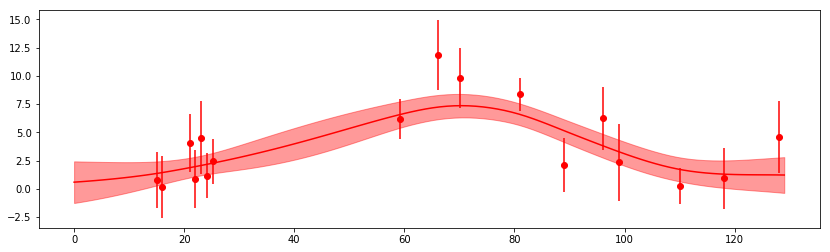

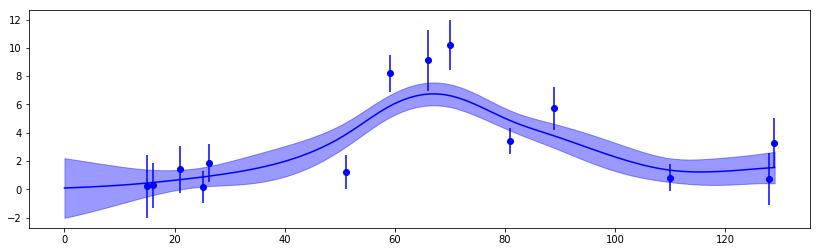

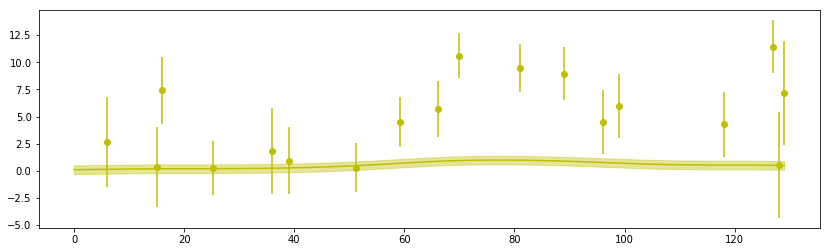

For random seed: 3


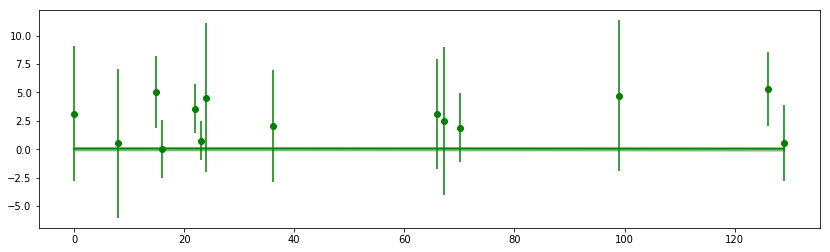

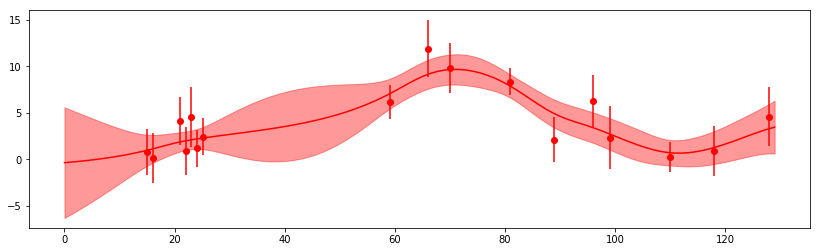

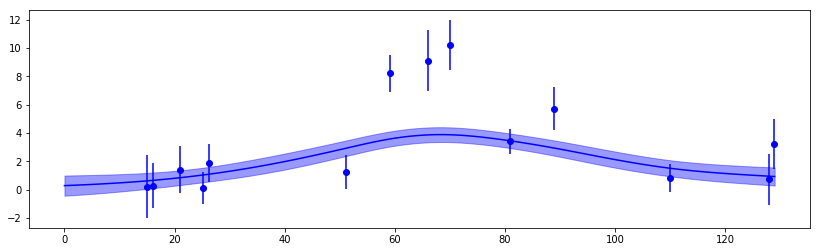

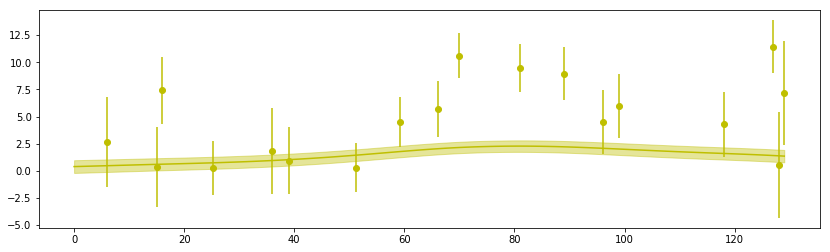

For random seed: 4


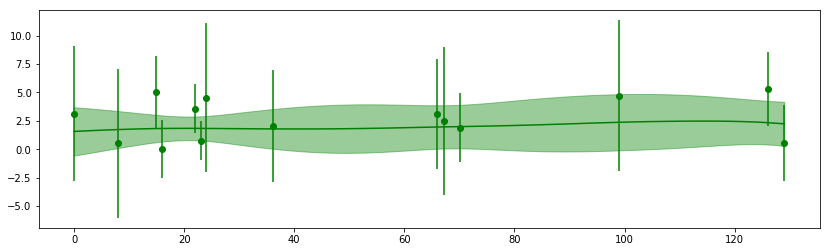

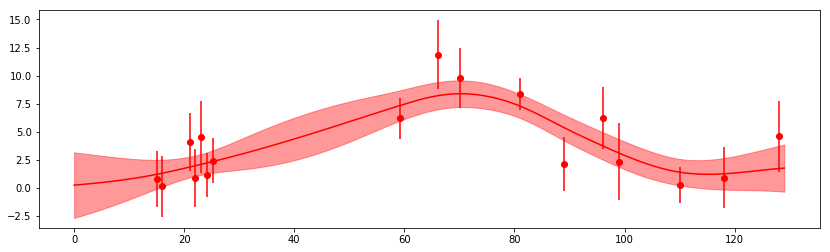

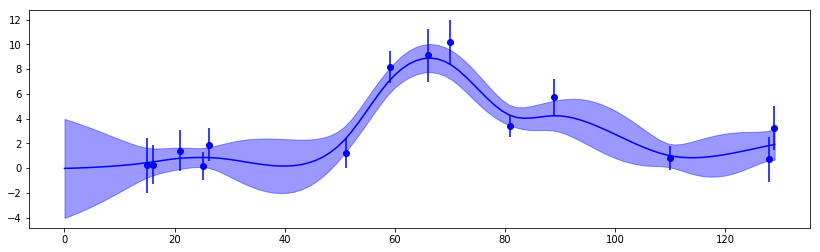

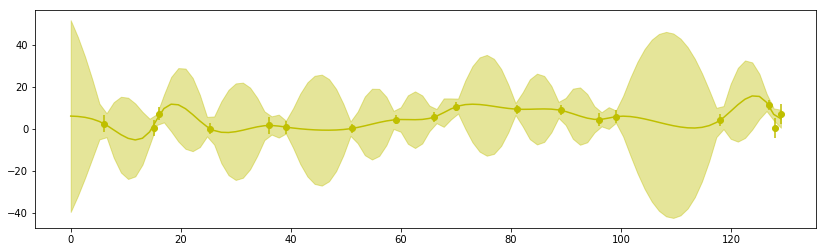

For random seed: 5


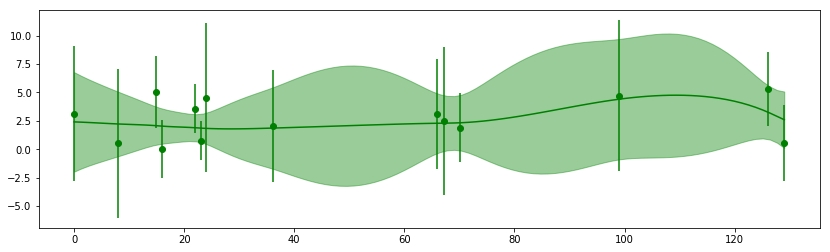

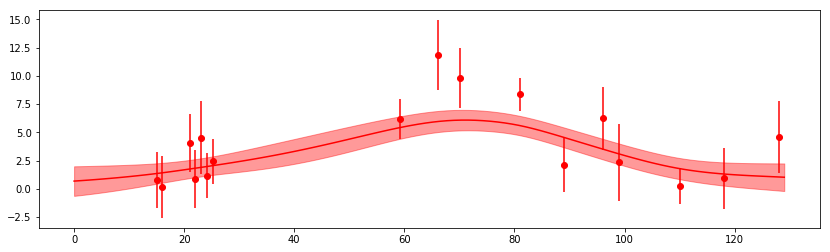

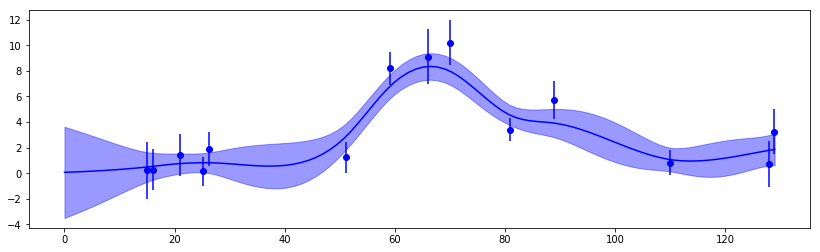

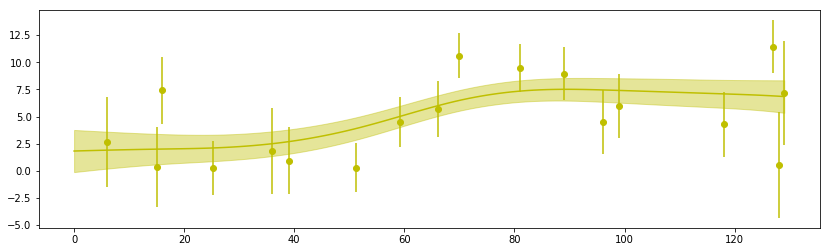

For random seed: 6


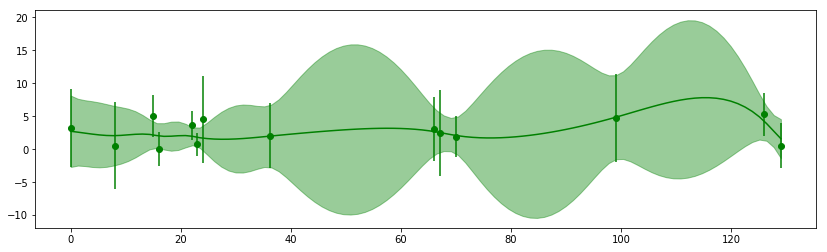

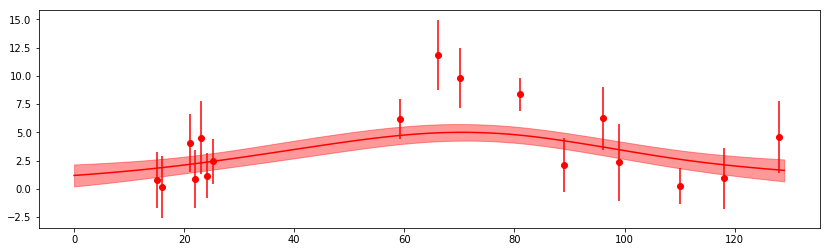

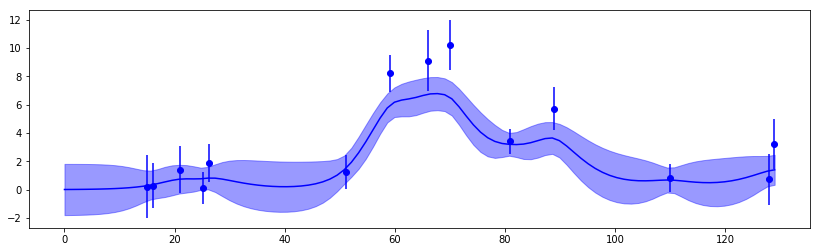

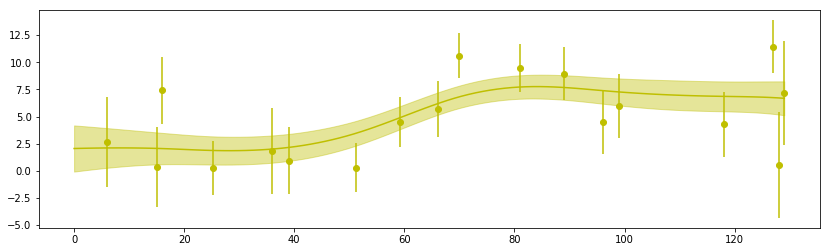

For random seed: 7


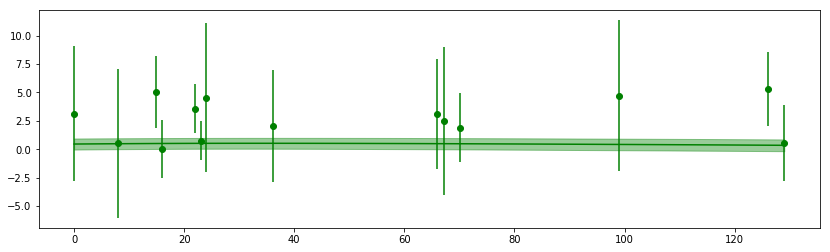

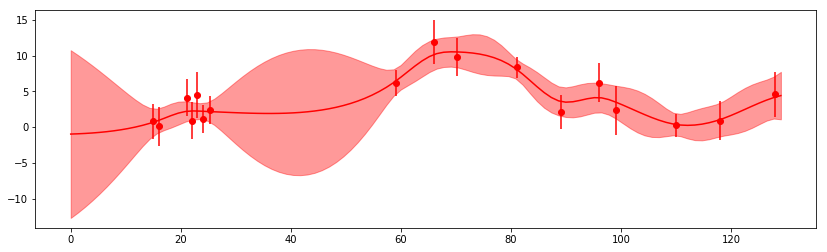

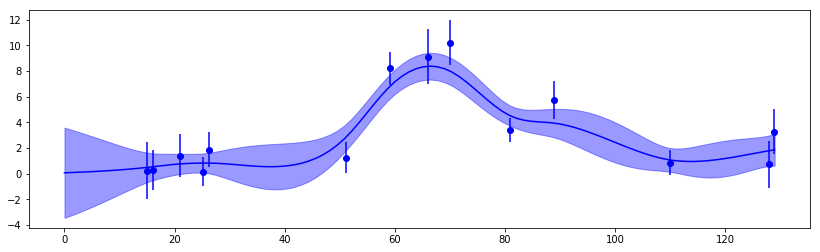

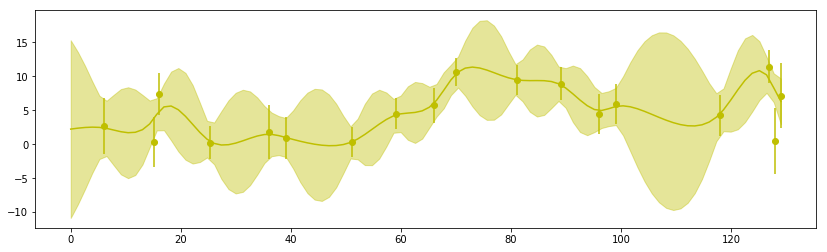

For random seed: 8


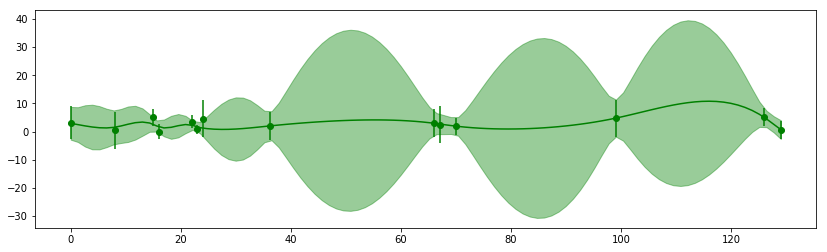

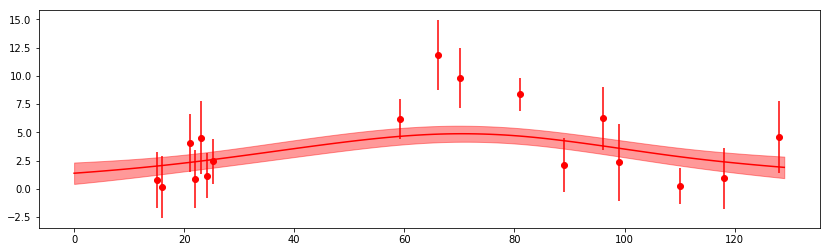

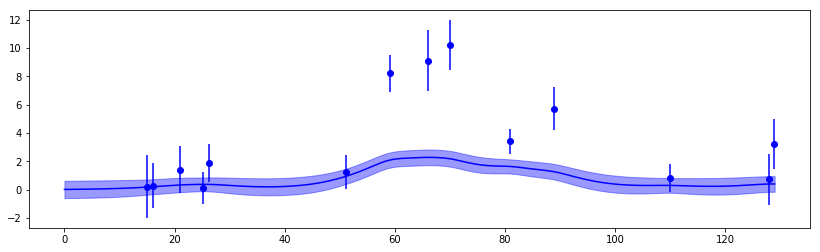

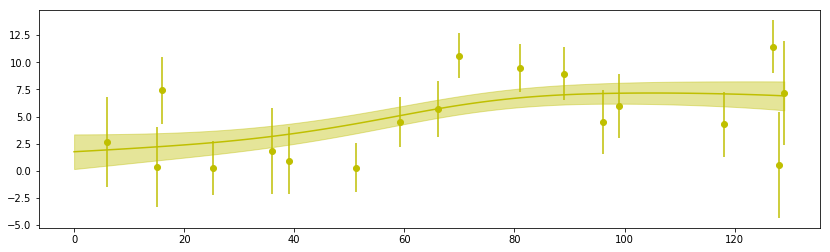

For random seed: 9


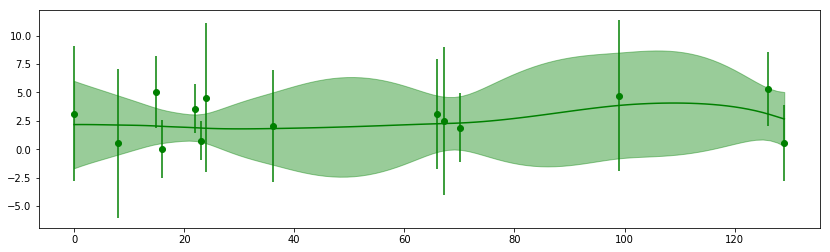

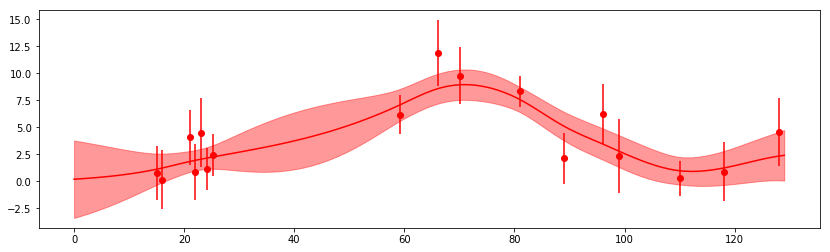

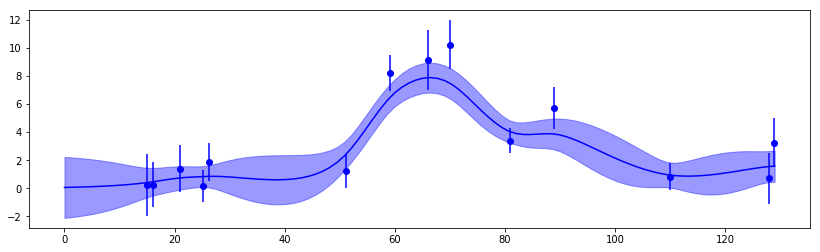

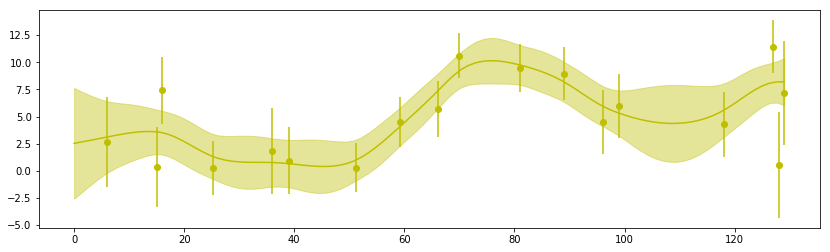

For random seed: 10


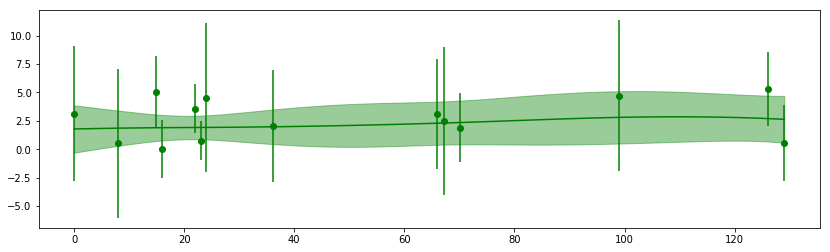

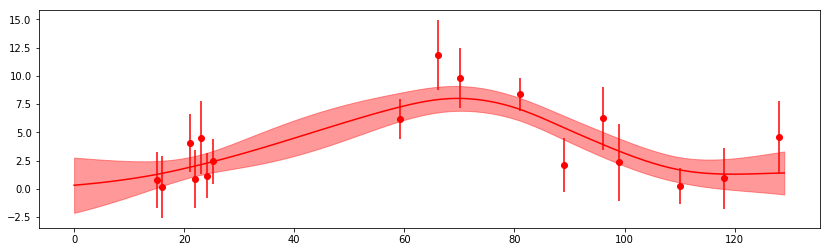

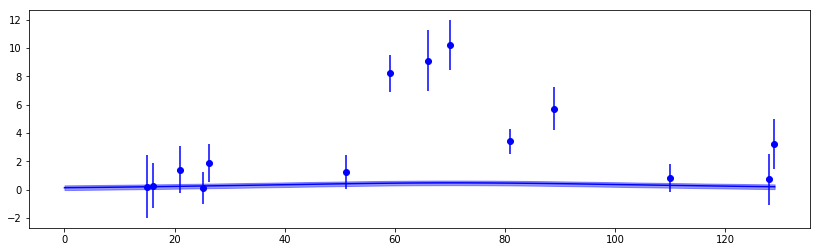

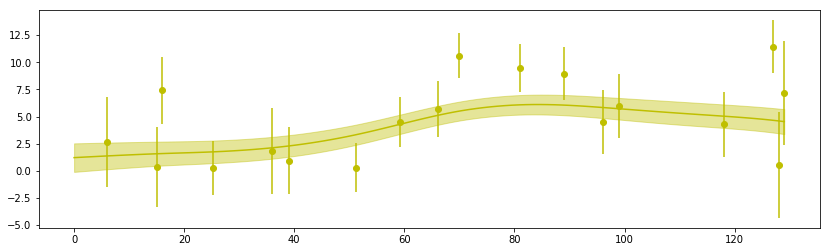

In [48]:
for i in range(11):
    np.random.seed(i)
    print ("For random seed:", i)
    with pm.Model() as model:
        eta = pm.HalfCauchy("N", beta=2, testval=2.0)
        lengthscale = pm.Gamma("L", alpha=4, beta=0.1)
        cov = 5*eta**2 * pm.gp.cov.Matern32(1, lengthscale)        
    
        gp = pm.gp.Marginal(cov_func=cov)
        
        for j in range(len(x)):
            nome = 'y_' + str(i) + str(j)
            y_ = gp.marginal_likelihood(nome, X=x[j], y=y[j], noise=yerr[j])
        
            #mp = pm.find_MAP(include_transformed=True)
        
            mu, var = gp.predict(t, diag=True)
            fit = pd.DataFrame({"t": t.flatten(),
                            "mu_total": mu,
                            "sd_total": np.sqrt(var)})
            plot(x[j],y[j],yerr[j],fit, c = j)

In [ ]:
#from IPython.core.interactiveshell import InteractiveShell
#InteractiveShell.ast_node_interactivity = "all"

#print(gp.predict.__doc__)
#print(pm.model.Point.__doc__)